# <font color='purple'>Preprocessing QC statistics </font> 
## Noam, July 2023


In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
MOMAPS_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps'
MOMAPS_DATA_HOME = '/home/labs/hornsteinlab/Collaboration/MOmaps'
LOGS_PATH = os.path.join(MOMAPS_HOME, 'outputs', 'preprocessing', 'spd','logs','no_downsample')
PLOT_PATH = os.path.join(MOMAPS_HOME, 'src', 'preprocessing', 'notebooks','figures','Neurons')
os.chdir(MOMAPS_HOME)
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", font_scale=1.5)
sns.color_palette("husl", 8)
plt.rcParams["image.cmap"] = "Set1"
from tqdm.notebook import tqdm
from src.common.lib.preprocessing_utils import rescale_intensity
from src.common.lib.images_qc import *
#sys.path.insert(1, "/home/labs/hornsteinlab/Collaboration/MOmaps_Sagy/MOmaps/src/common/lib")
import contextlib
import io
import matplotlib
import warnings
warnings.filterwarnings('ignore', category=pd.core.common.SettingWithCopyWarning)
from src.common.lib.qc_config_tmp import *
from src.common.lib.image_sampling_utils import *

In [3]:
df = log_files_qc(LOGS_PATH)


Total of 6 files were read.
Before dup handeling  (80088, 20)
After duplication removal #1: (79925, 21)
After duplication removal #2: (79746, 21)


In [4]:
# choose batches
#batches = [f'batch{i}' for i in range (3,7)] + ['batch7_16bit','batch8_16bit','batch9_16bit']
batches=[f'batch{i}_16bit_no_downsample' for i in range(6,10)]
batches

['batch6_16bit_no_downsample',
 'batch7_16bit_no_downsample',
 'batch8_16bit_no_downsample',
 'batch9_16bit_no_downsample']

### Raw Files

batch6
Folder structure is valid.
All files exists.
Total Sites:  64800


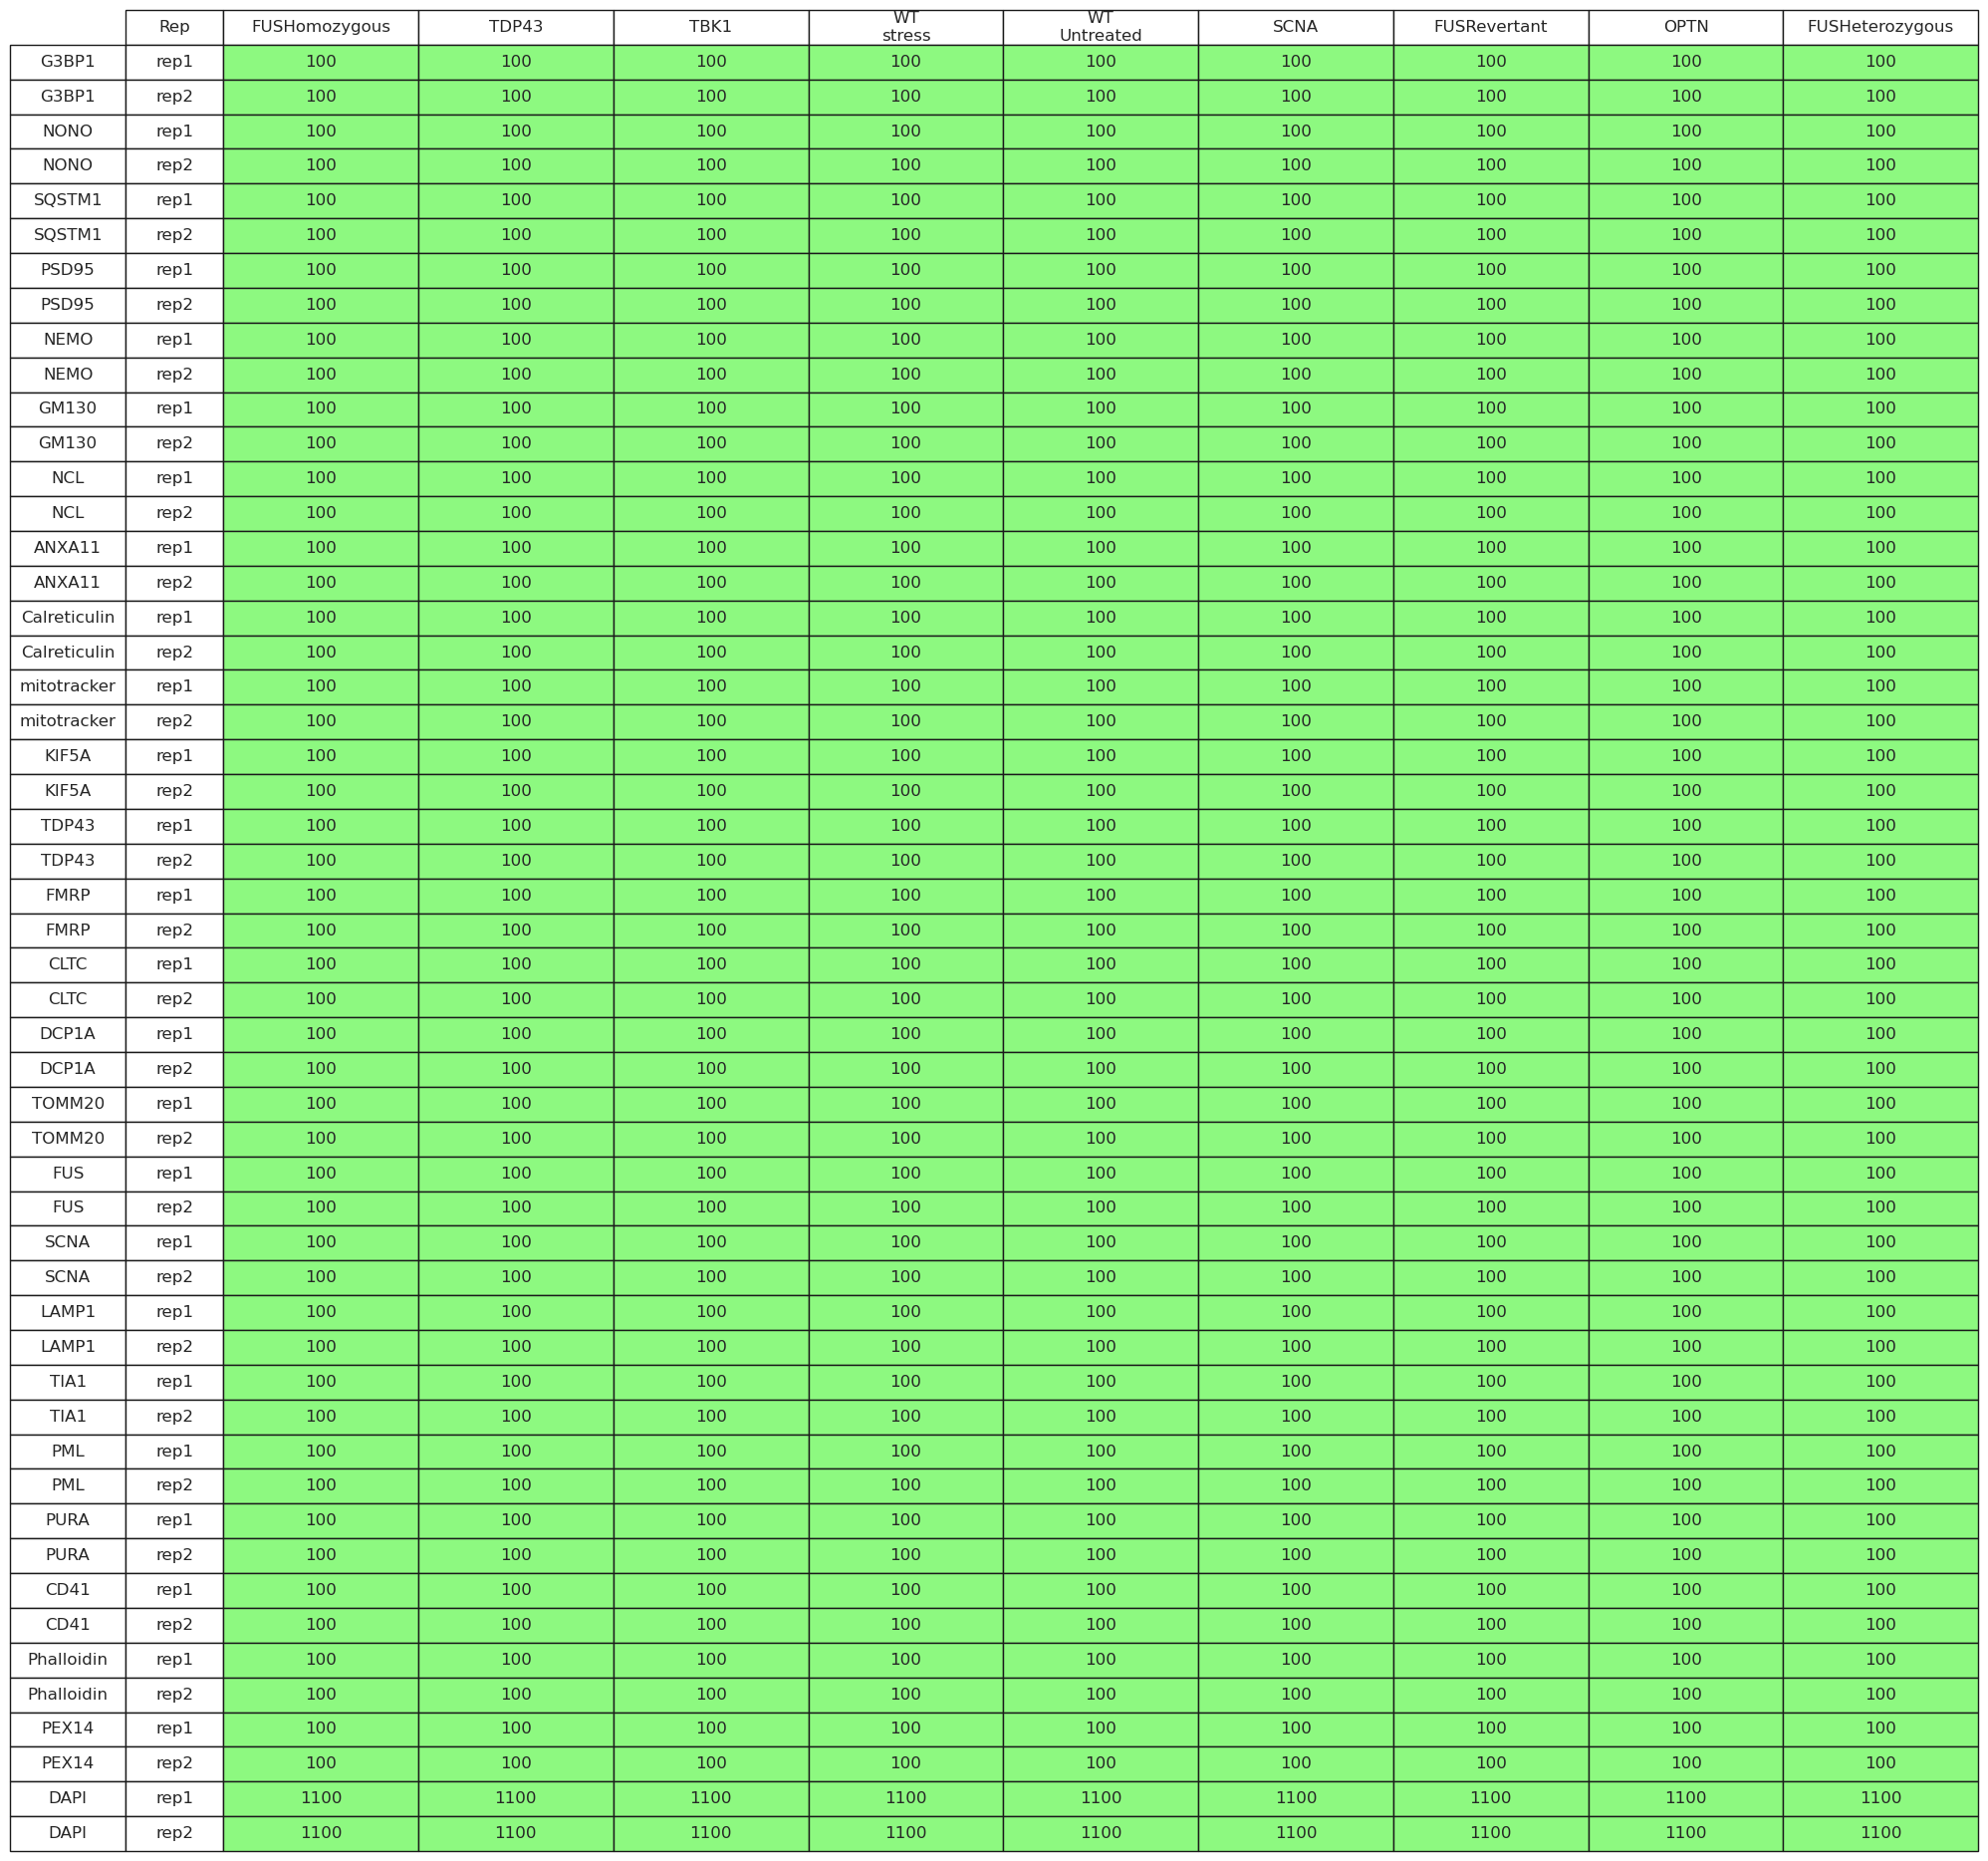

batch7
Folder structure is valid.
All files exists.
Total Sites:  64800


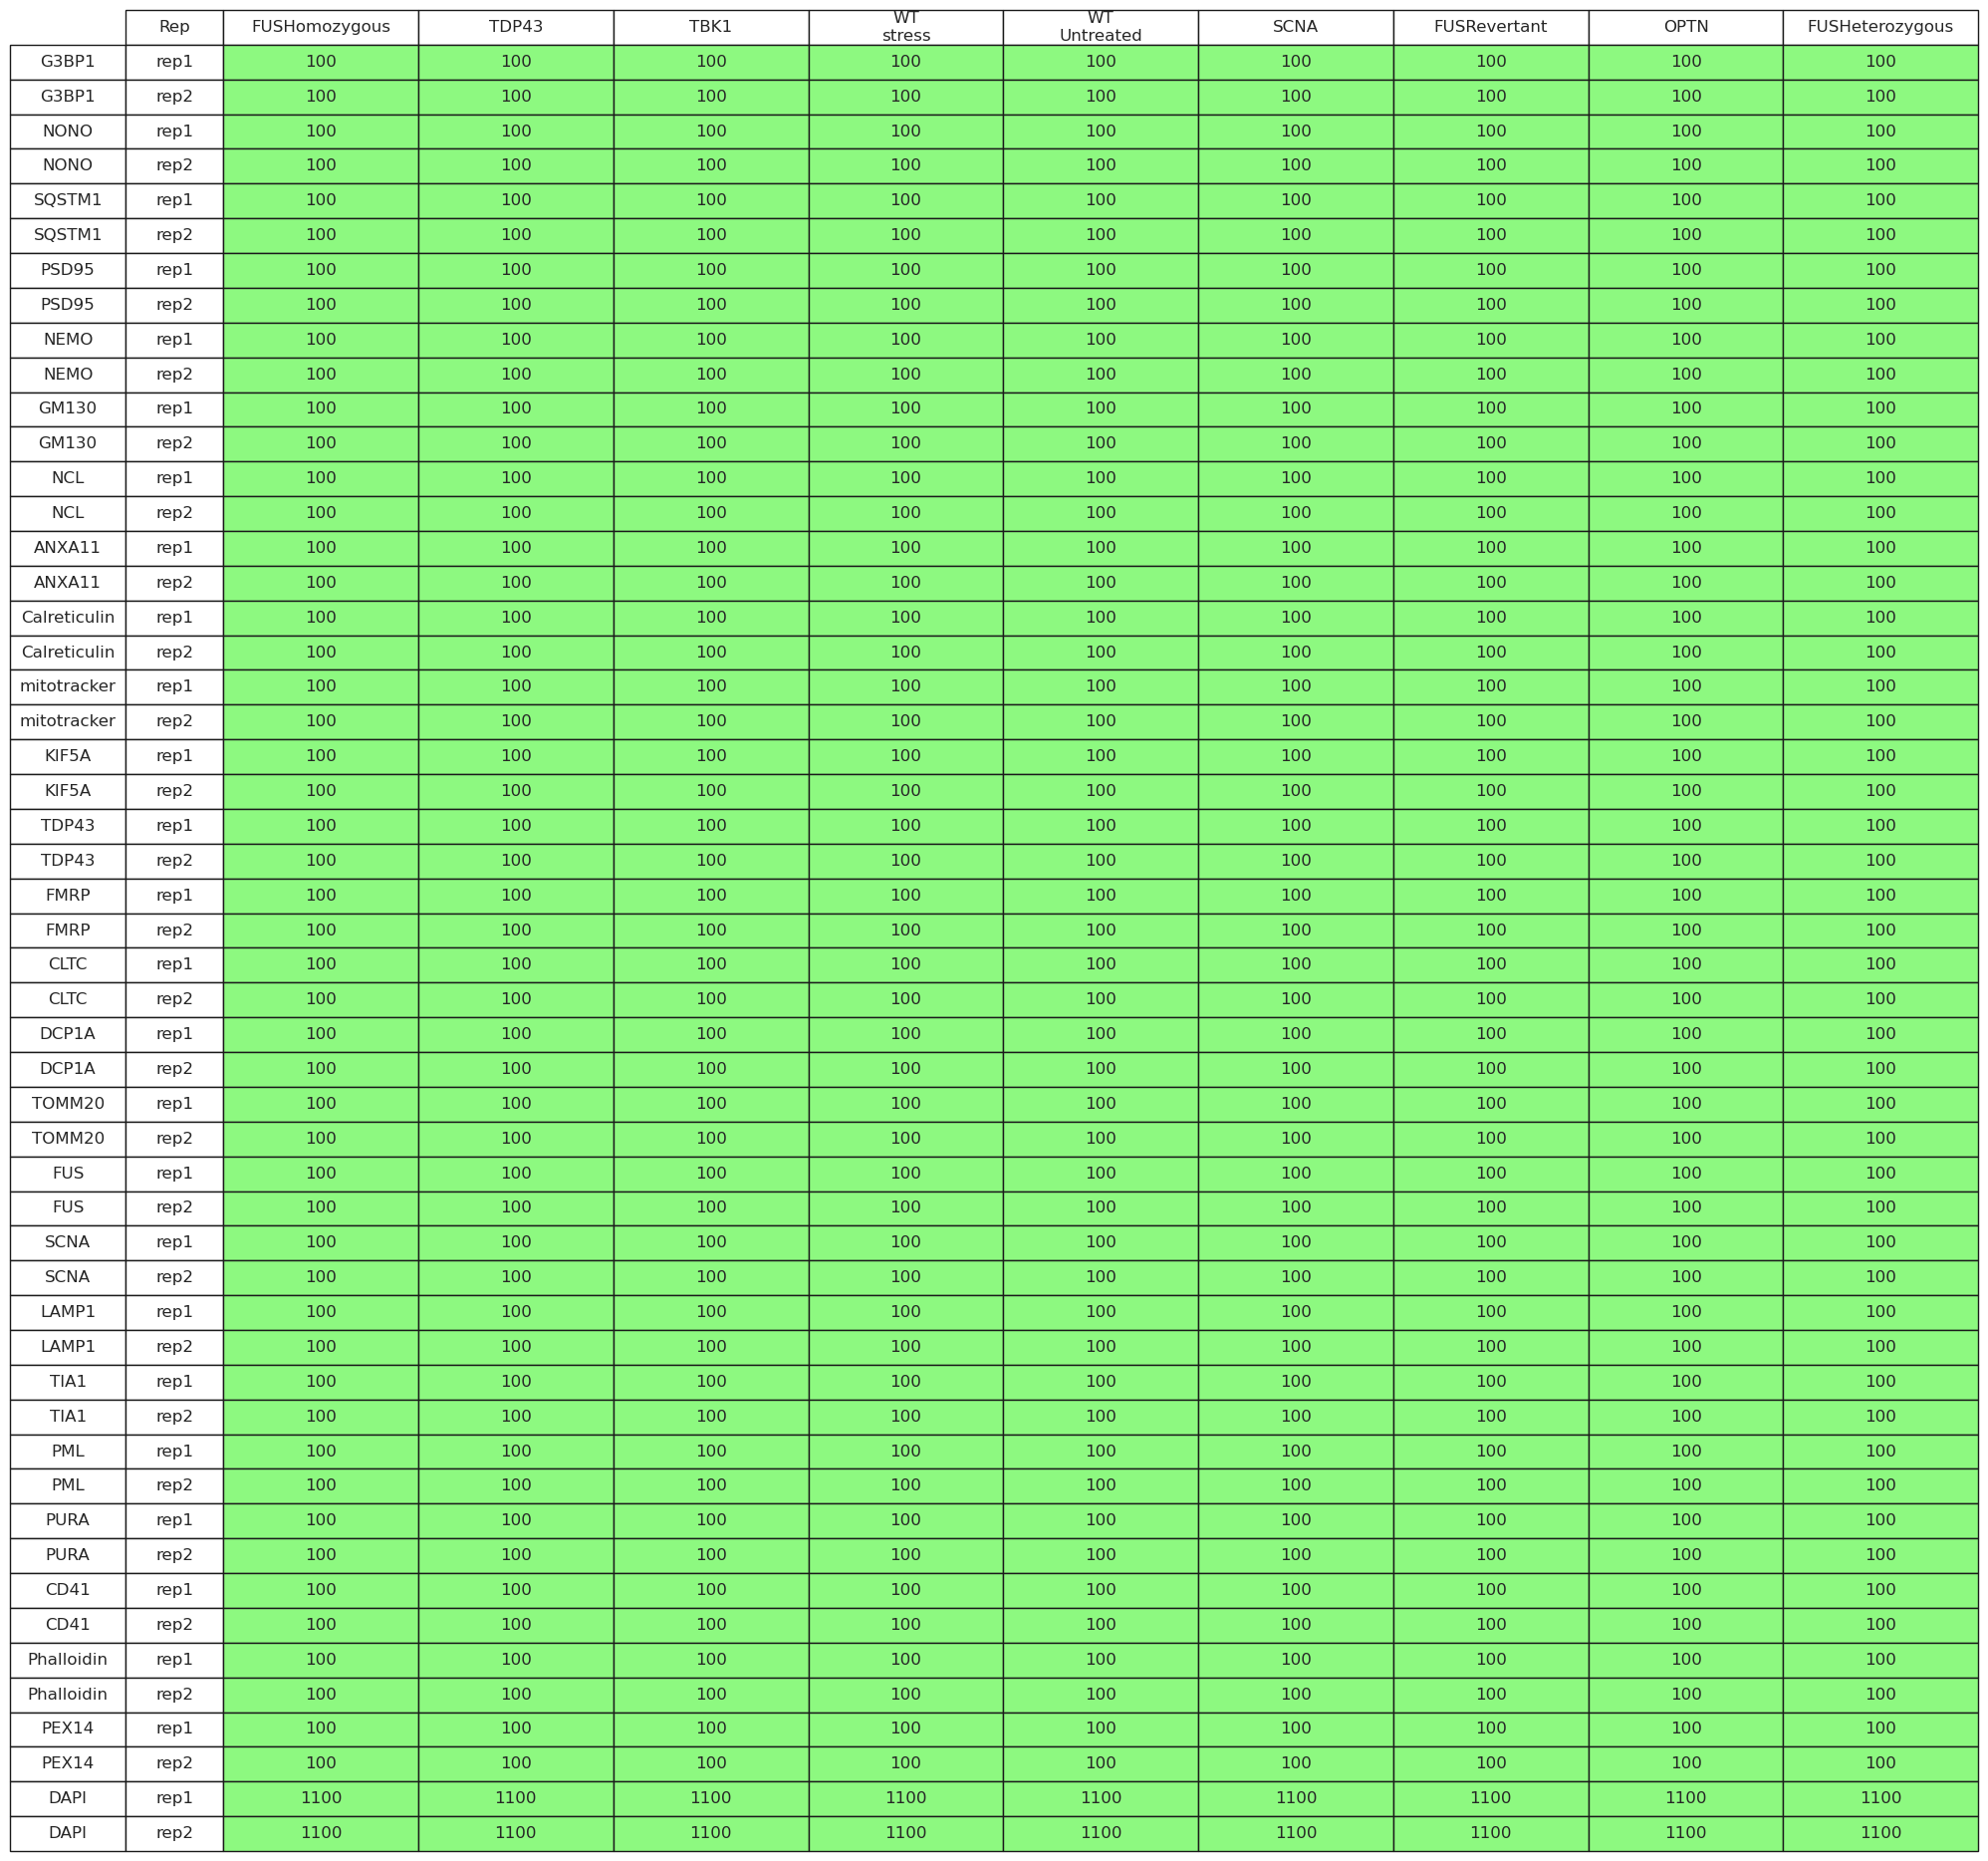

batch8
Folder structure is valid.
All files exists.
Total Sites:  64800


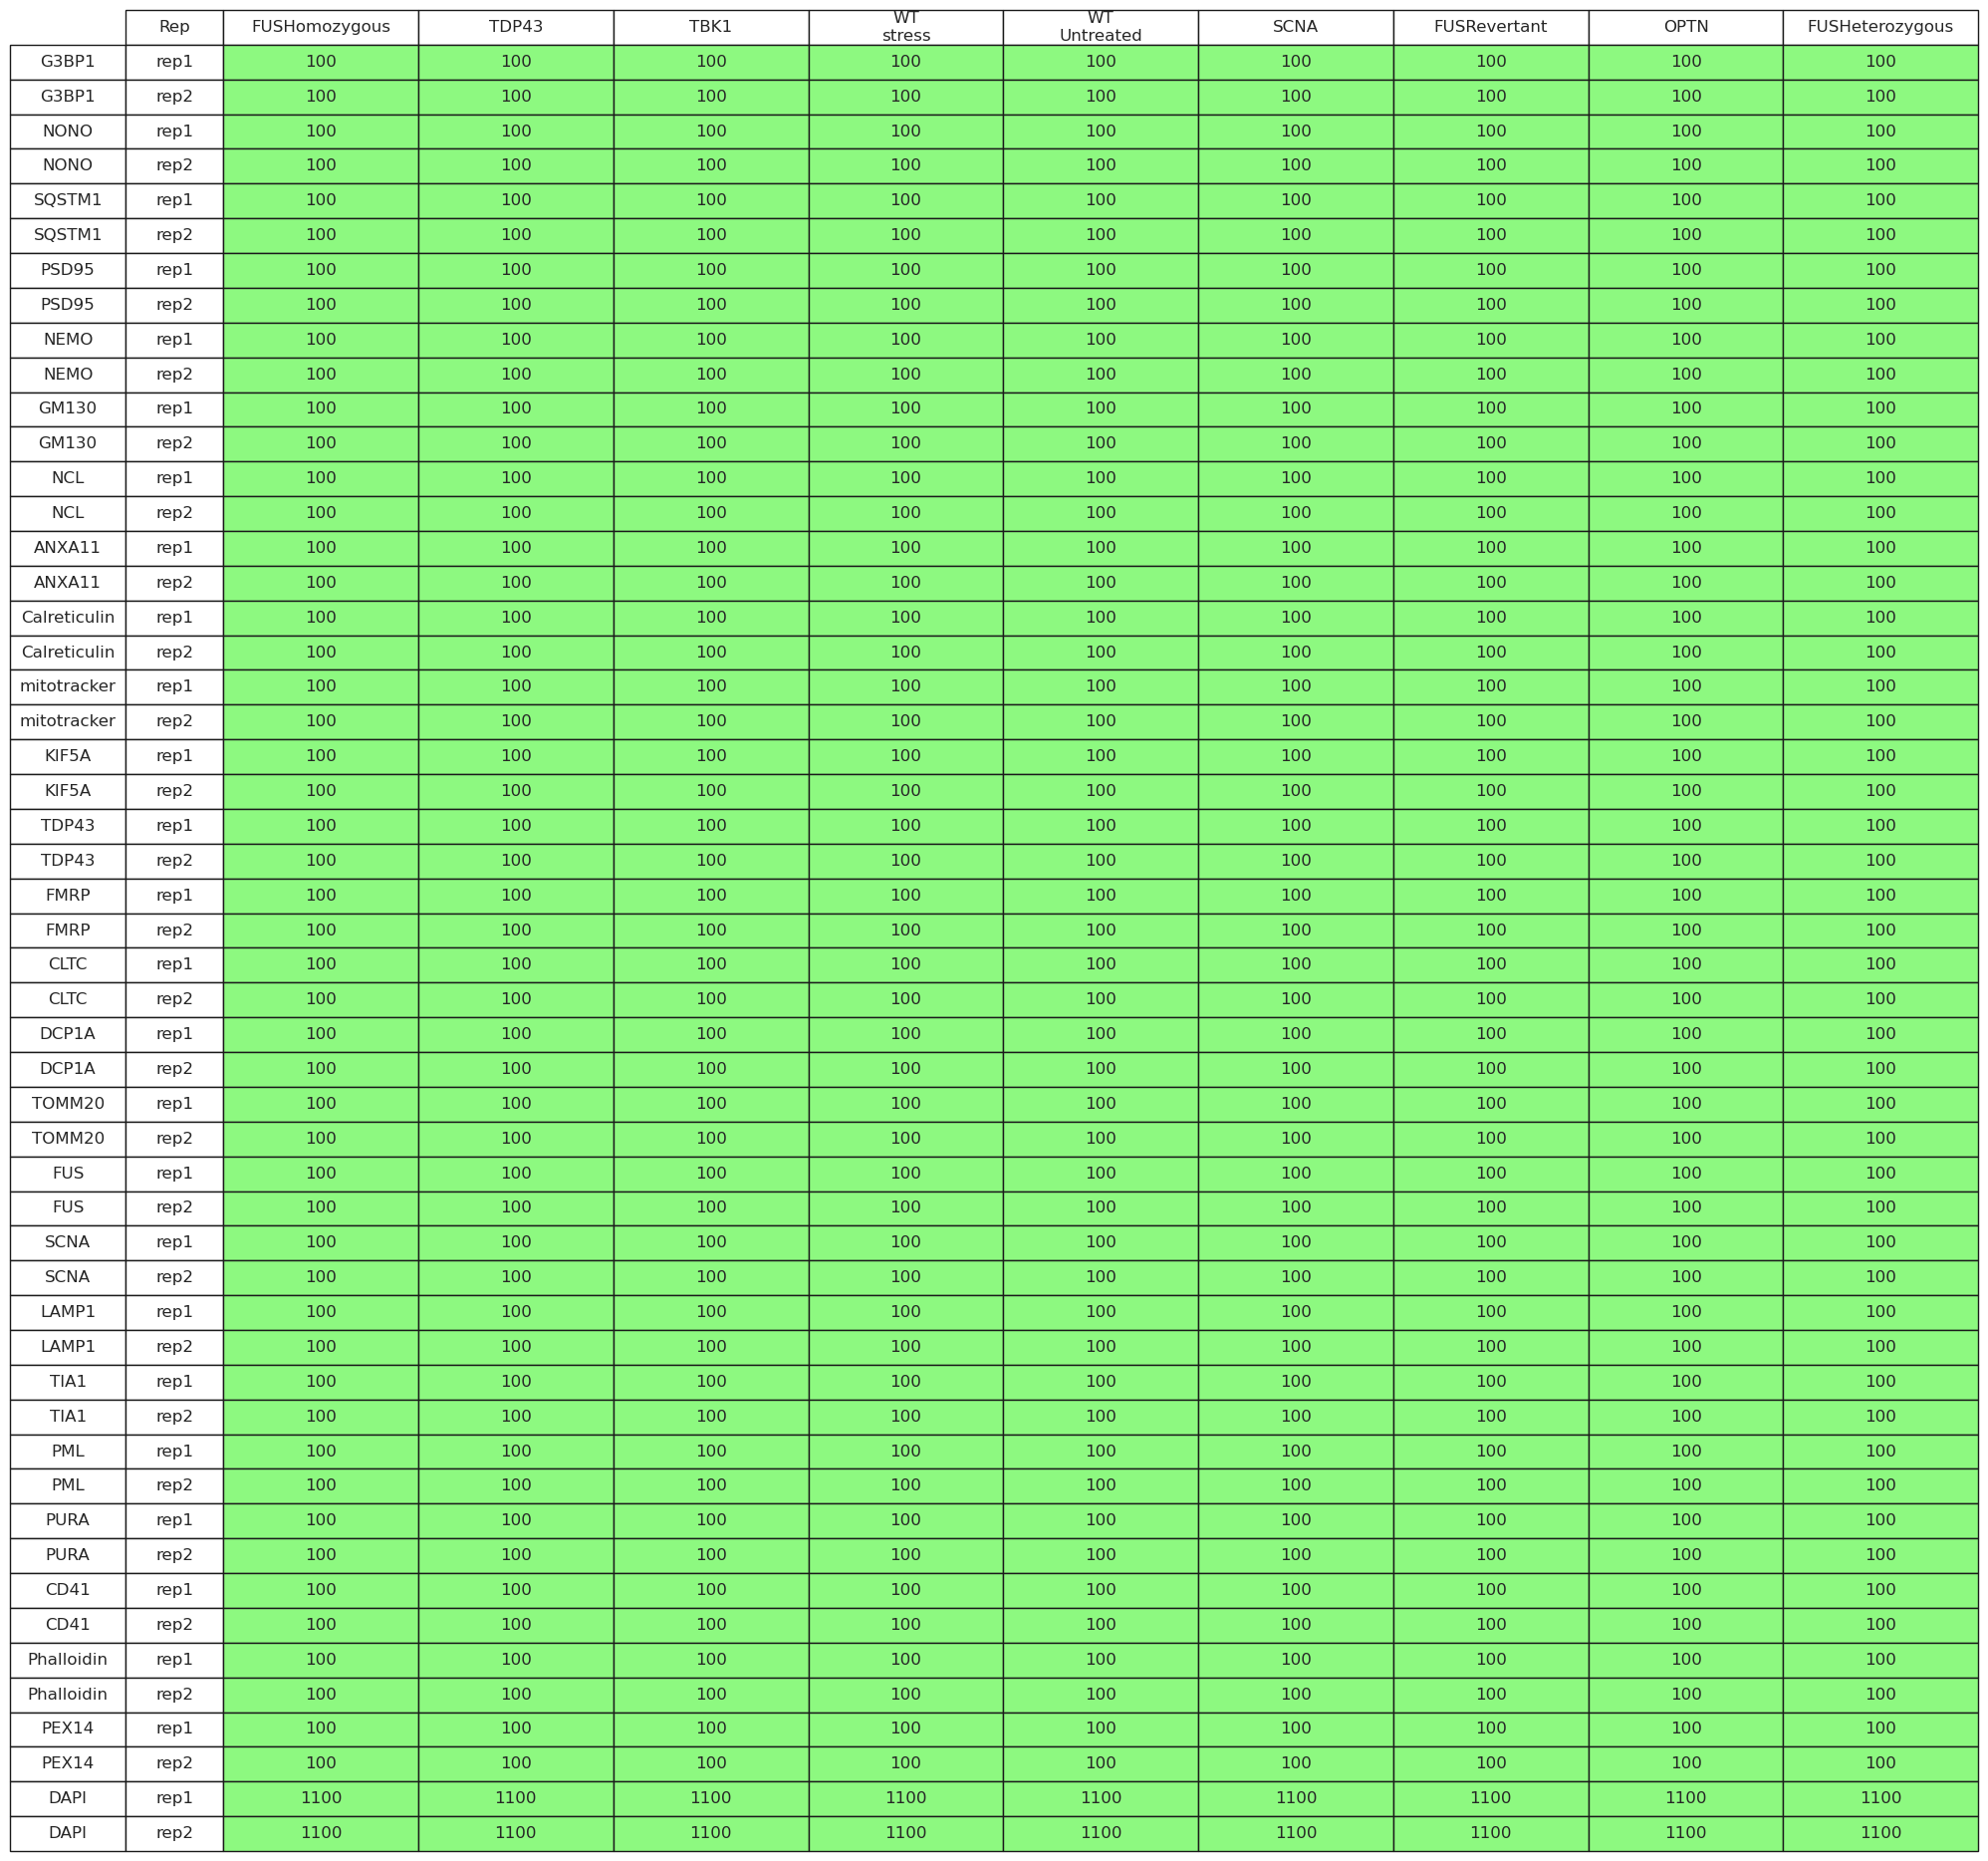

batch9
Folder structure is valid.
All files exists.
Total Sites:  64800


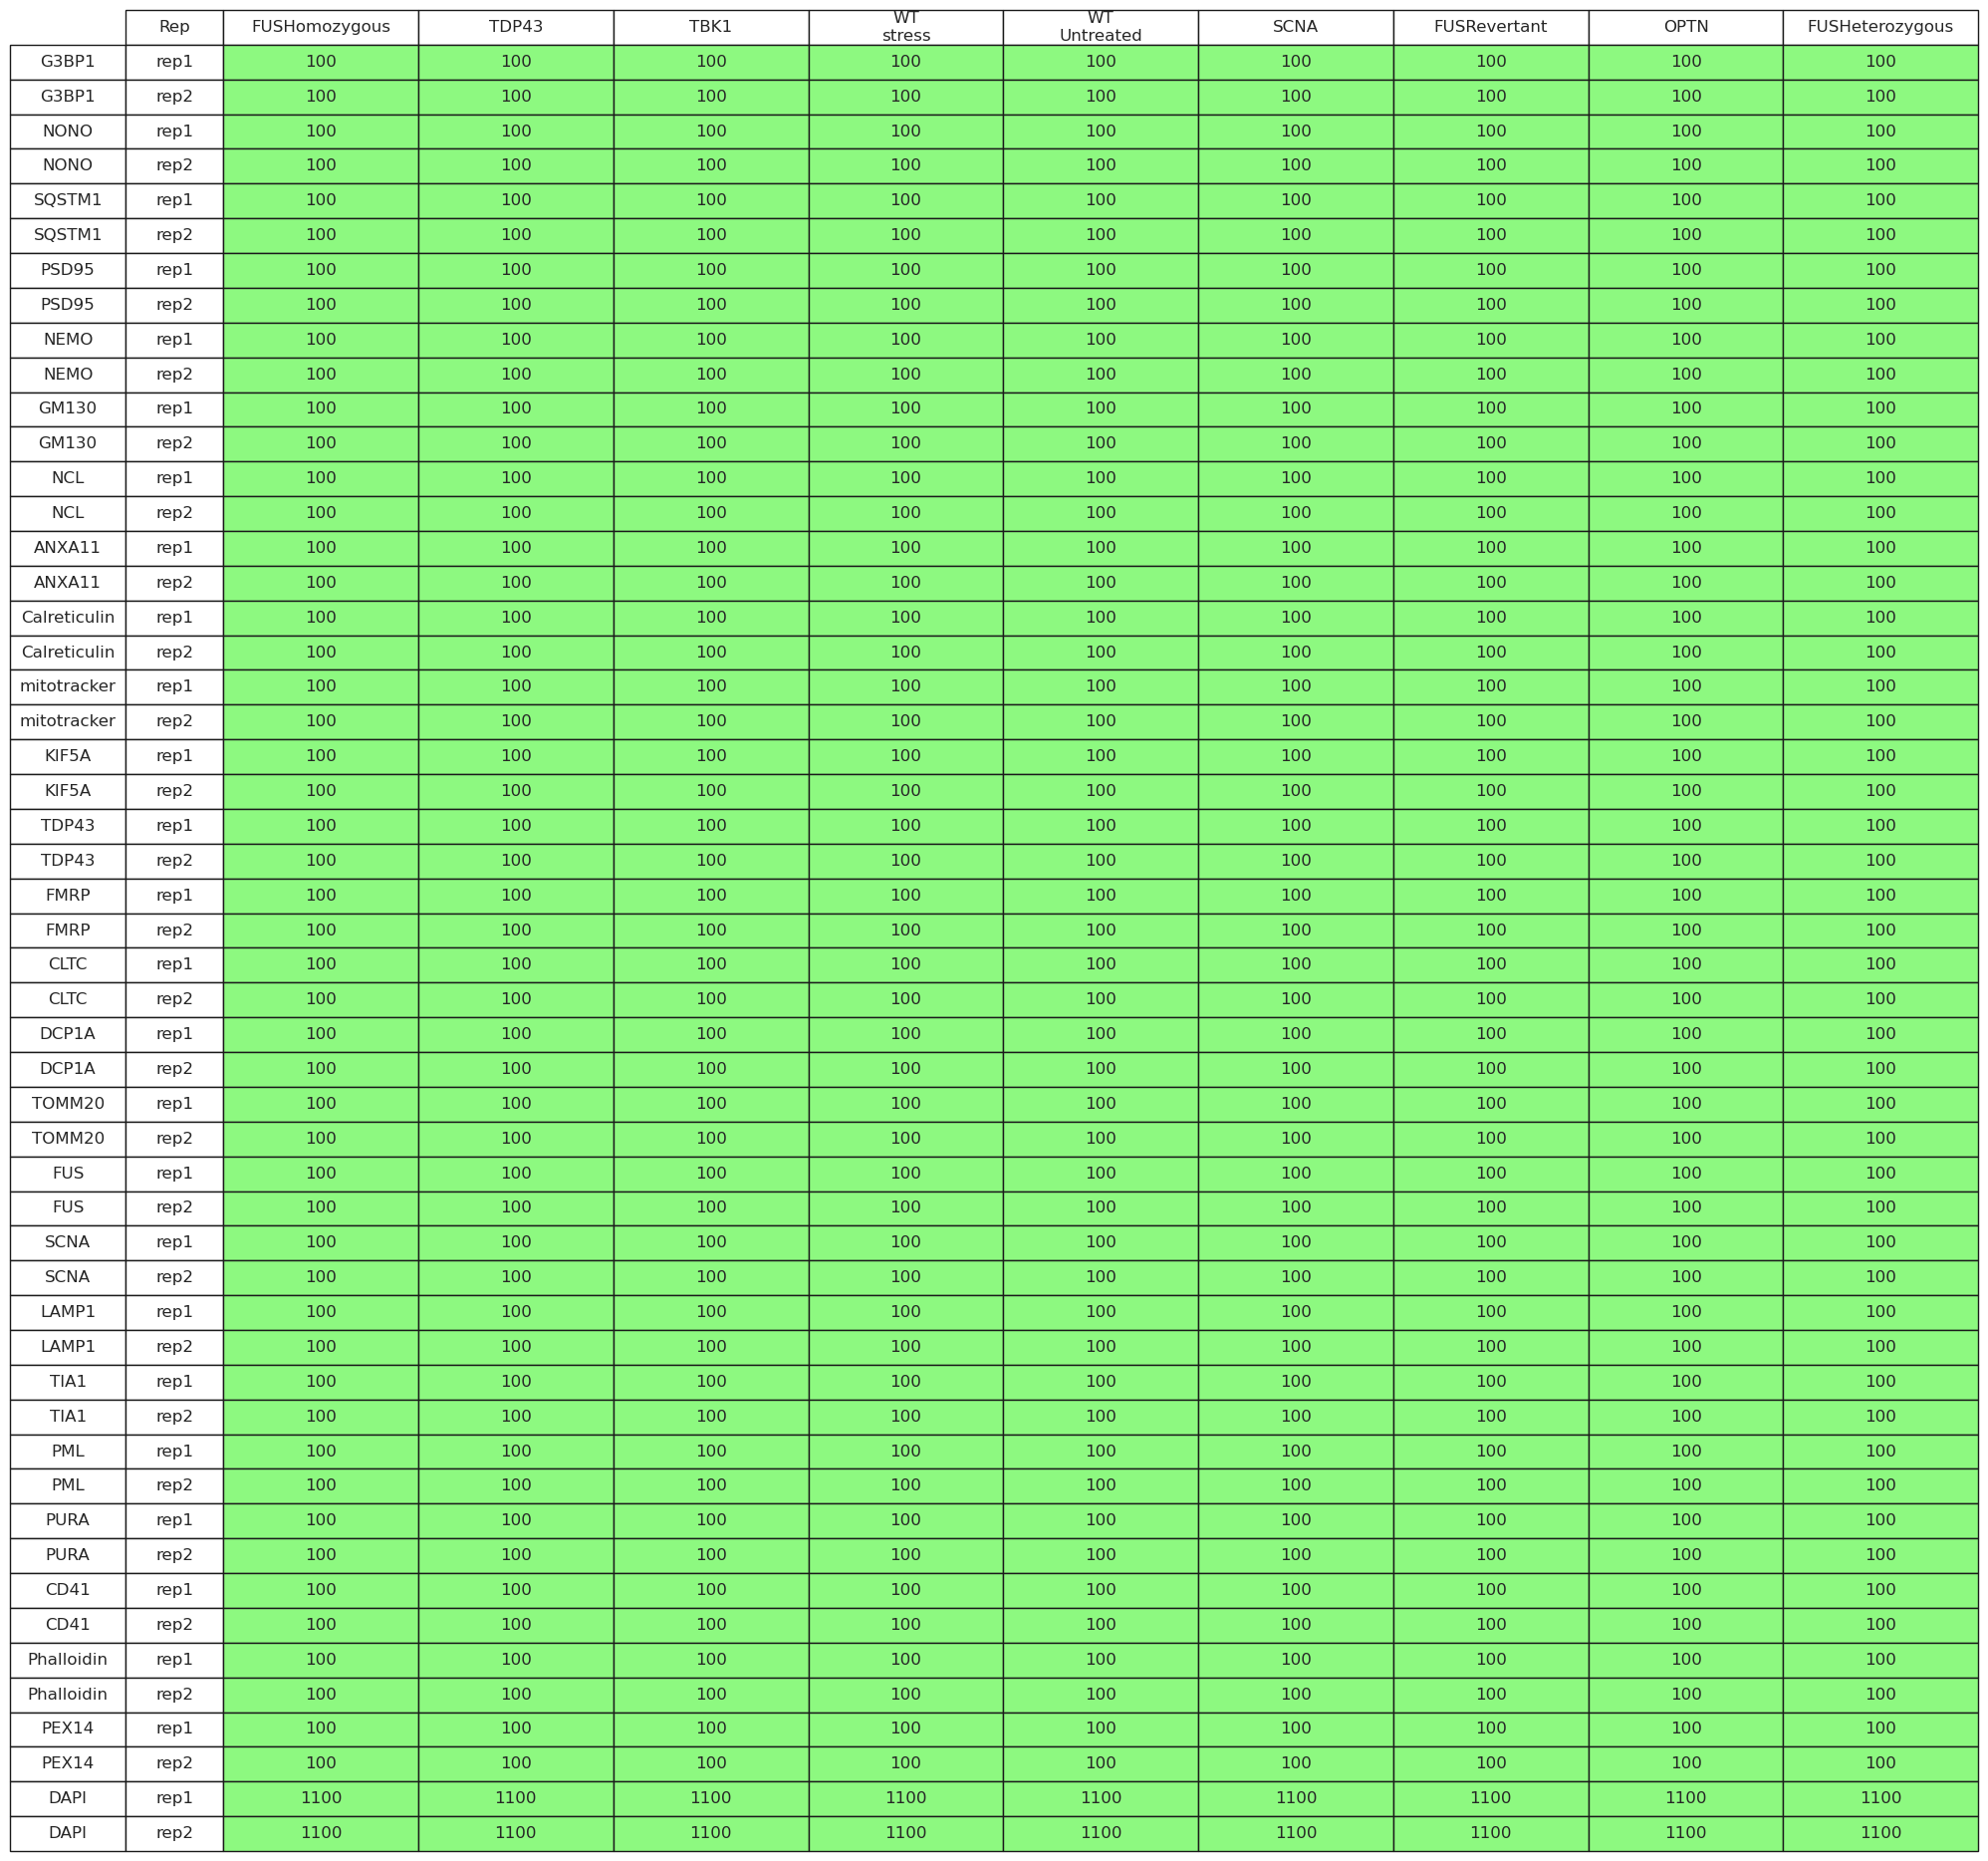

In [5]:

root_directory_raw = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'raw', 'SpinningDisk')

batches_raw = [batch.replace("_16bit_no_downsample","") for batch in batches]
raws = run_validate_folder_structure(root_directory_raw, False, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches_raw)

### Processed

batch6_16bit_no_downsample
Folder structure is valid.
All files exists.
Total Sites:  64056


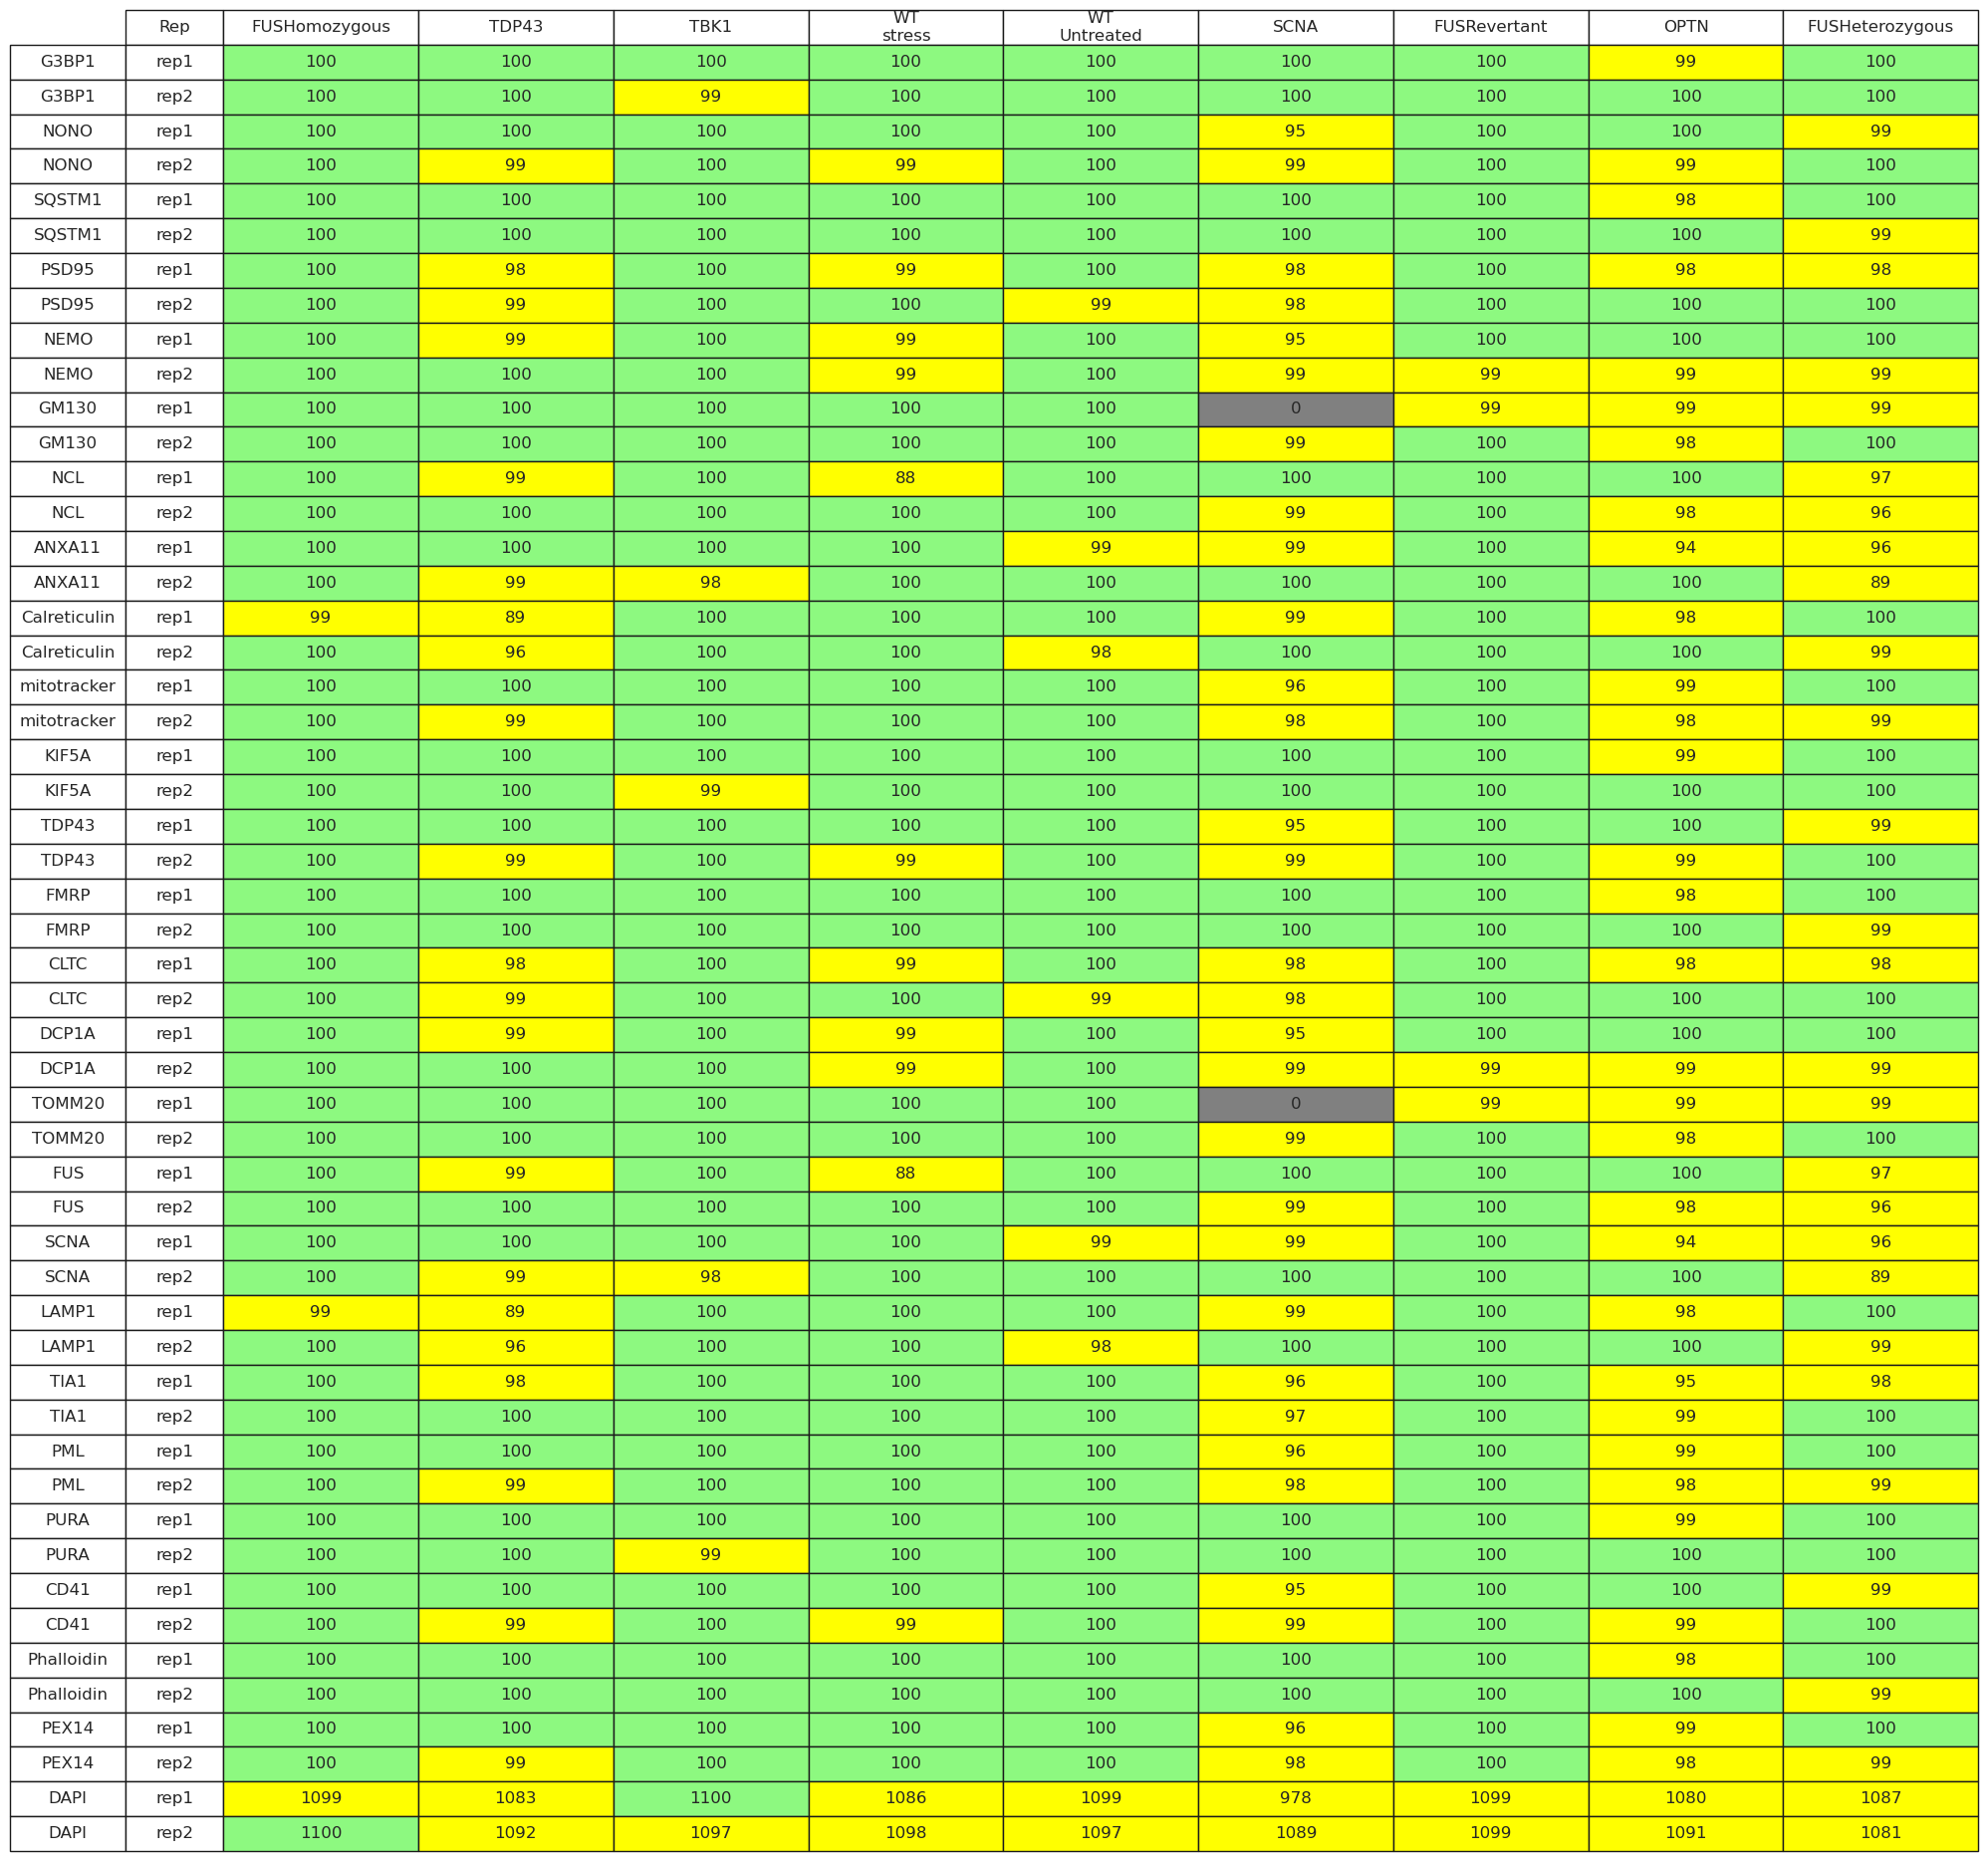

batch7_16bit_no_downsample
Folder structure is valid.
All files exists.
Total Sites:  63906


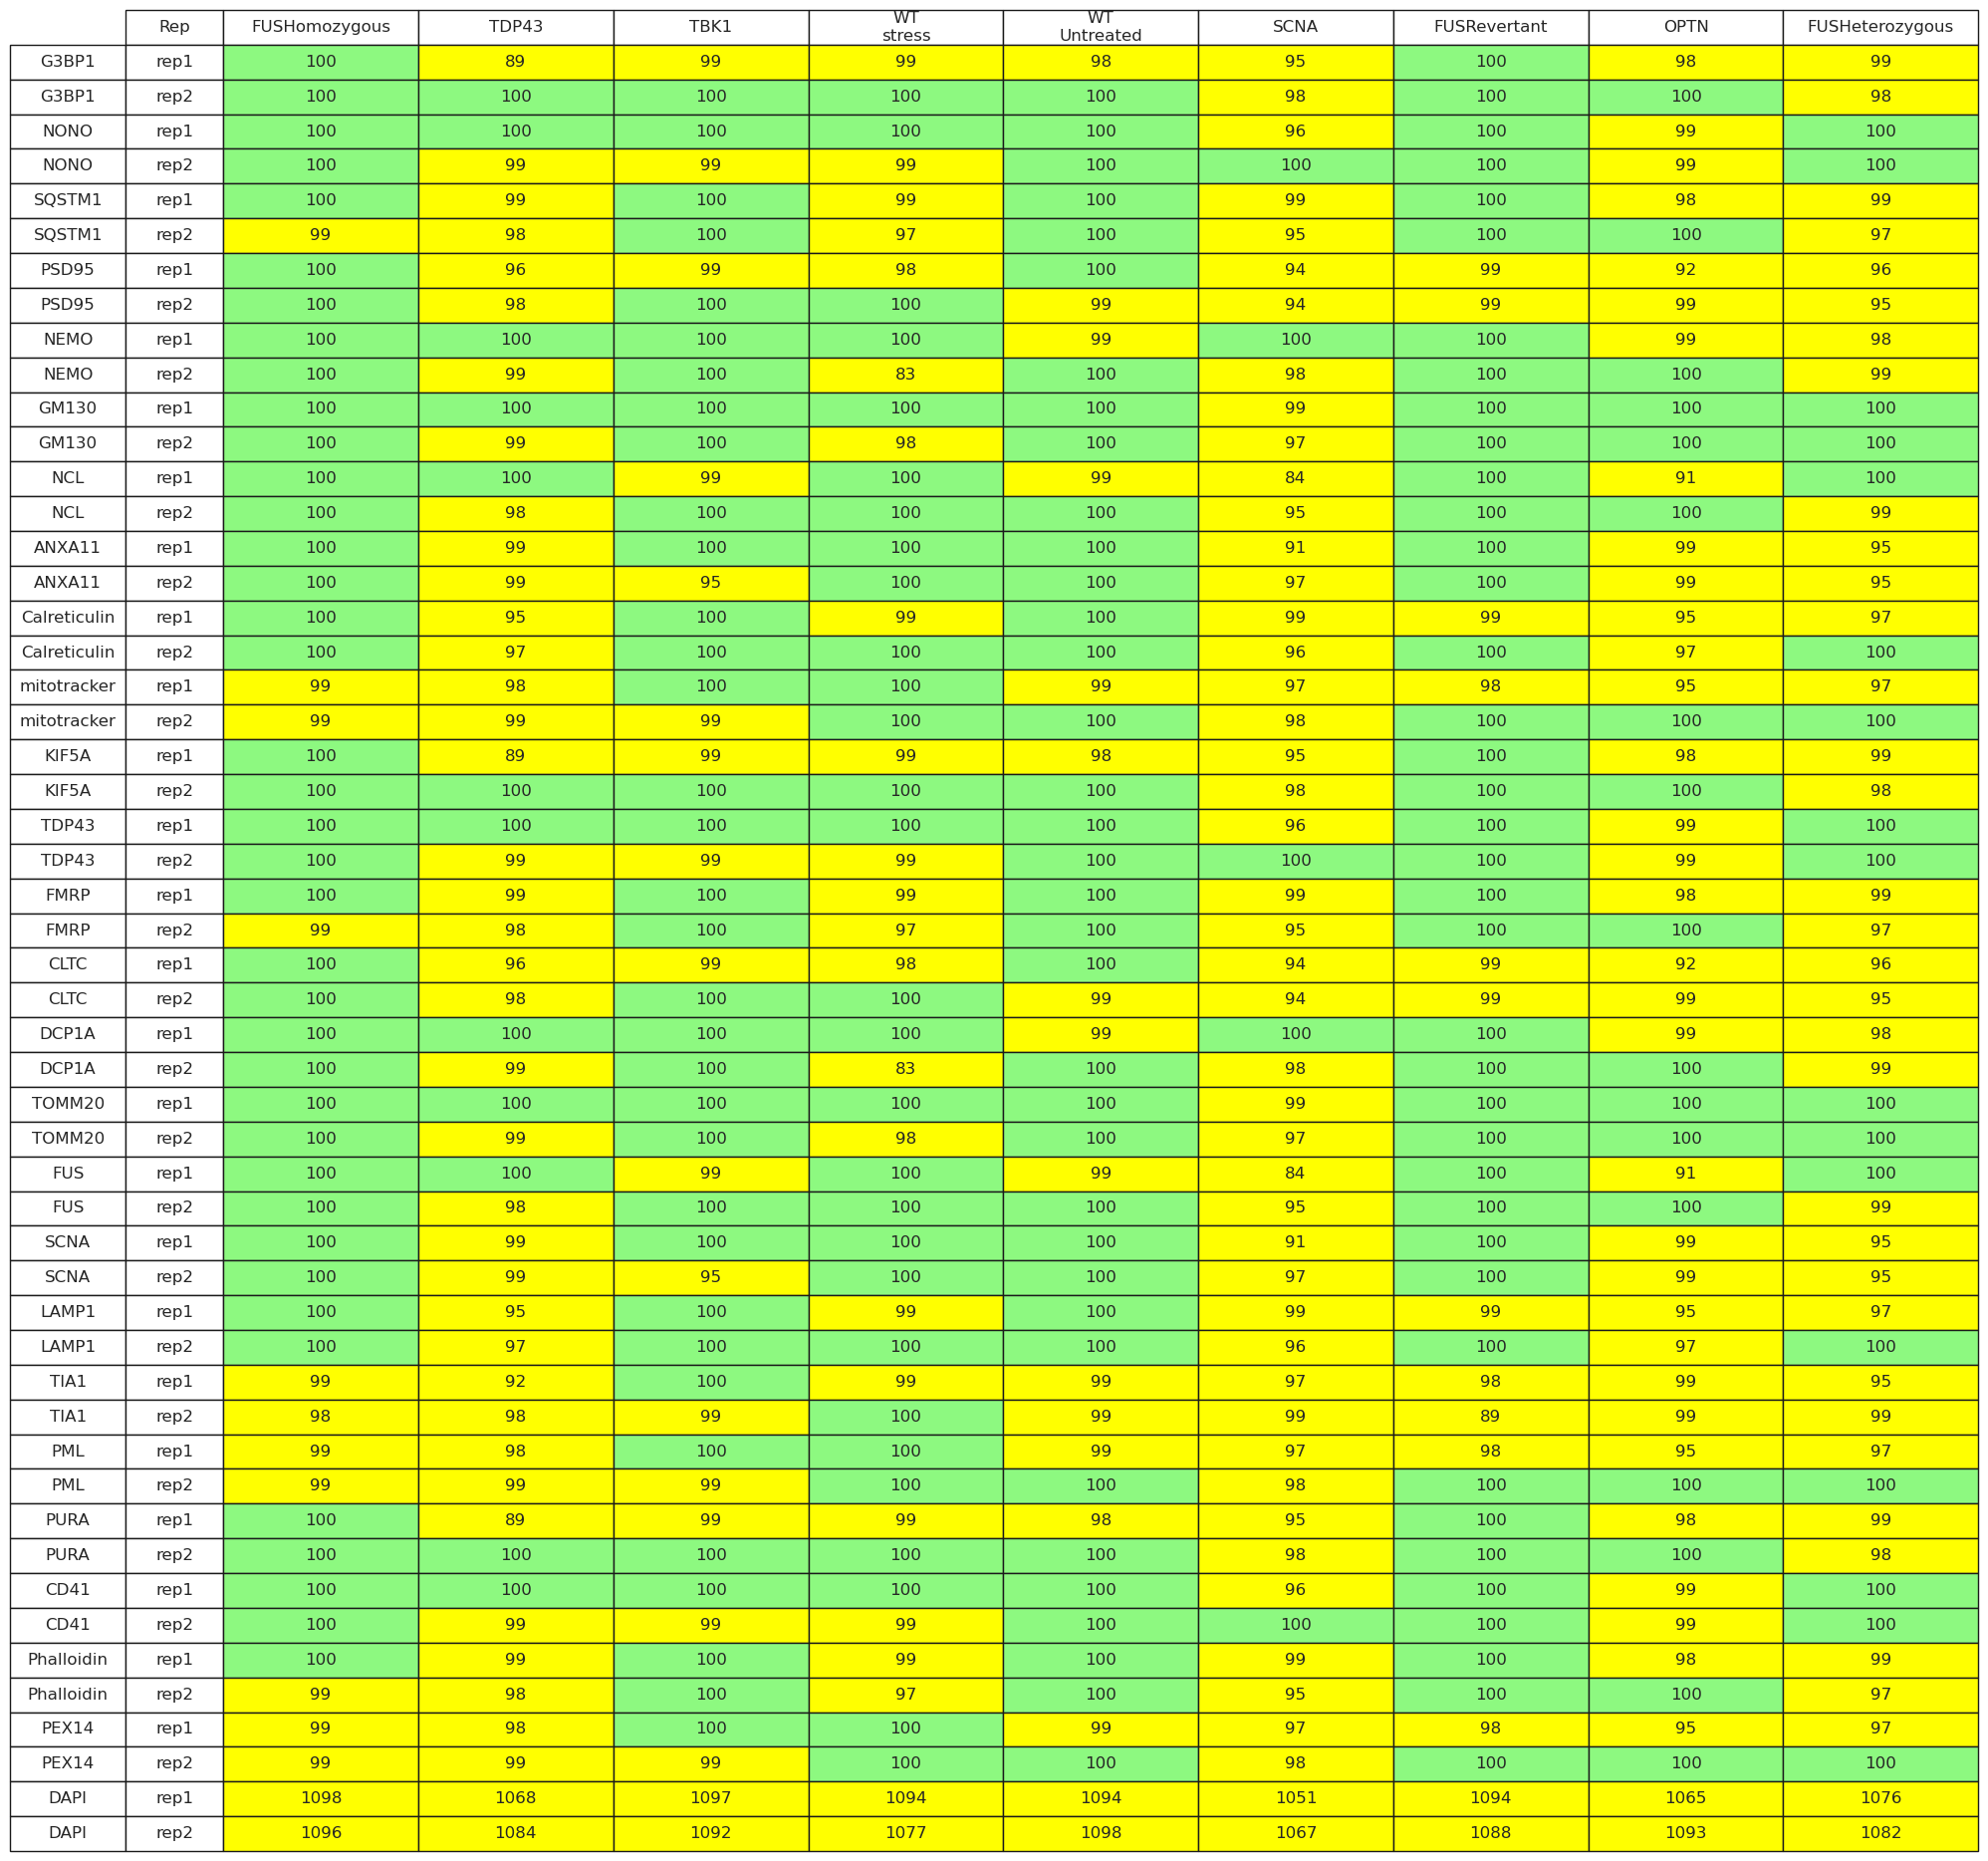

batch8_16bit_no_downsample
Folder structure is valid.
All files exists.
Total Sites:  63923


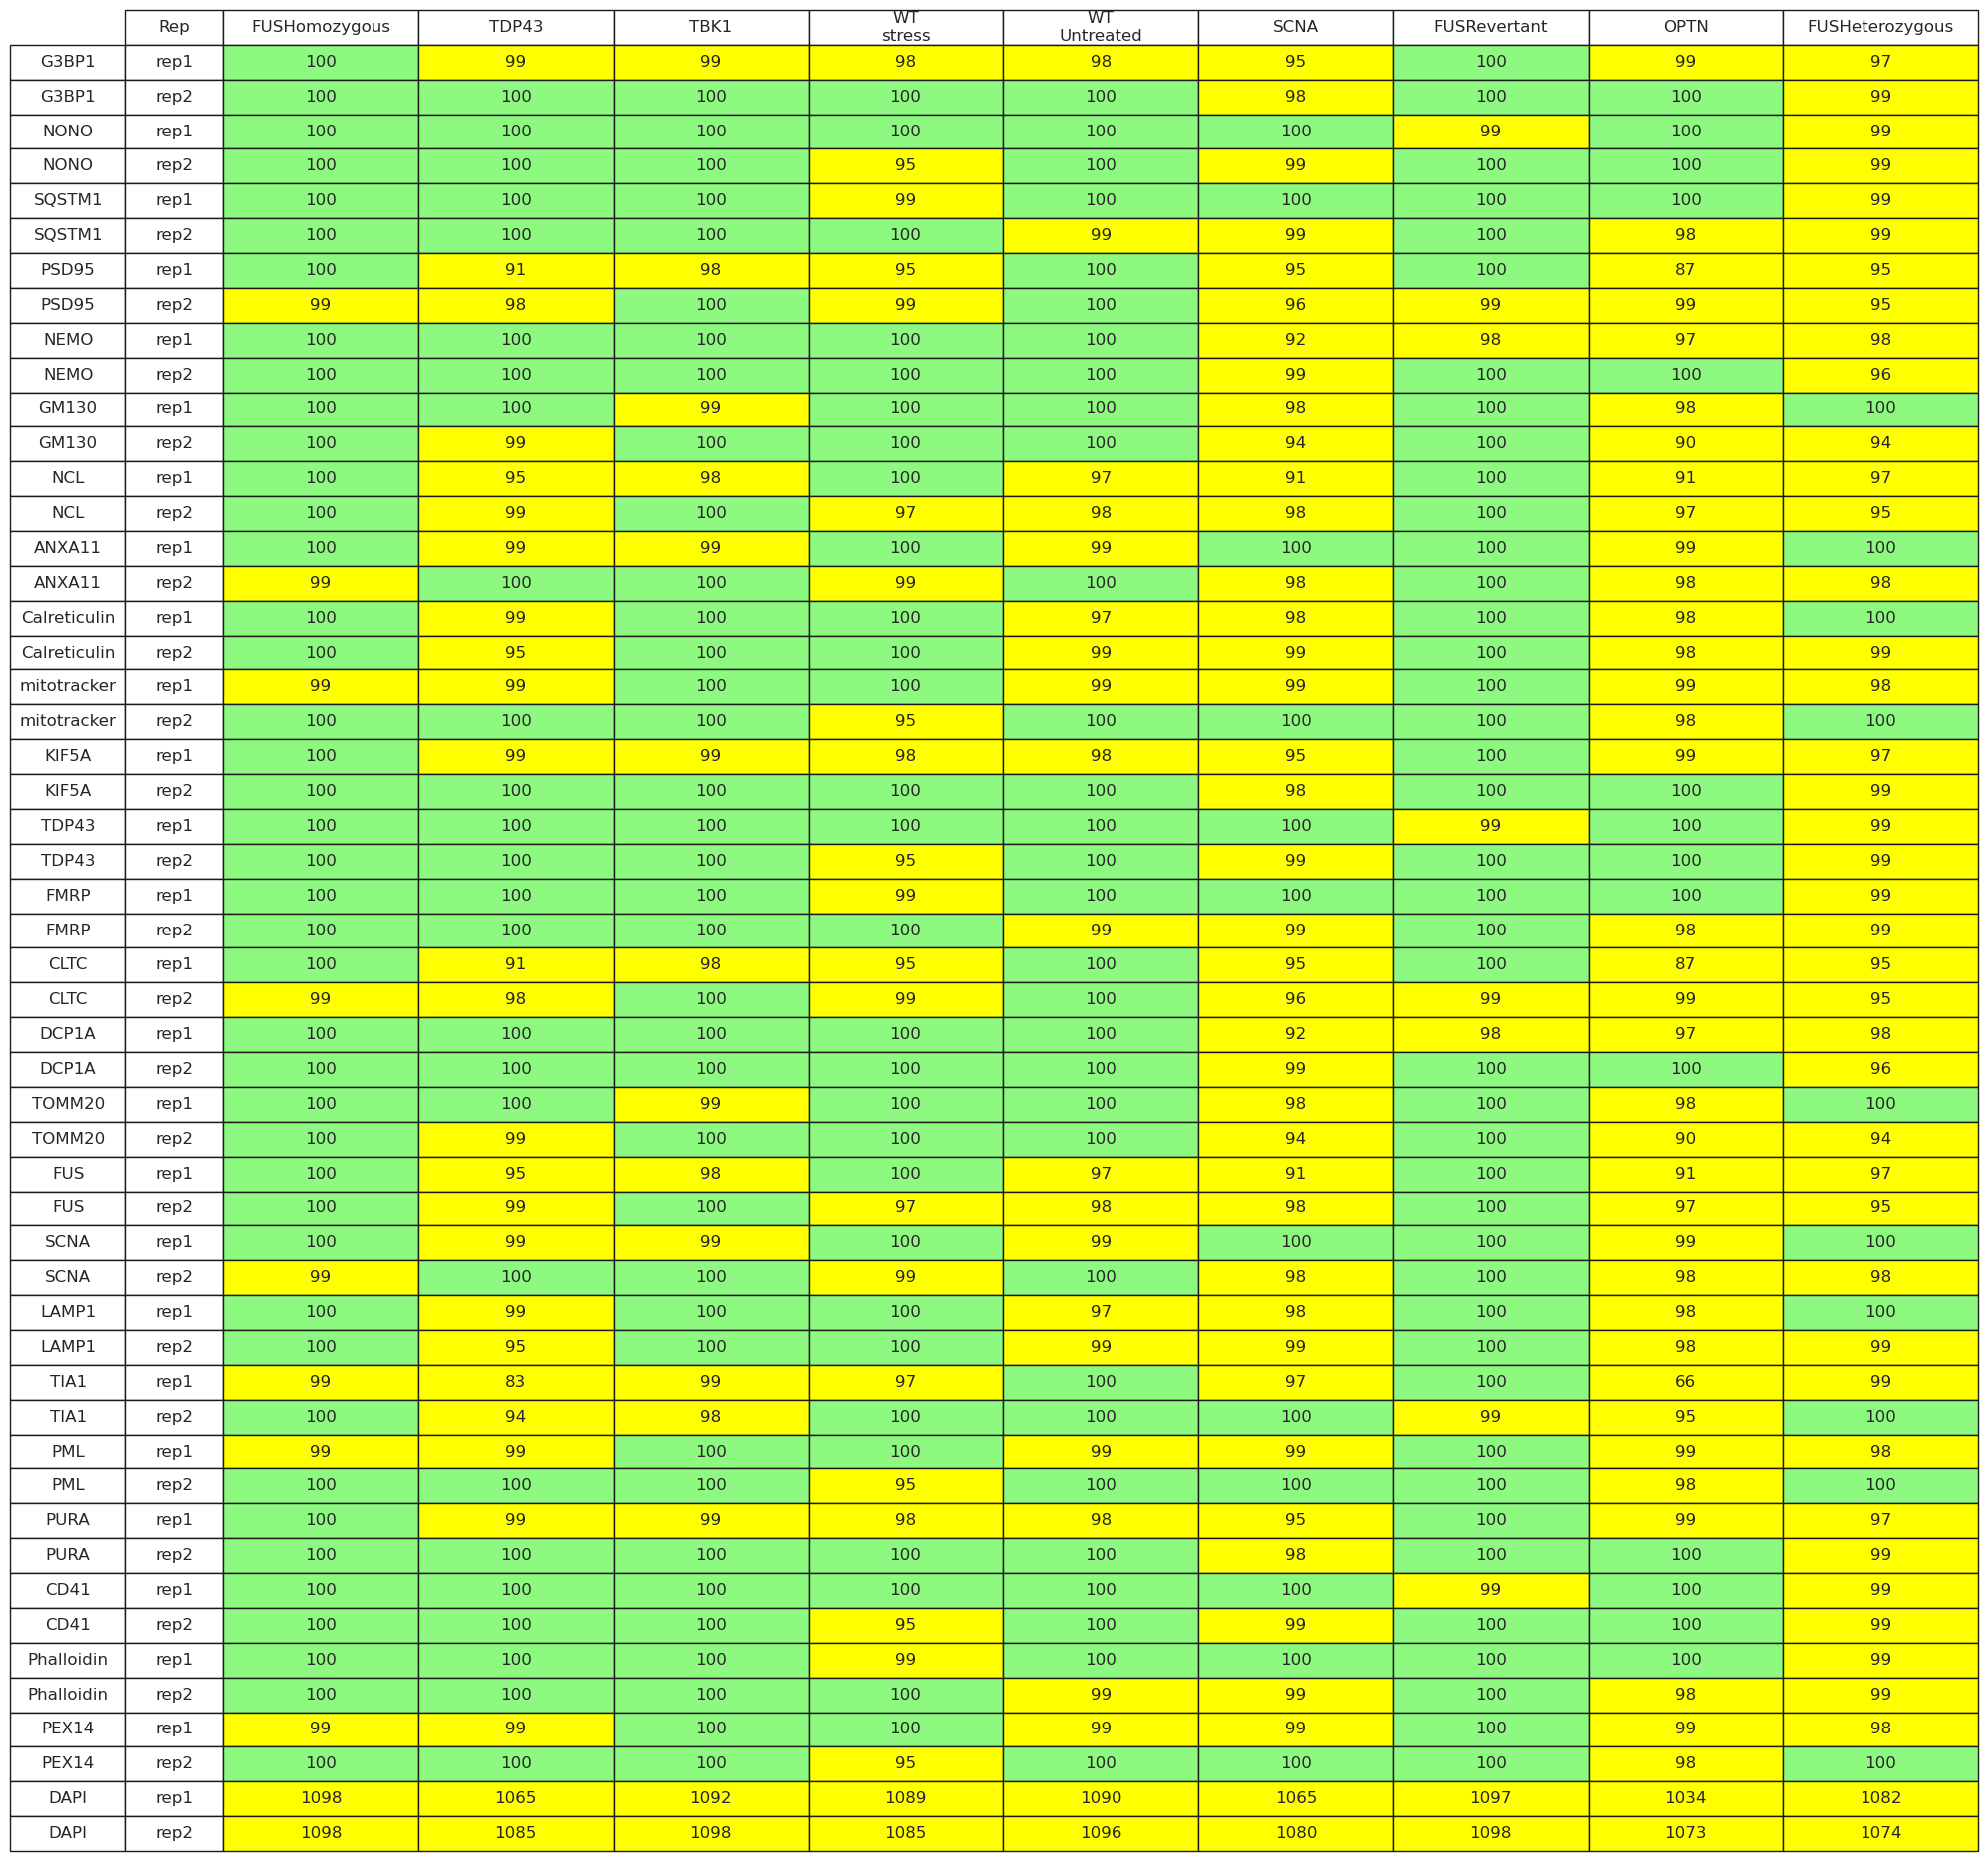

batch9_16bit_no_downsample
Folder structure is valid.
All files exists.
Total Sites:  63453


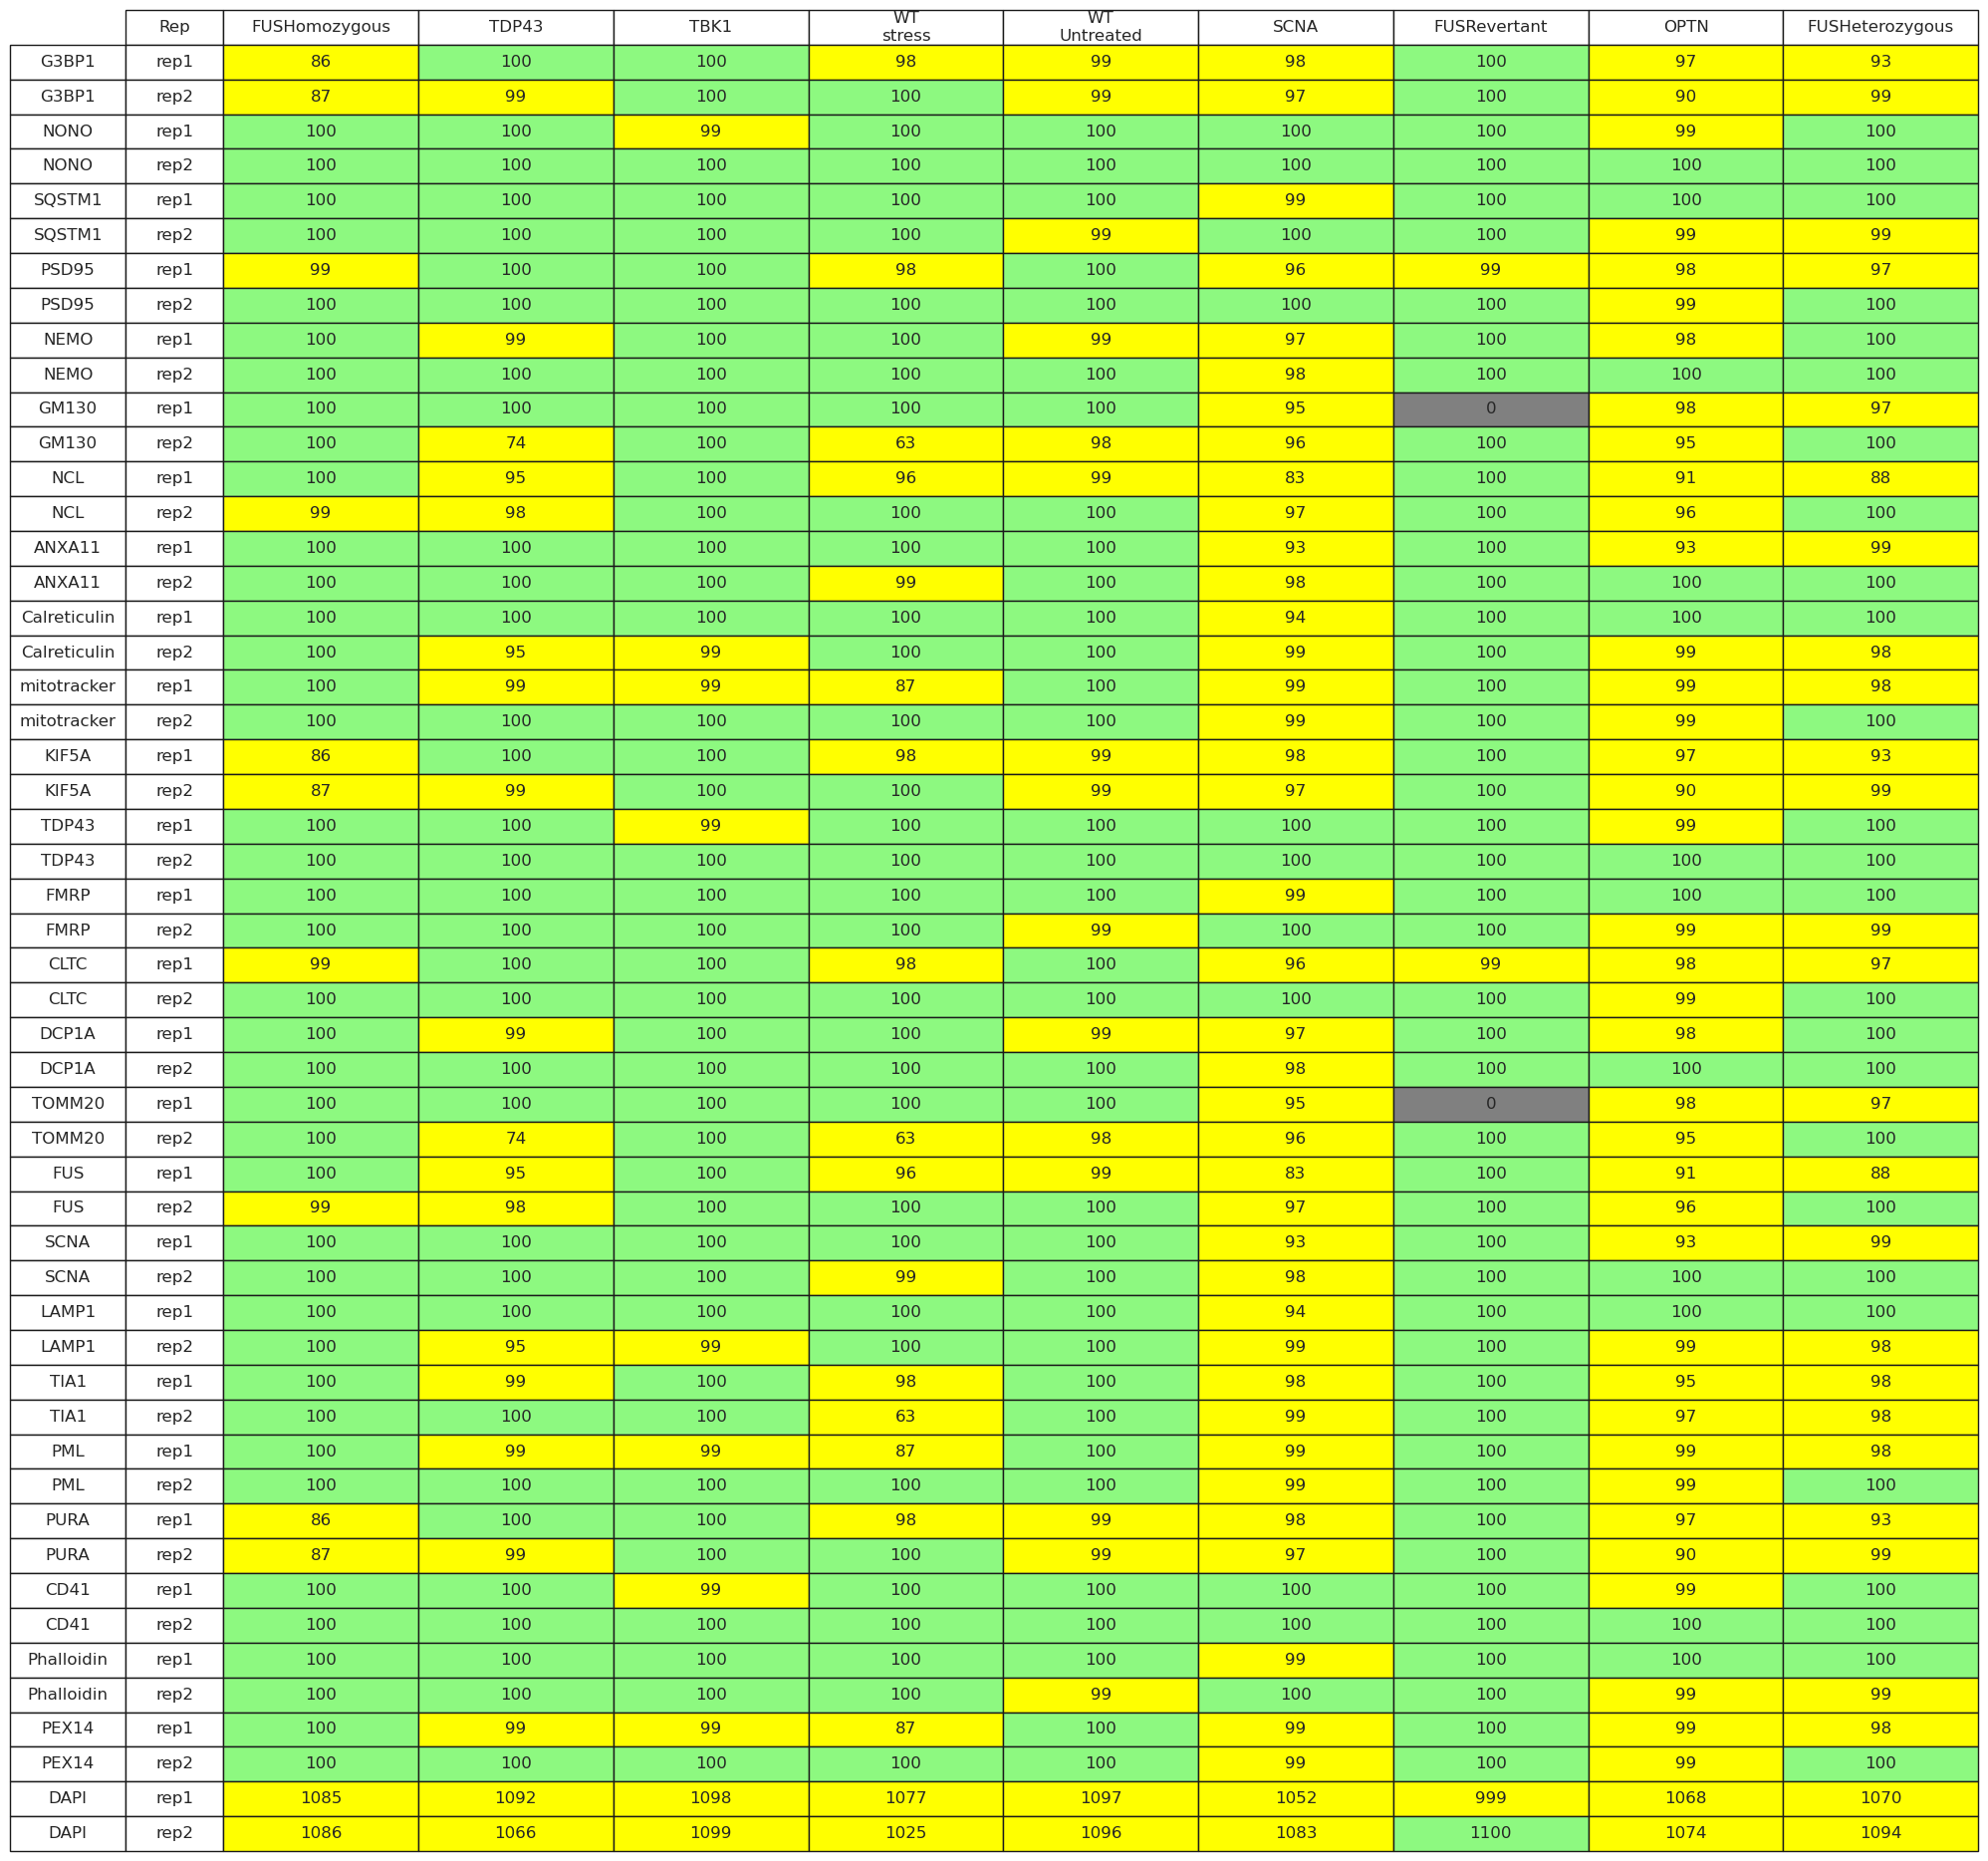

In [6]:
root_directory_proc = os.path.join(MOMAPS_DATA_HOME, 'input', 'images', 'processed', 'spd2',
                              'SpinningDisk')
procs = run_validate_folder_structure(root_directory_proc, True, panels, markers,PLOT_PATH,marker_info,
                                    cell_lines_to_cond, reps, cell_lines_for_disp, expected_dapi_raw,
                                     batches=batches)

### Difference between Raw and Processed

batch6_16bit_no_downsample


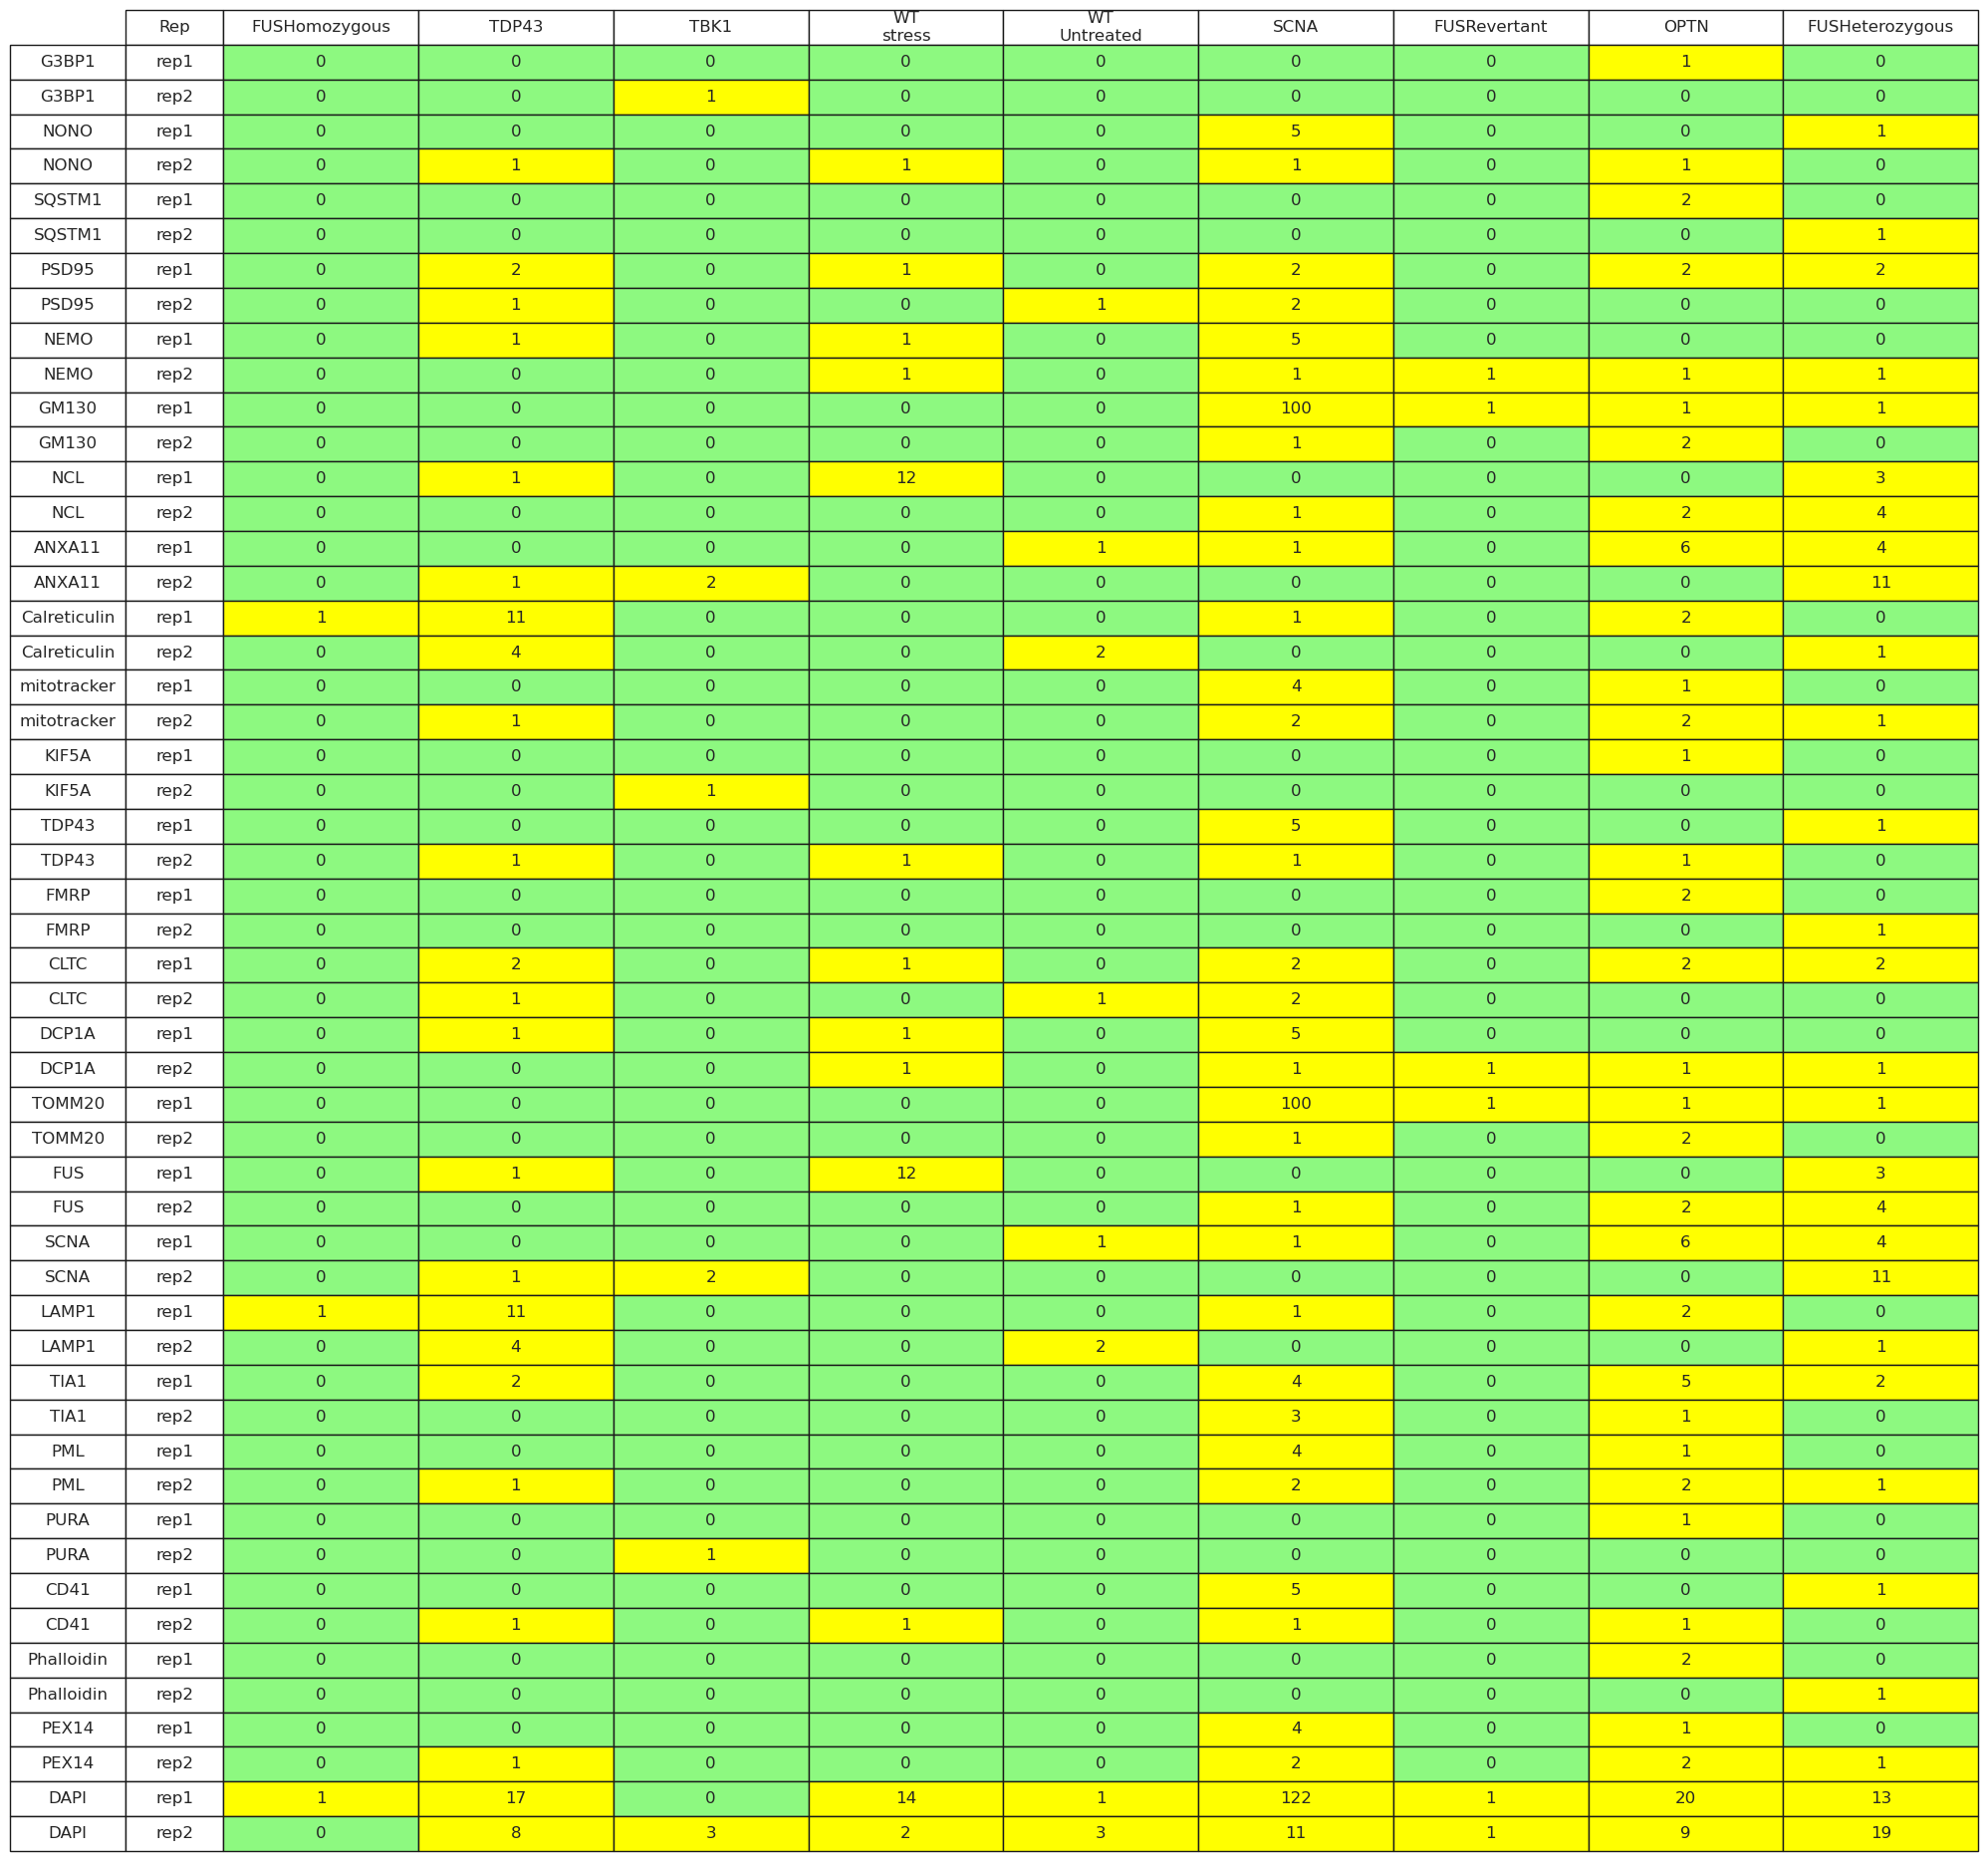

batch7_16bit_no_downsample


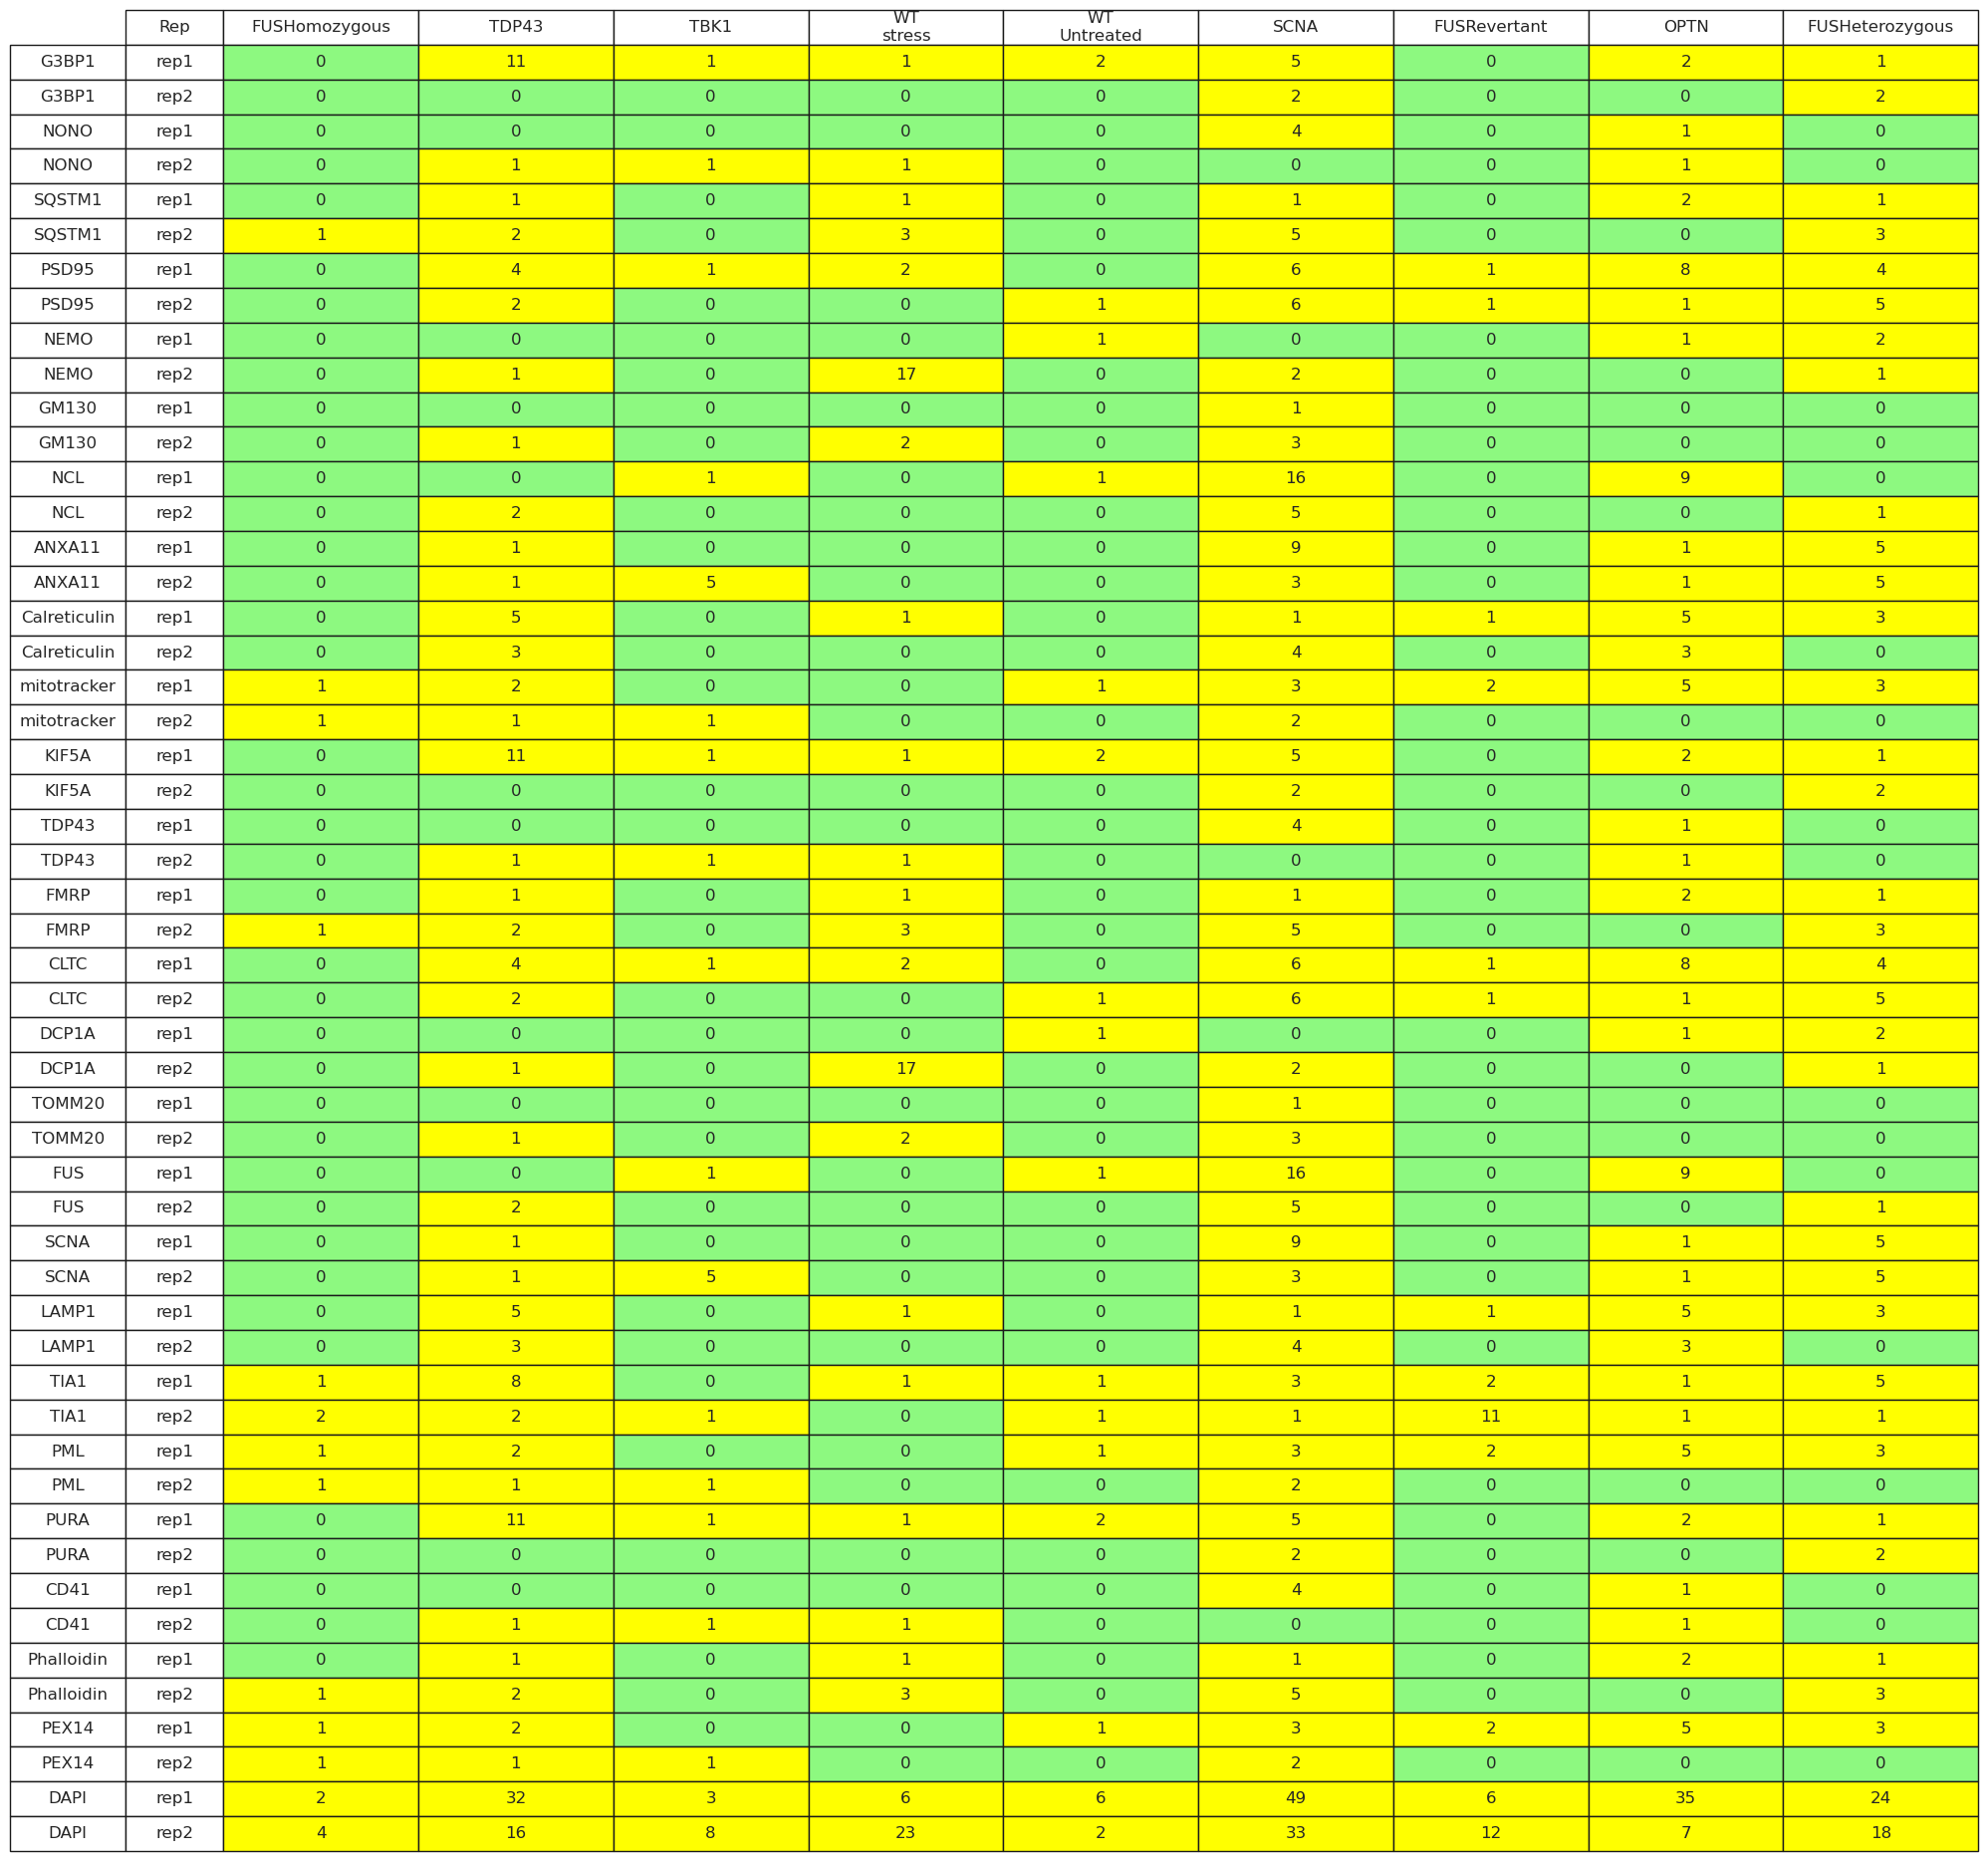

batch8_16bit_no_downsample


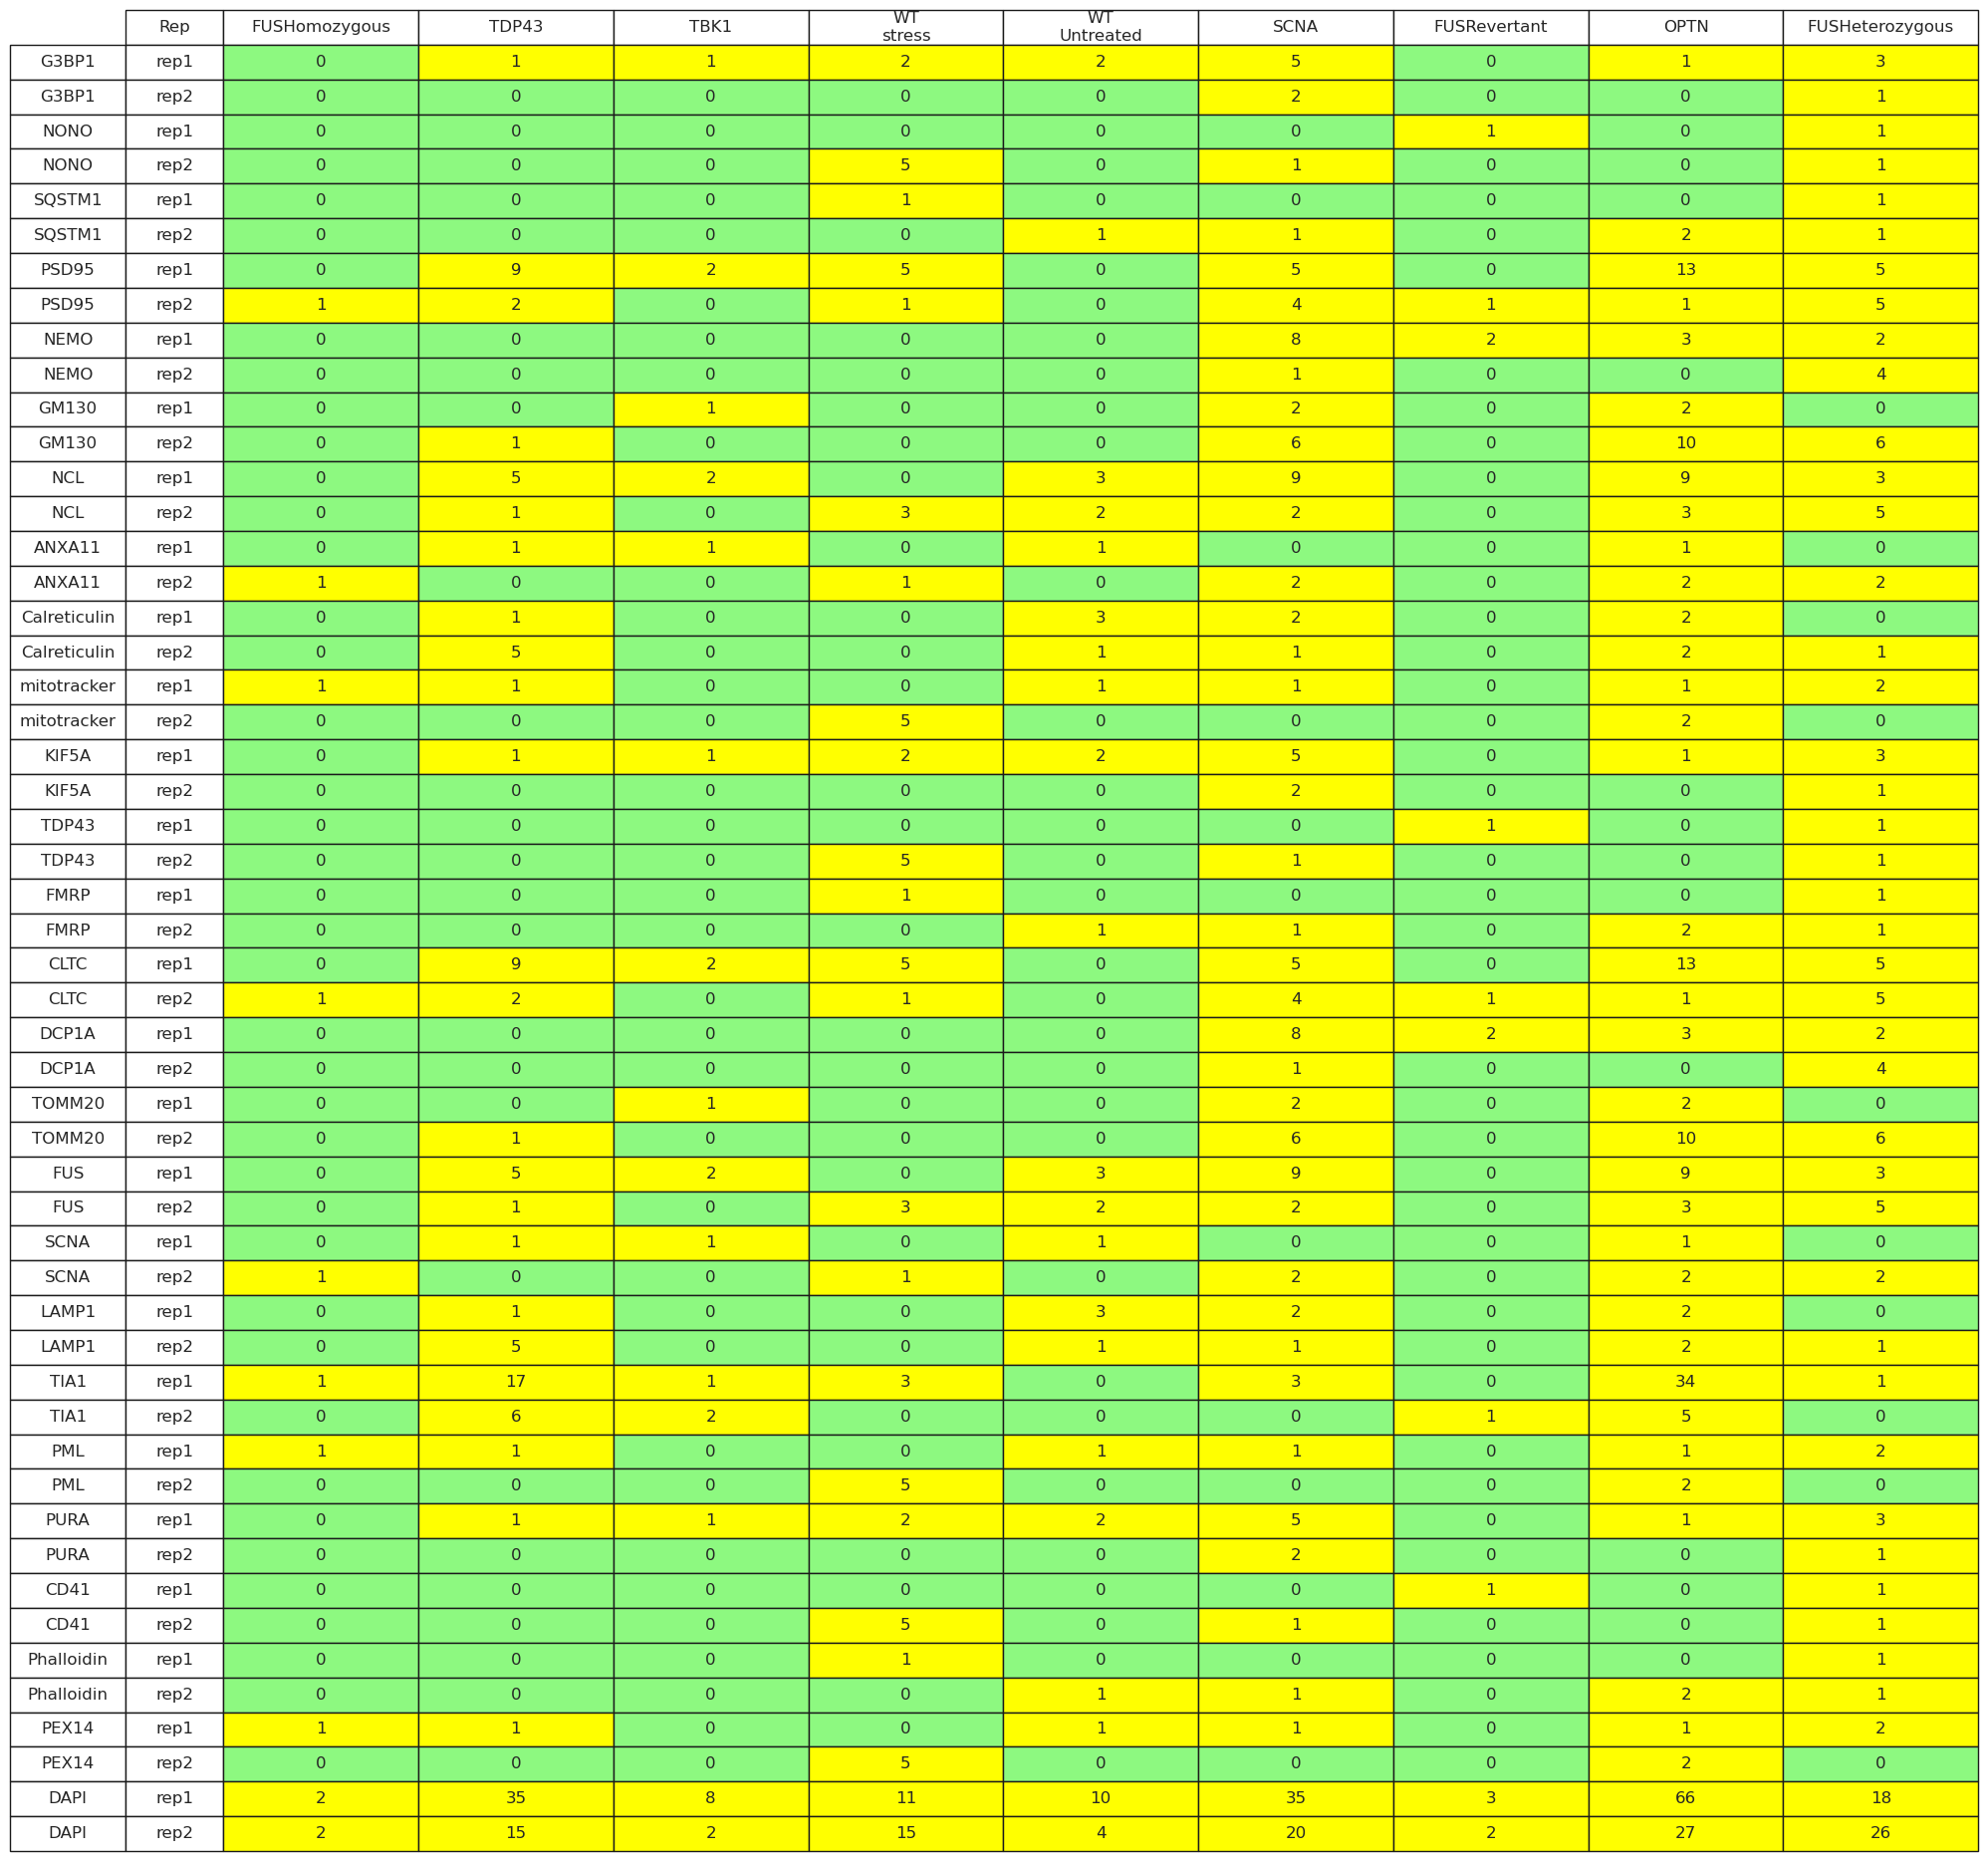

batch9_16bit_no_downsample


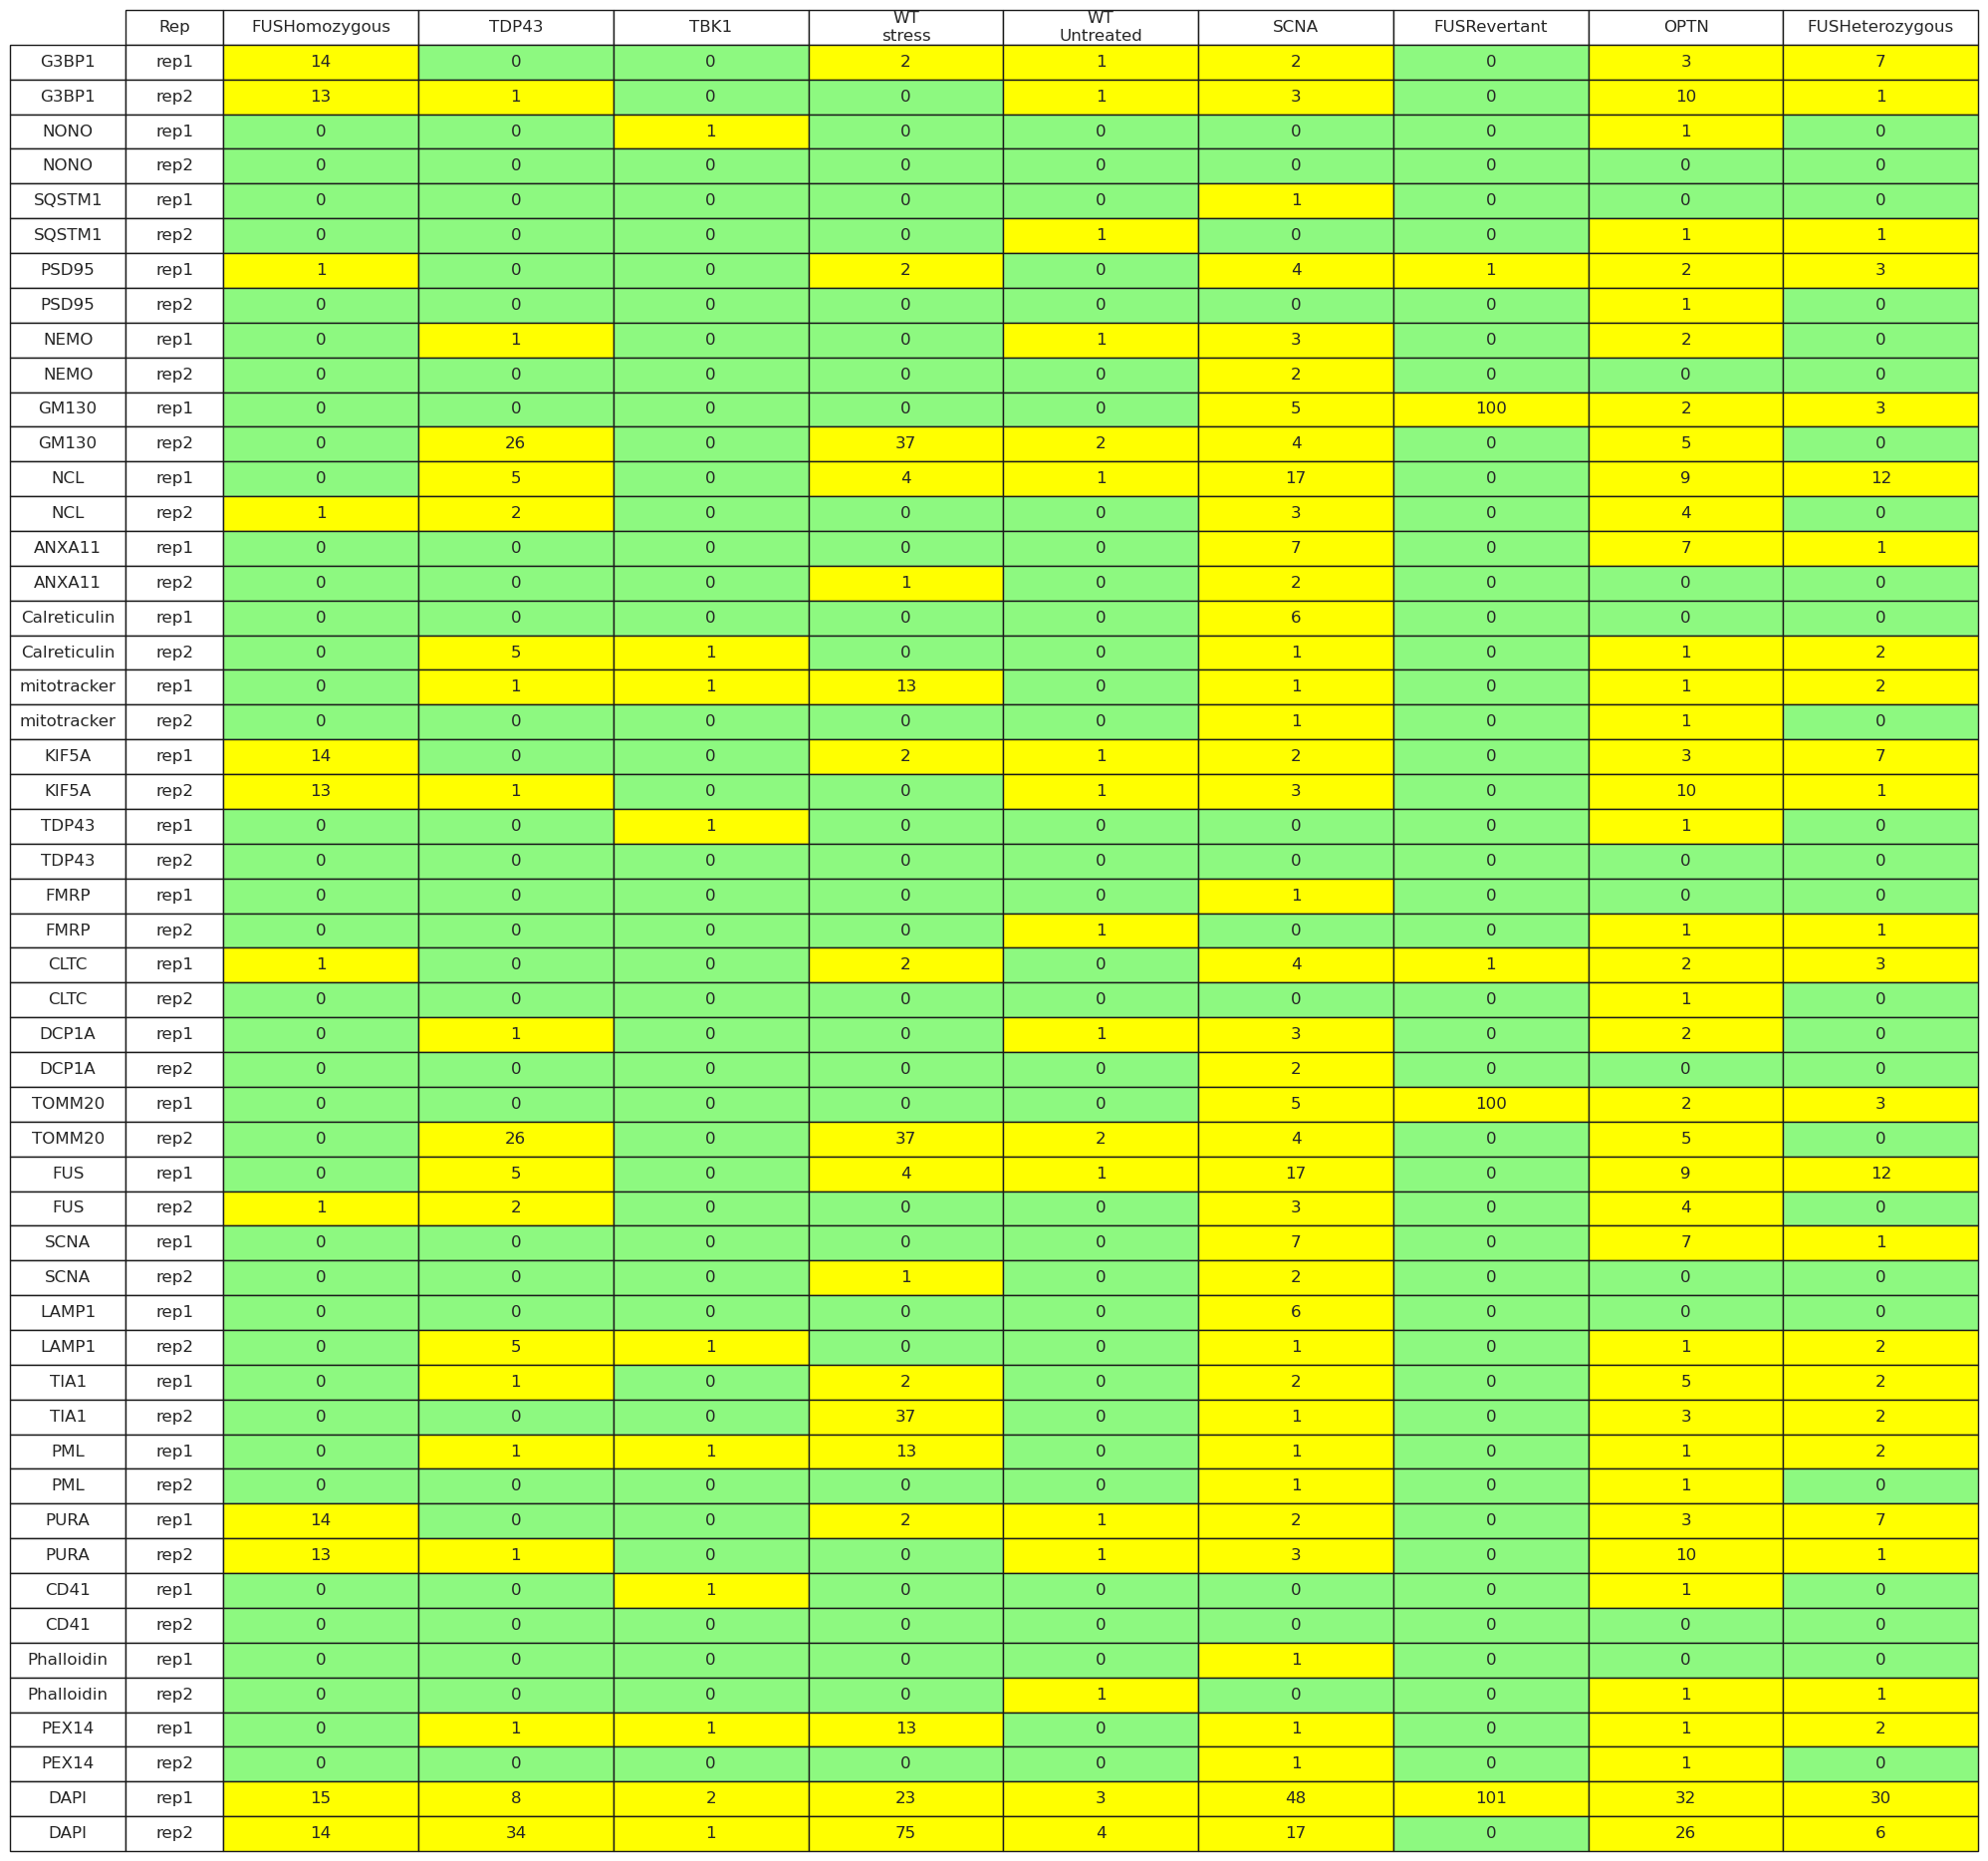

In [7]:
display_diff(batches, raws, procs, PLOT_PATH)

In [9]:
#for batch in list(range(3,9)) + ['7_16bit','8_16bit','9_16bit']:  
for batch in batches:
    with contextlib.redirect_stdout(io.StringIO()):
        var = sample_and_calc_variance(root_directory_proc, batch, 
                                       sample_size_per_markers=200, num_markers=26)
    print(f'{batch} var: ',var)

batch6_16bit_no_downsample var:  0.016600536468498107
batch7_16bit_no_downsample var:  0.016091262813612773
batch8_16bit_no_downsample var:  0.01648993853958687
batch9_16bit_no_downsample var:  0.01656599754888084



# <font color='red'>Number of sites in each batch and cell line </font>


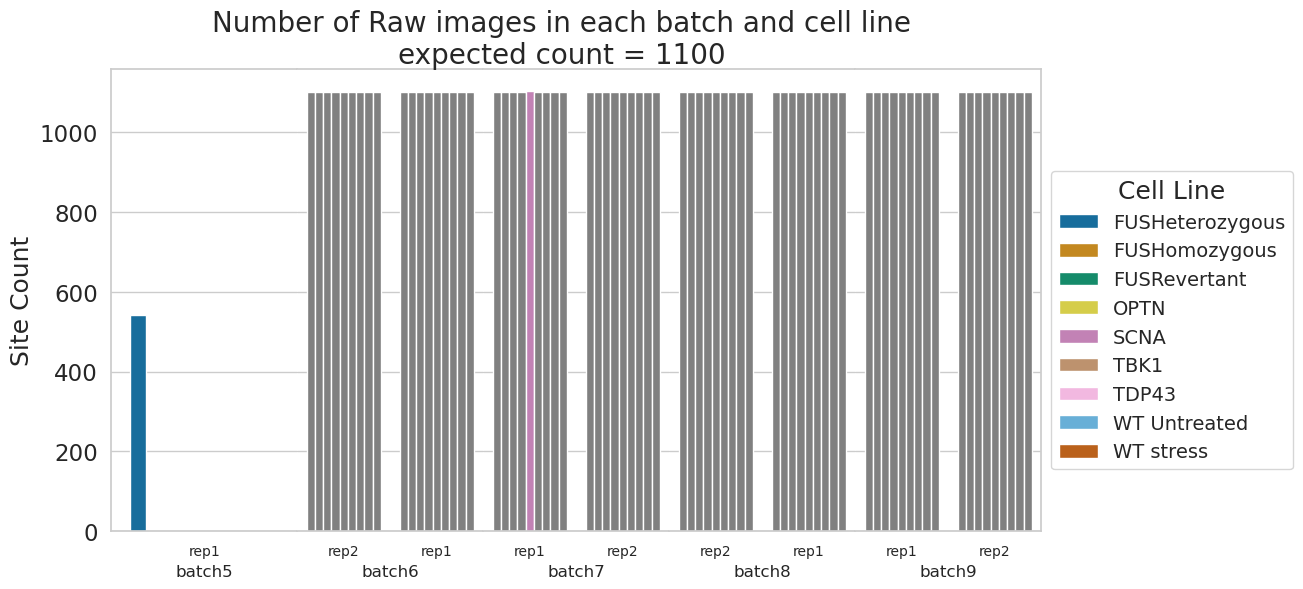

In [10]:
plot_sites_count(df, expected_raw, lines_order, custom_palette, split_to_reps=True)

# <font color='red'>Number of Cells in Site for each batch and cell line </font>

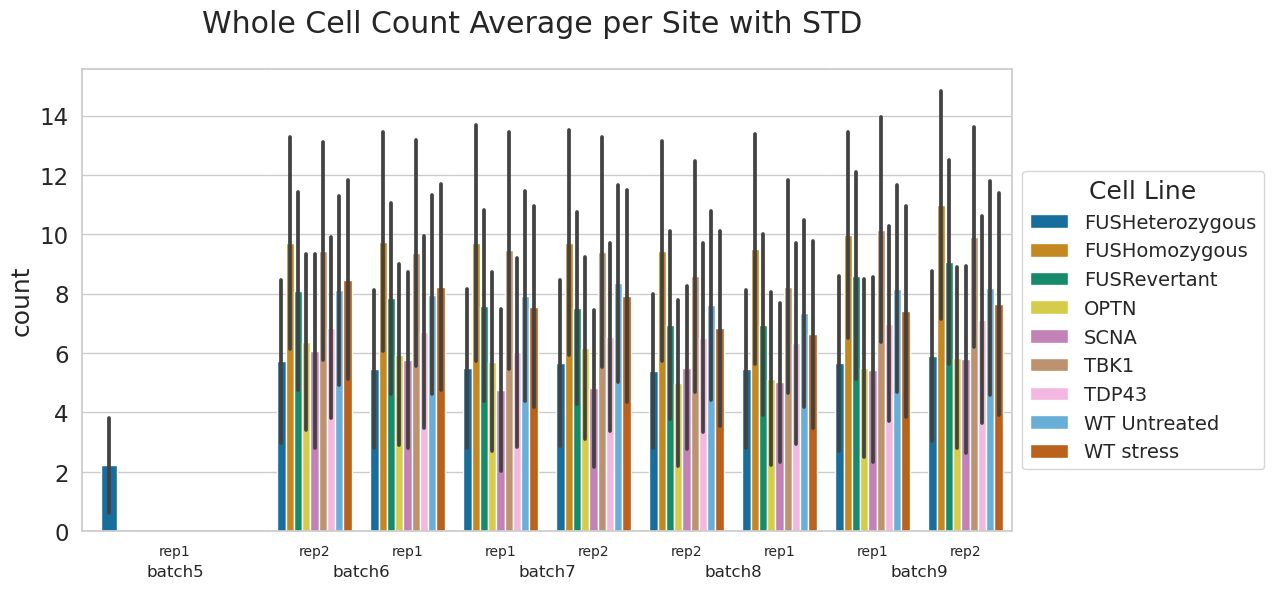

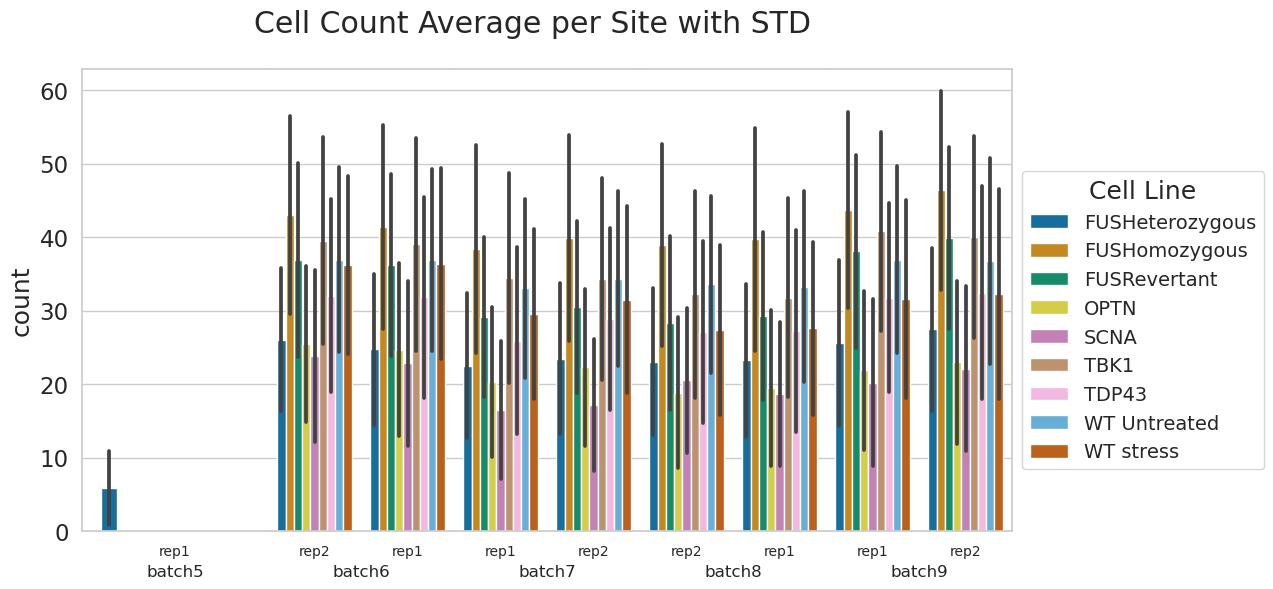

In [11]:
df_no_empty_sites = df[df.n_valid_tiles !=0]
plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=True)

plot_cell_count(df_no_empty_sites, lines_order, custom_palette, whole_cells=False)
# can add norm=True to norm by max


# <font color='blue'>number of valid tiles per image (site)</font>


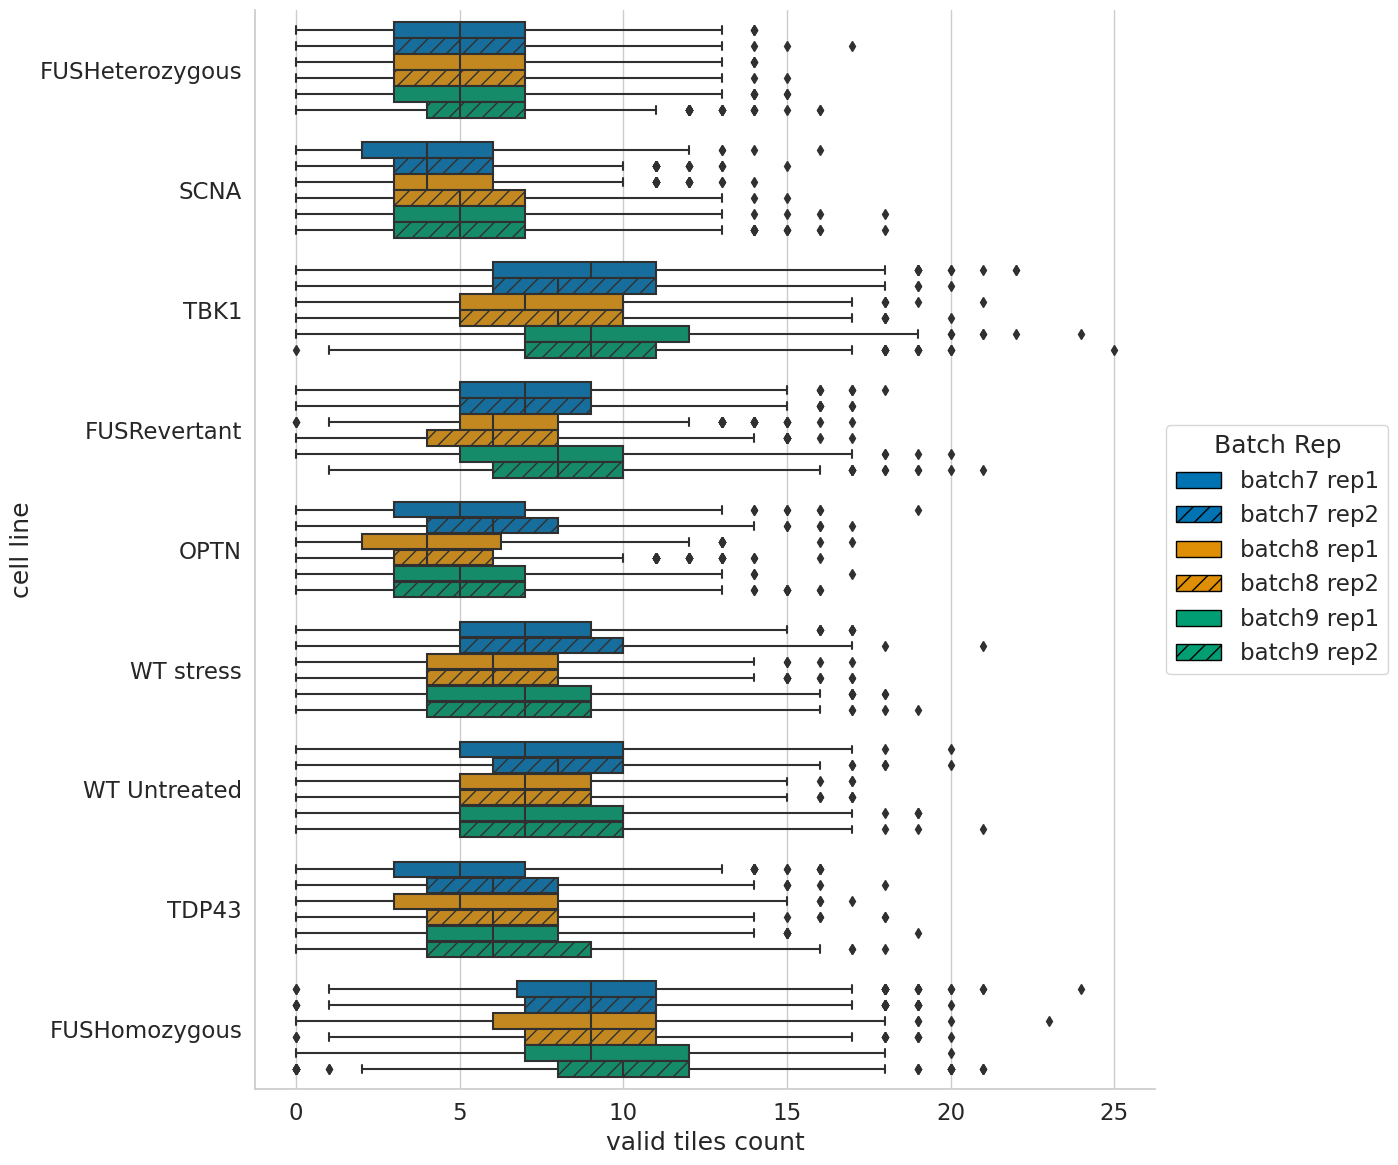

In [12]:
plot_n_valid_tiles_count(df, custom_palette,reps, batch_min=7, batch_max=9)

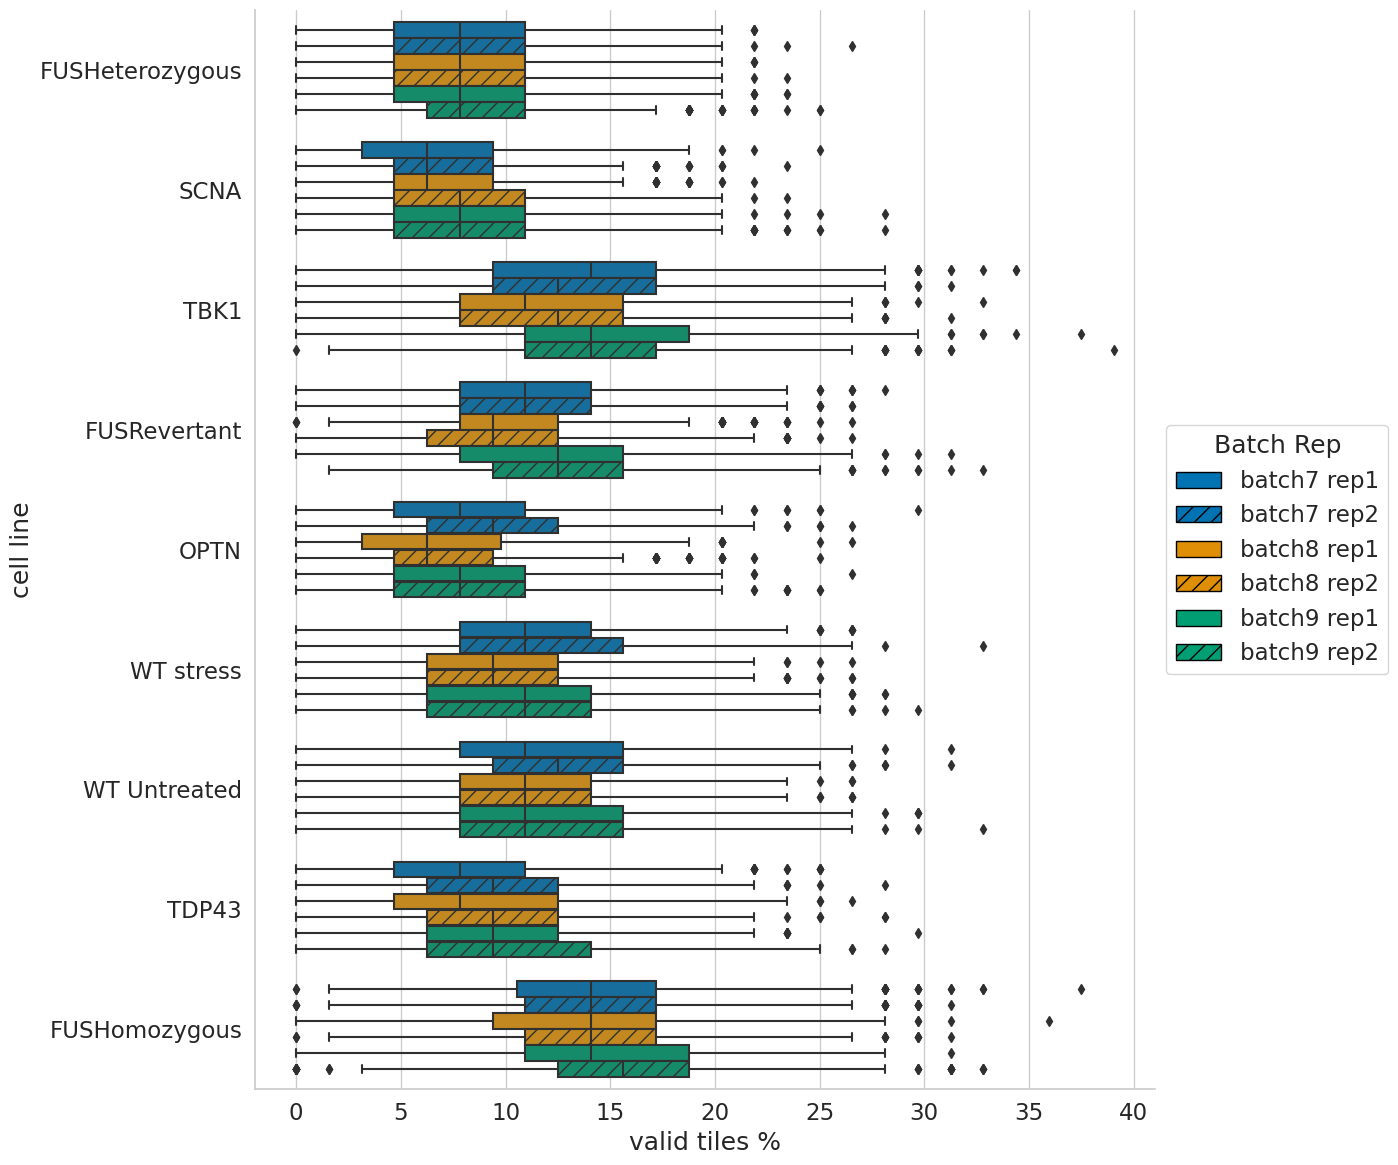

In [13]:
plot_p_valid_tiles_count(df, custom_palette,reps, batch_min=7, batch_max=9)


## <font color='purple'>Heatmap QC per batch, panel and cell line(tiles that passed QC condition)  </font>


/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))
/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/seaborn/matrix.py:309: UserWarning: Attempting to set identical bottom == top == 0 results in singular transformations; automatically expanding.
  ax.set(xlim=(0, self.data.shape[1]), ylim=(0, self.data.shape[0]))


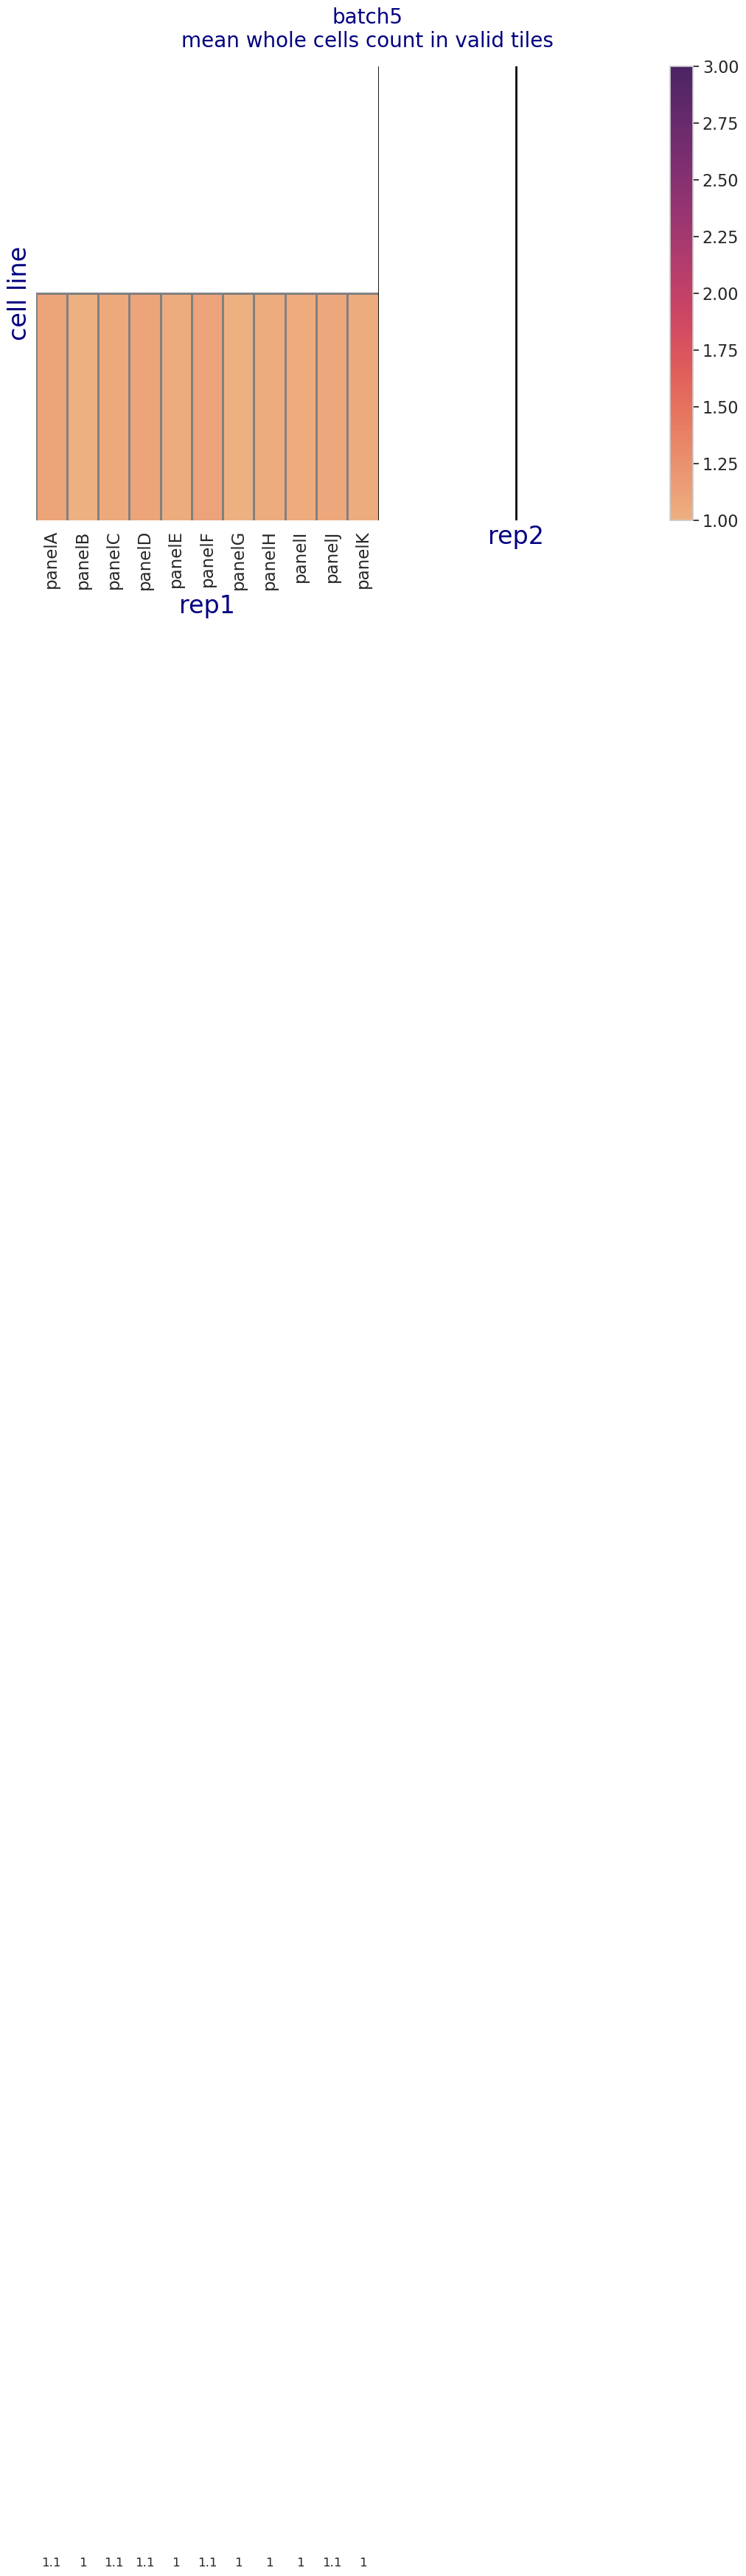

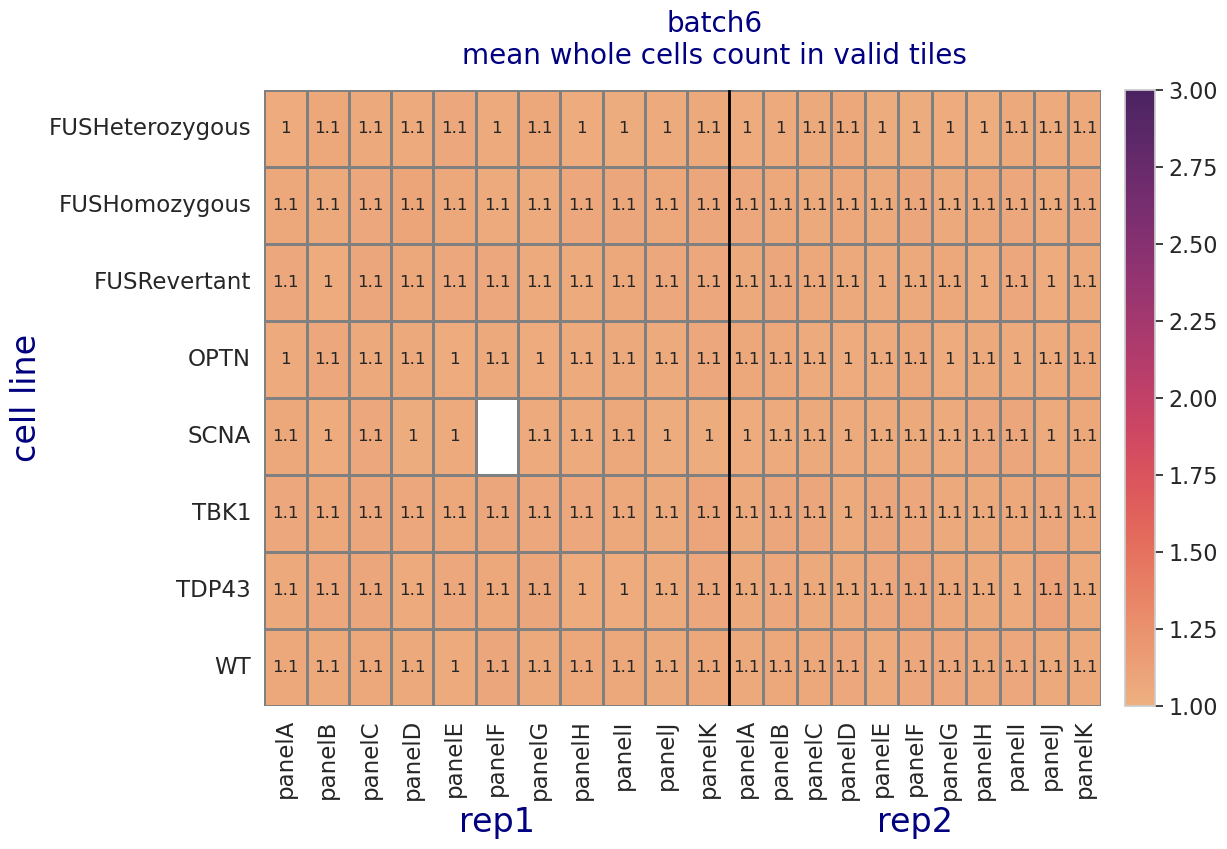

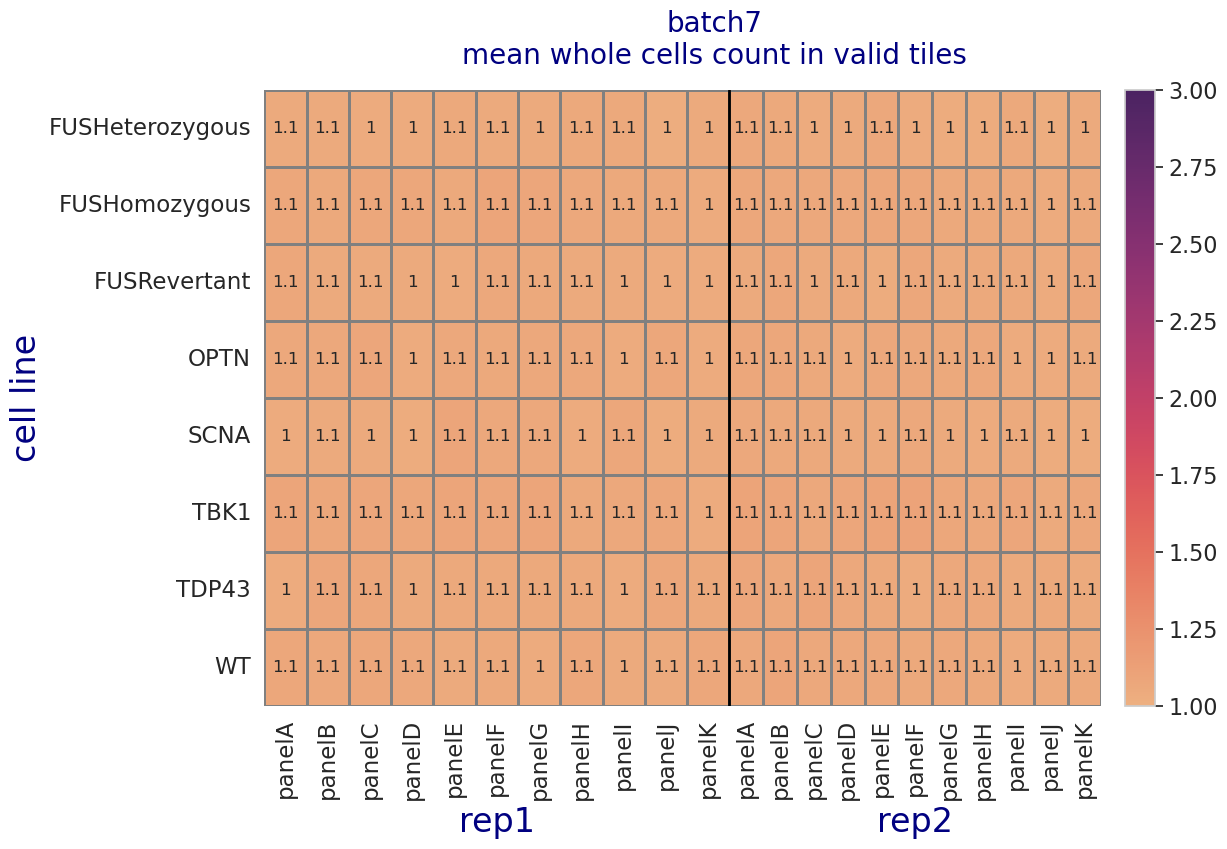

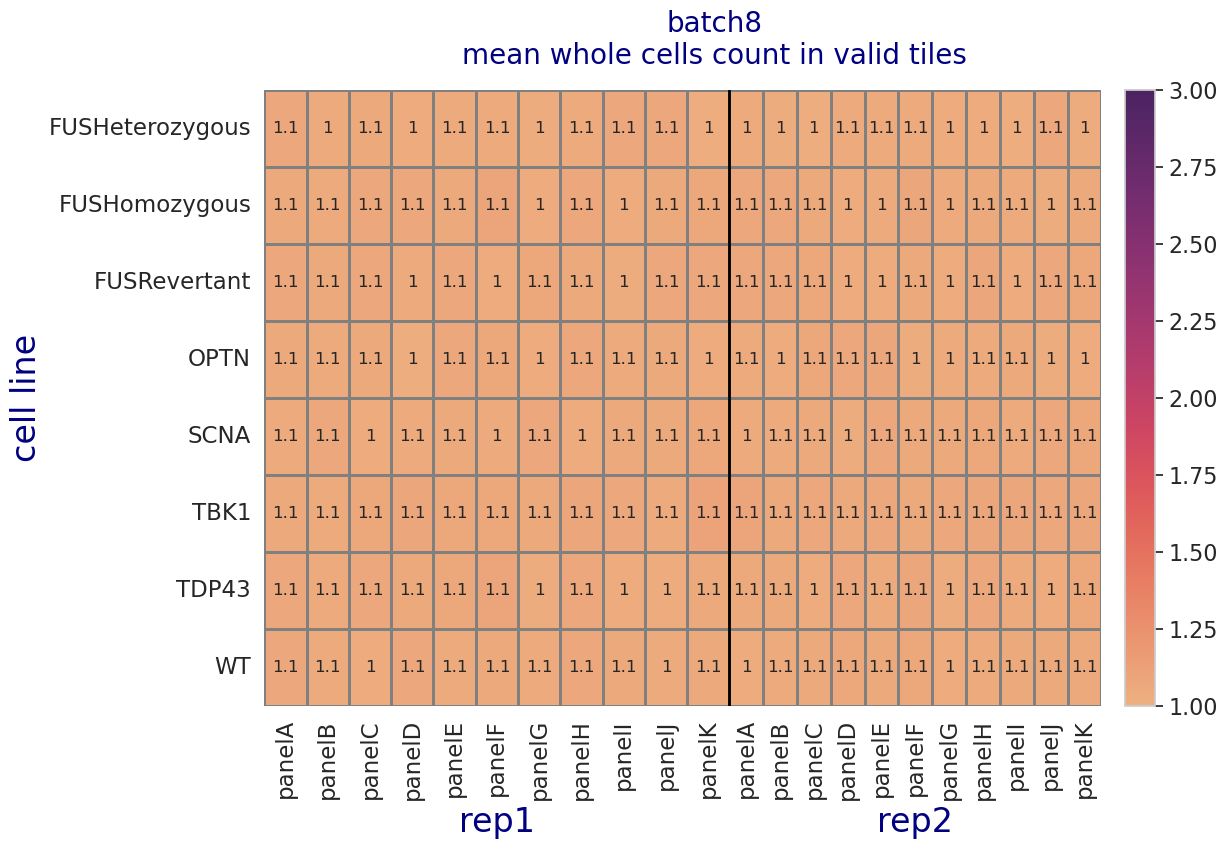

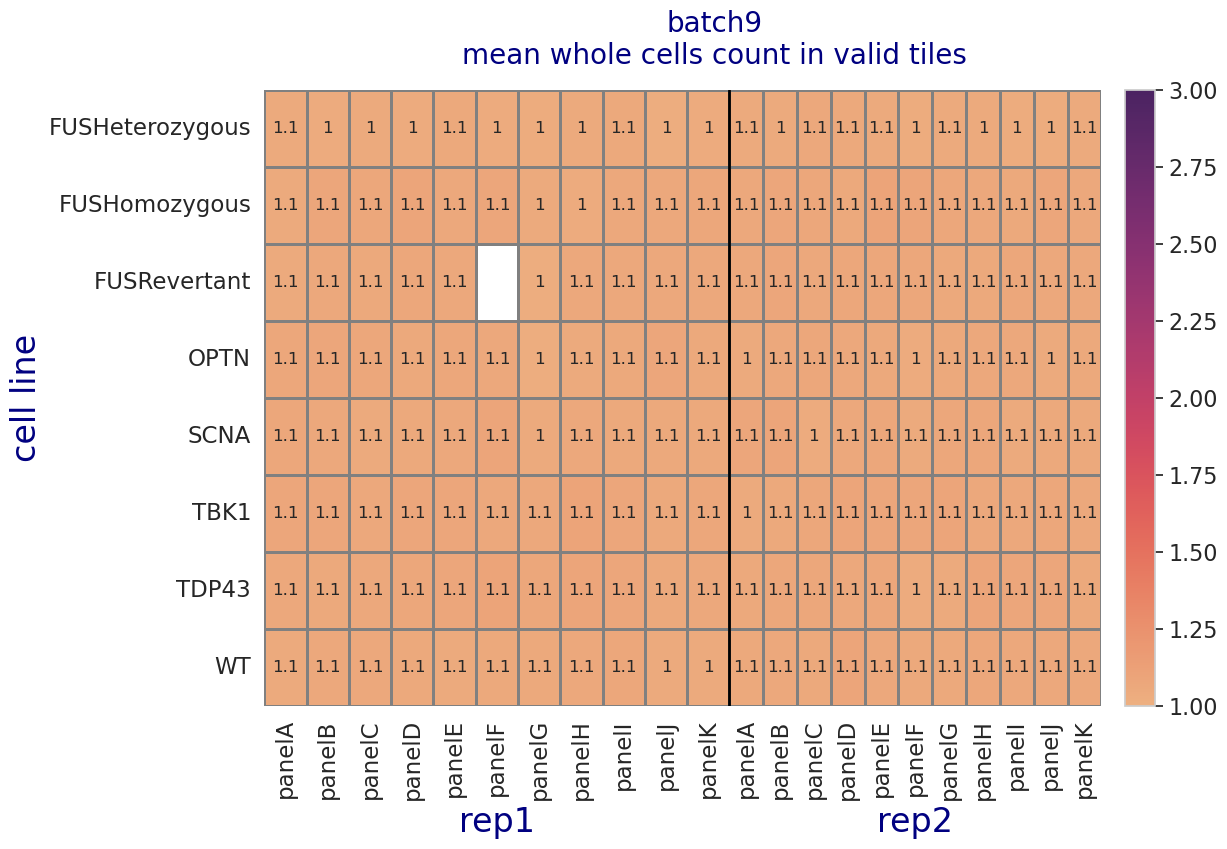

In [14]:
plot_hm(df, split_by='rep', rows='cell_line', columns='panel')

# Assessing Staining Reproducibility and Outliers

batch7_16bit_no_downsample
batch8_16bit_no_downsample


/home/labs/hornsteinlab/Collaboration/MOmaps_Noam/MOmaps/src/common/lib/images_qc.py:688: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


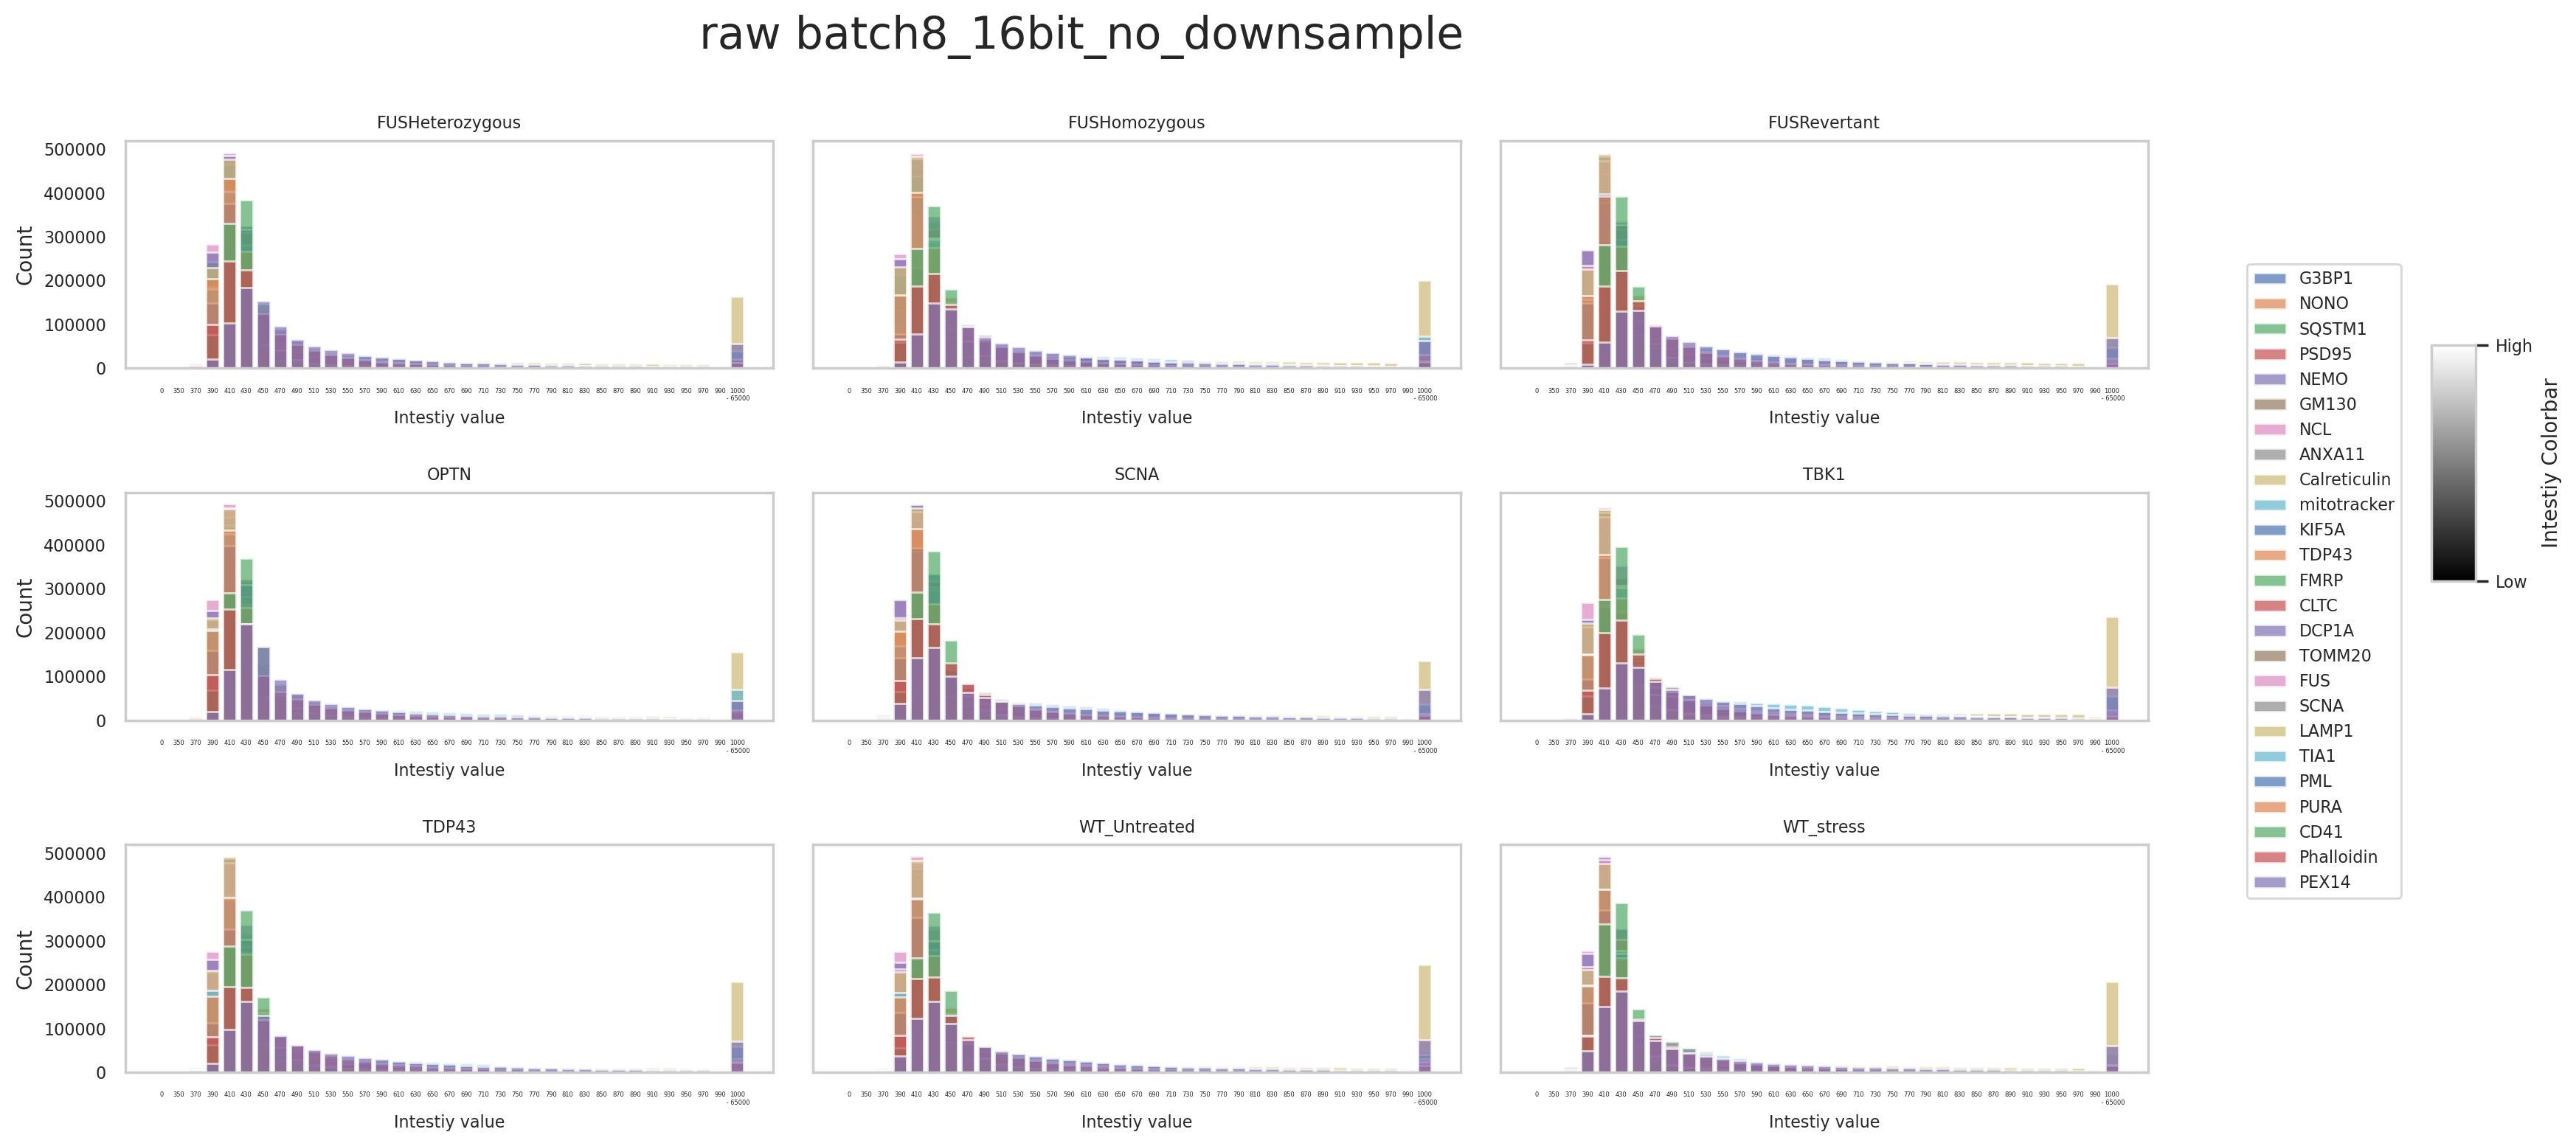

/home/labs/hornsteinlab/Collaboration/MOmaps/anaconda3/momaps_37/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


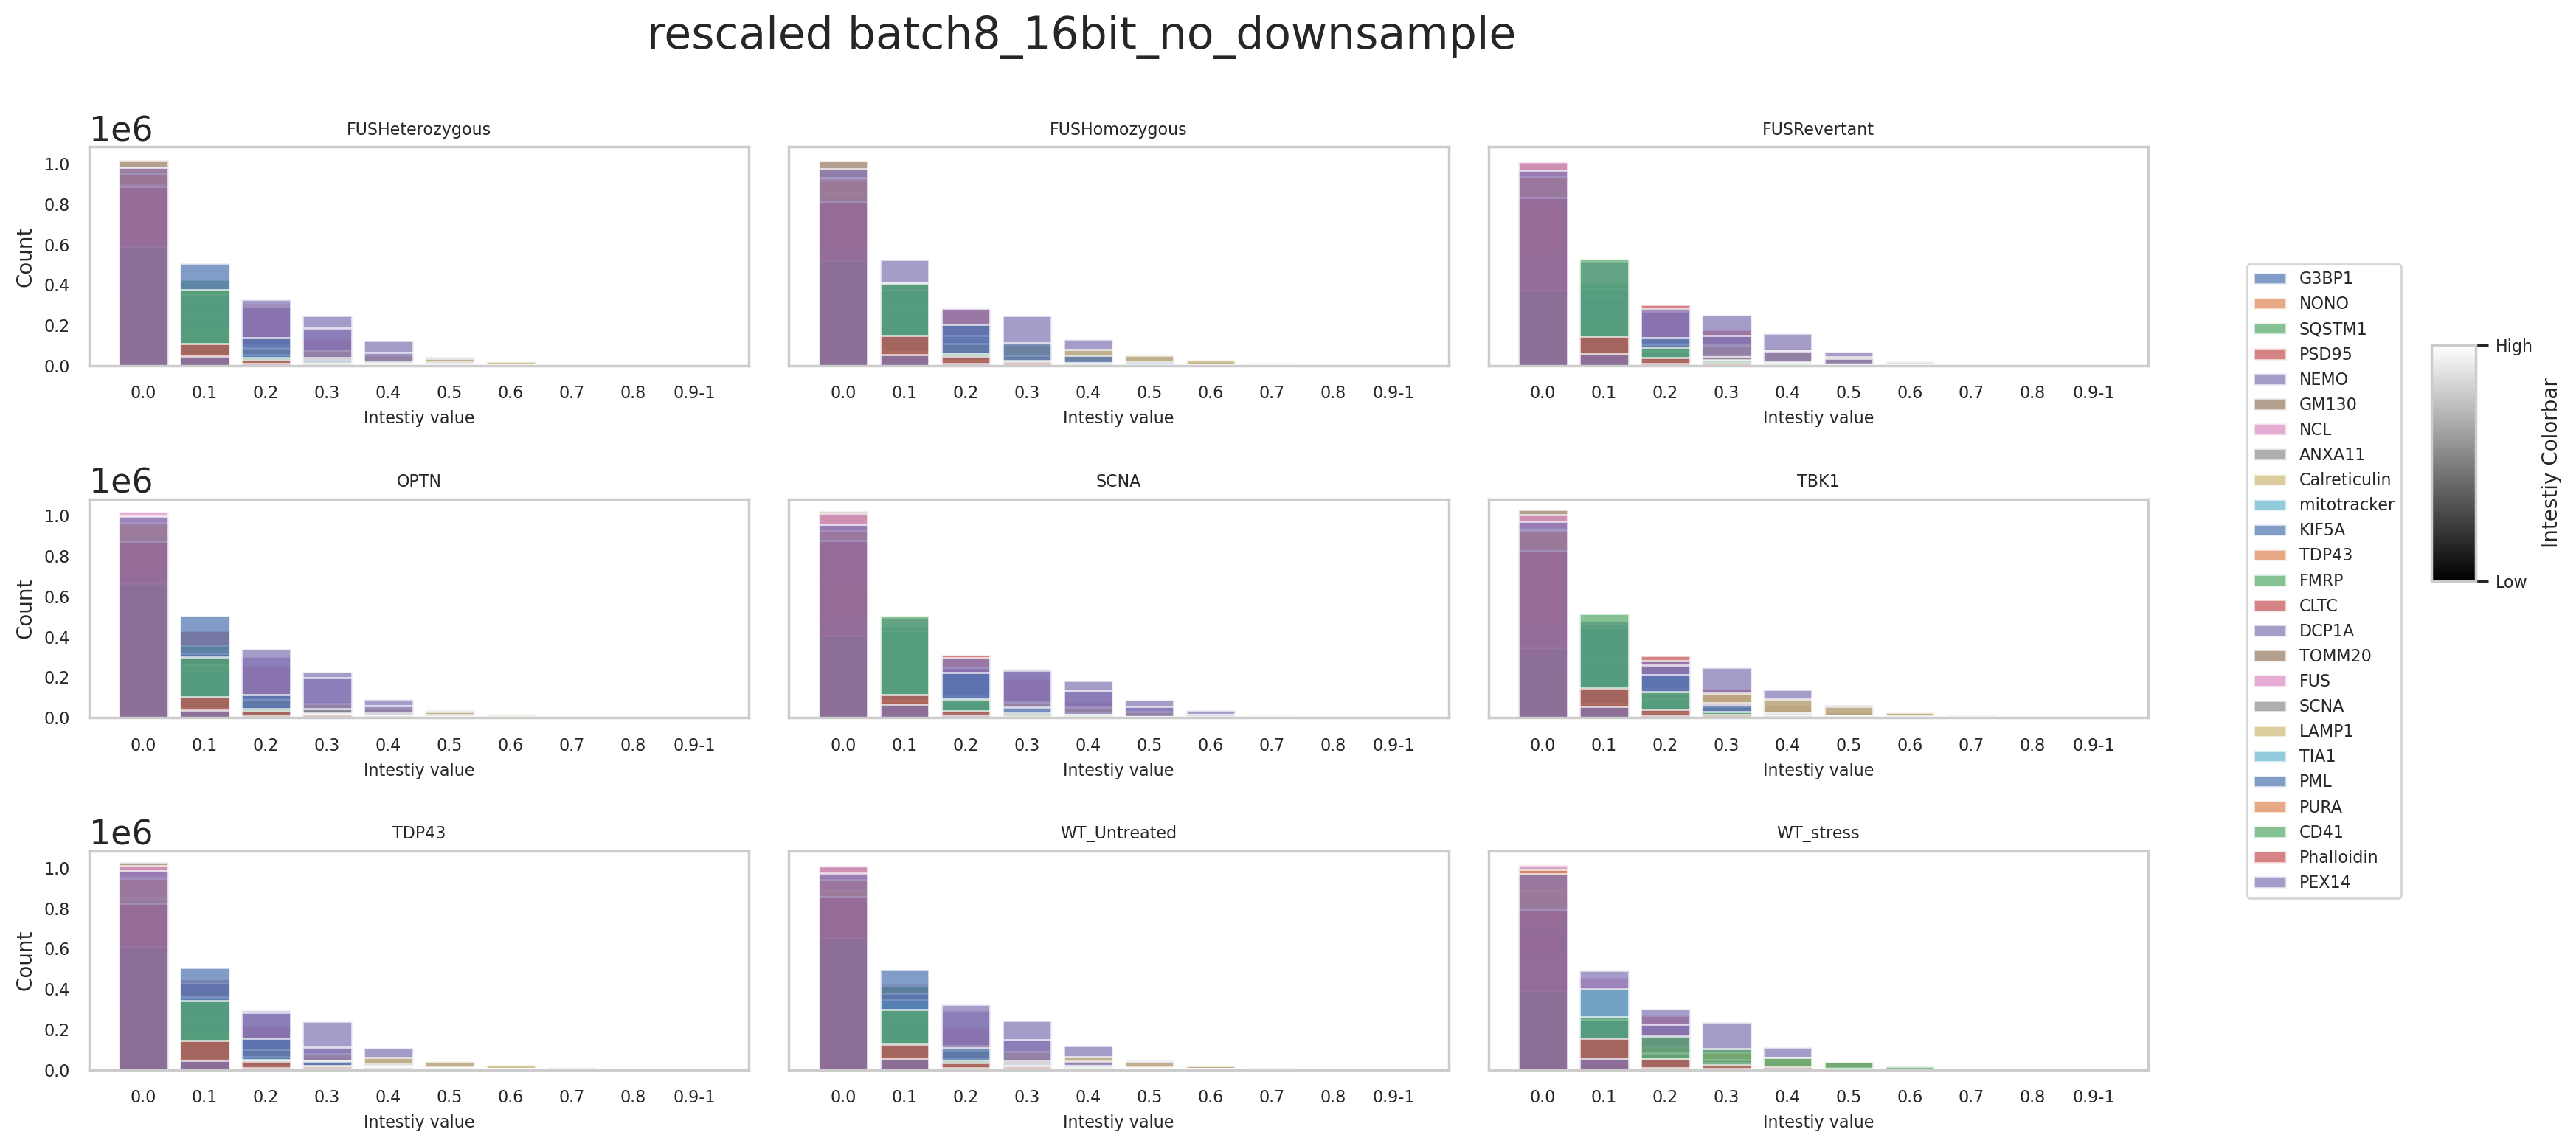

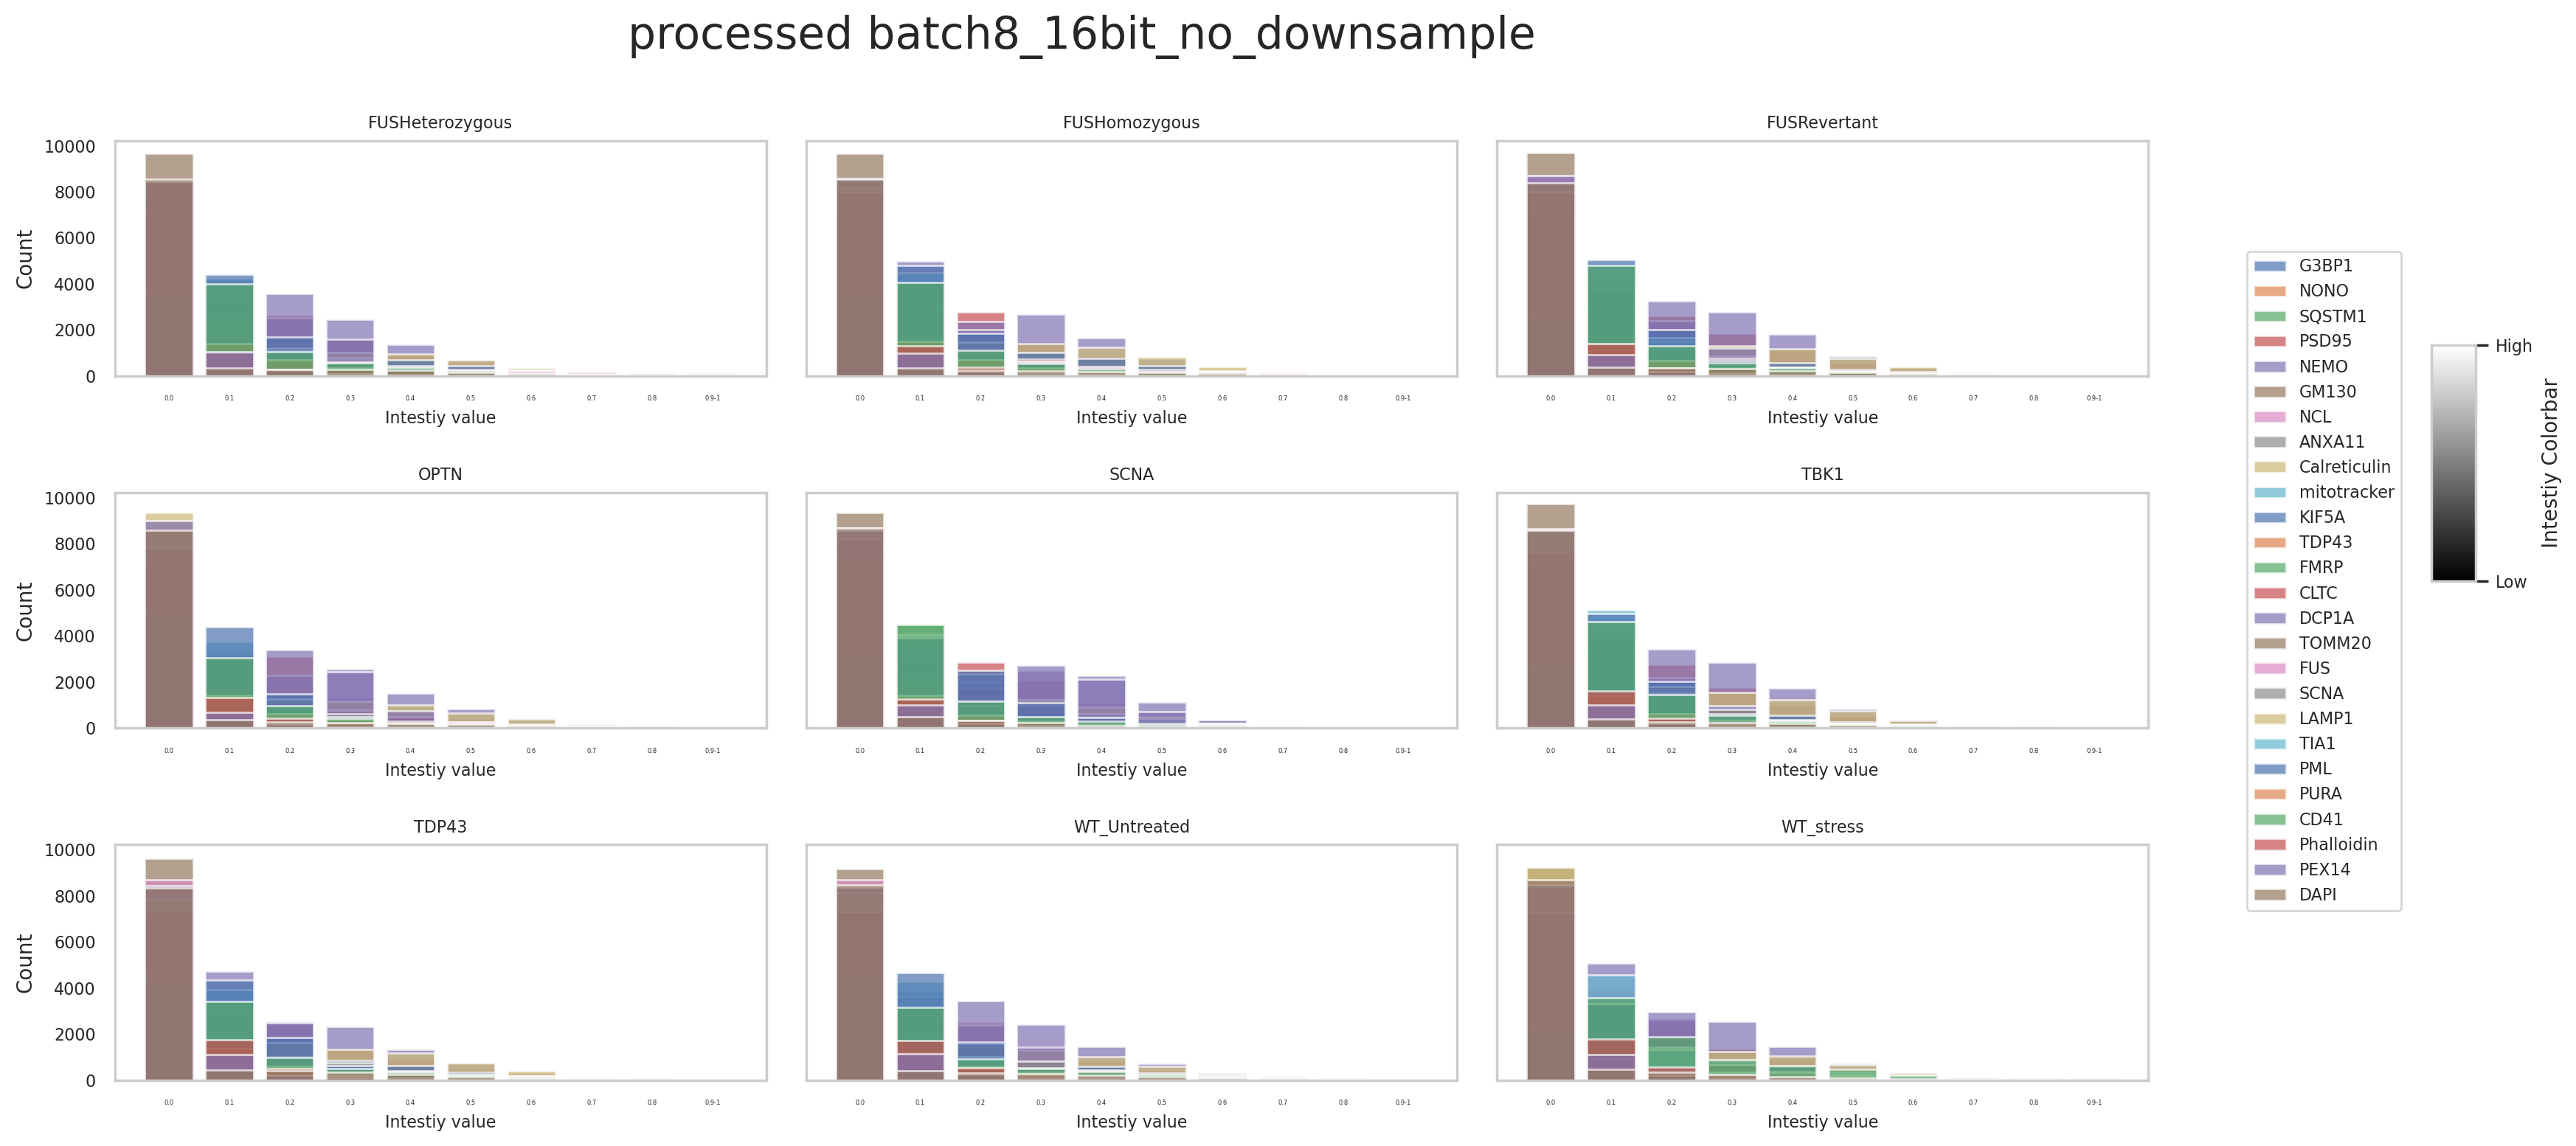

batch9_16bit_no_downsample


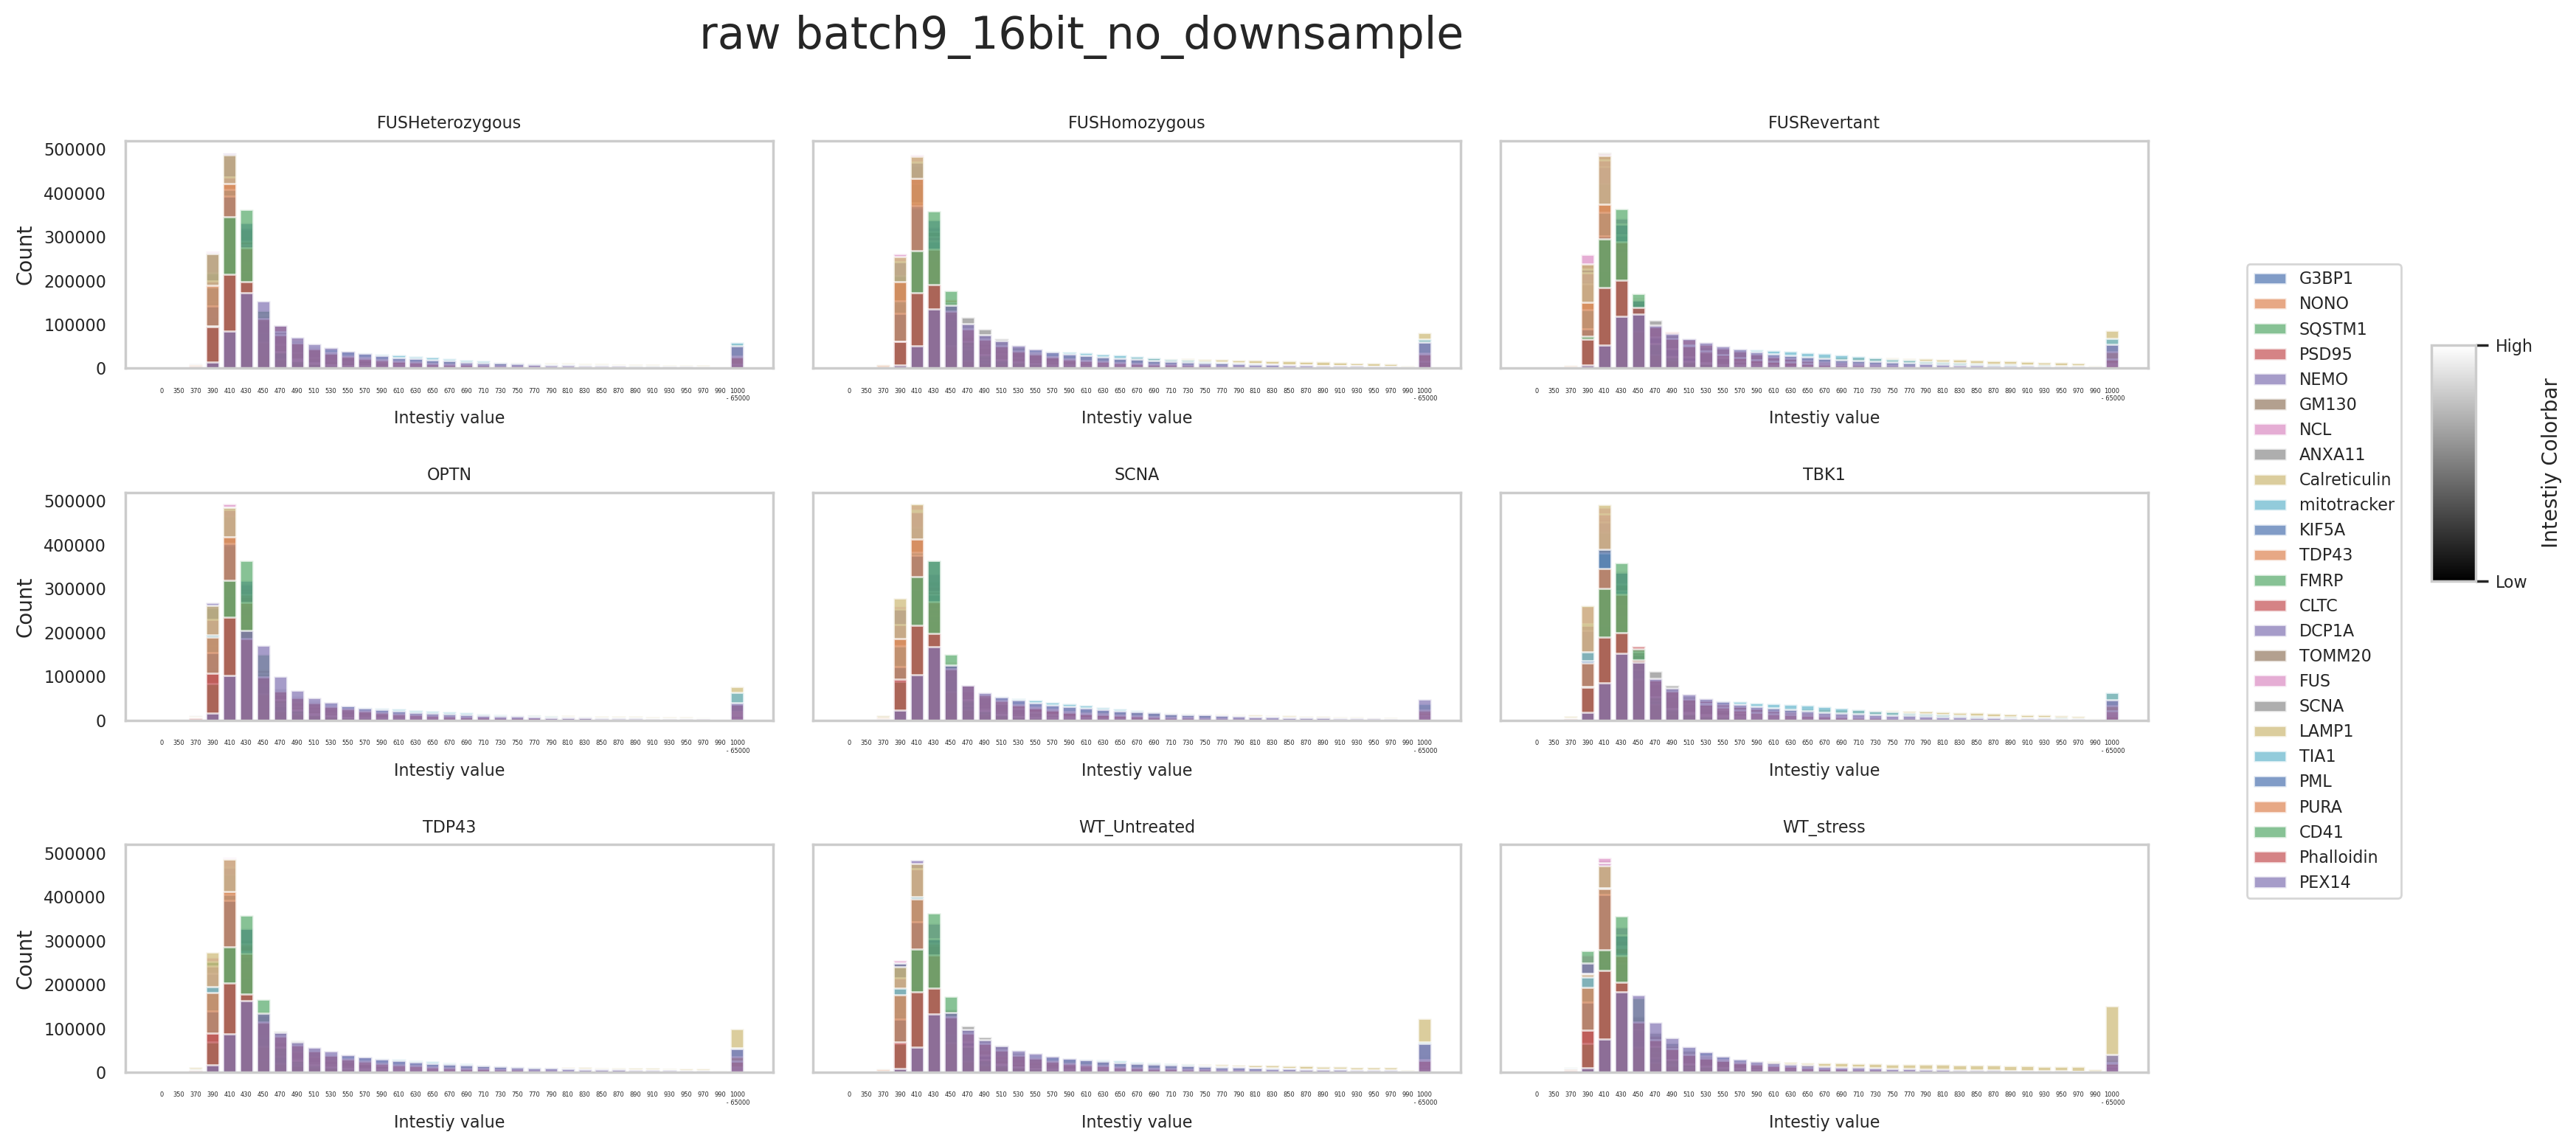

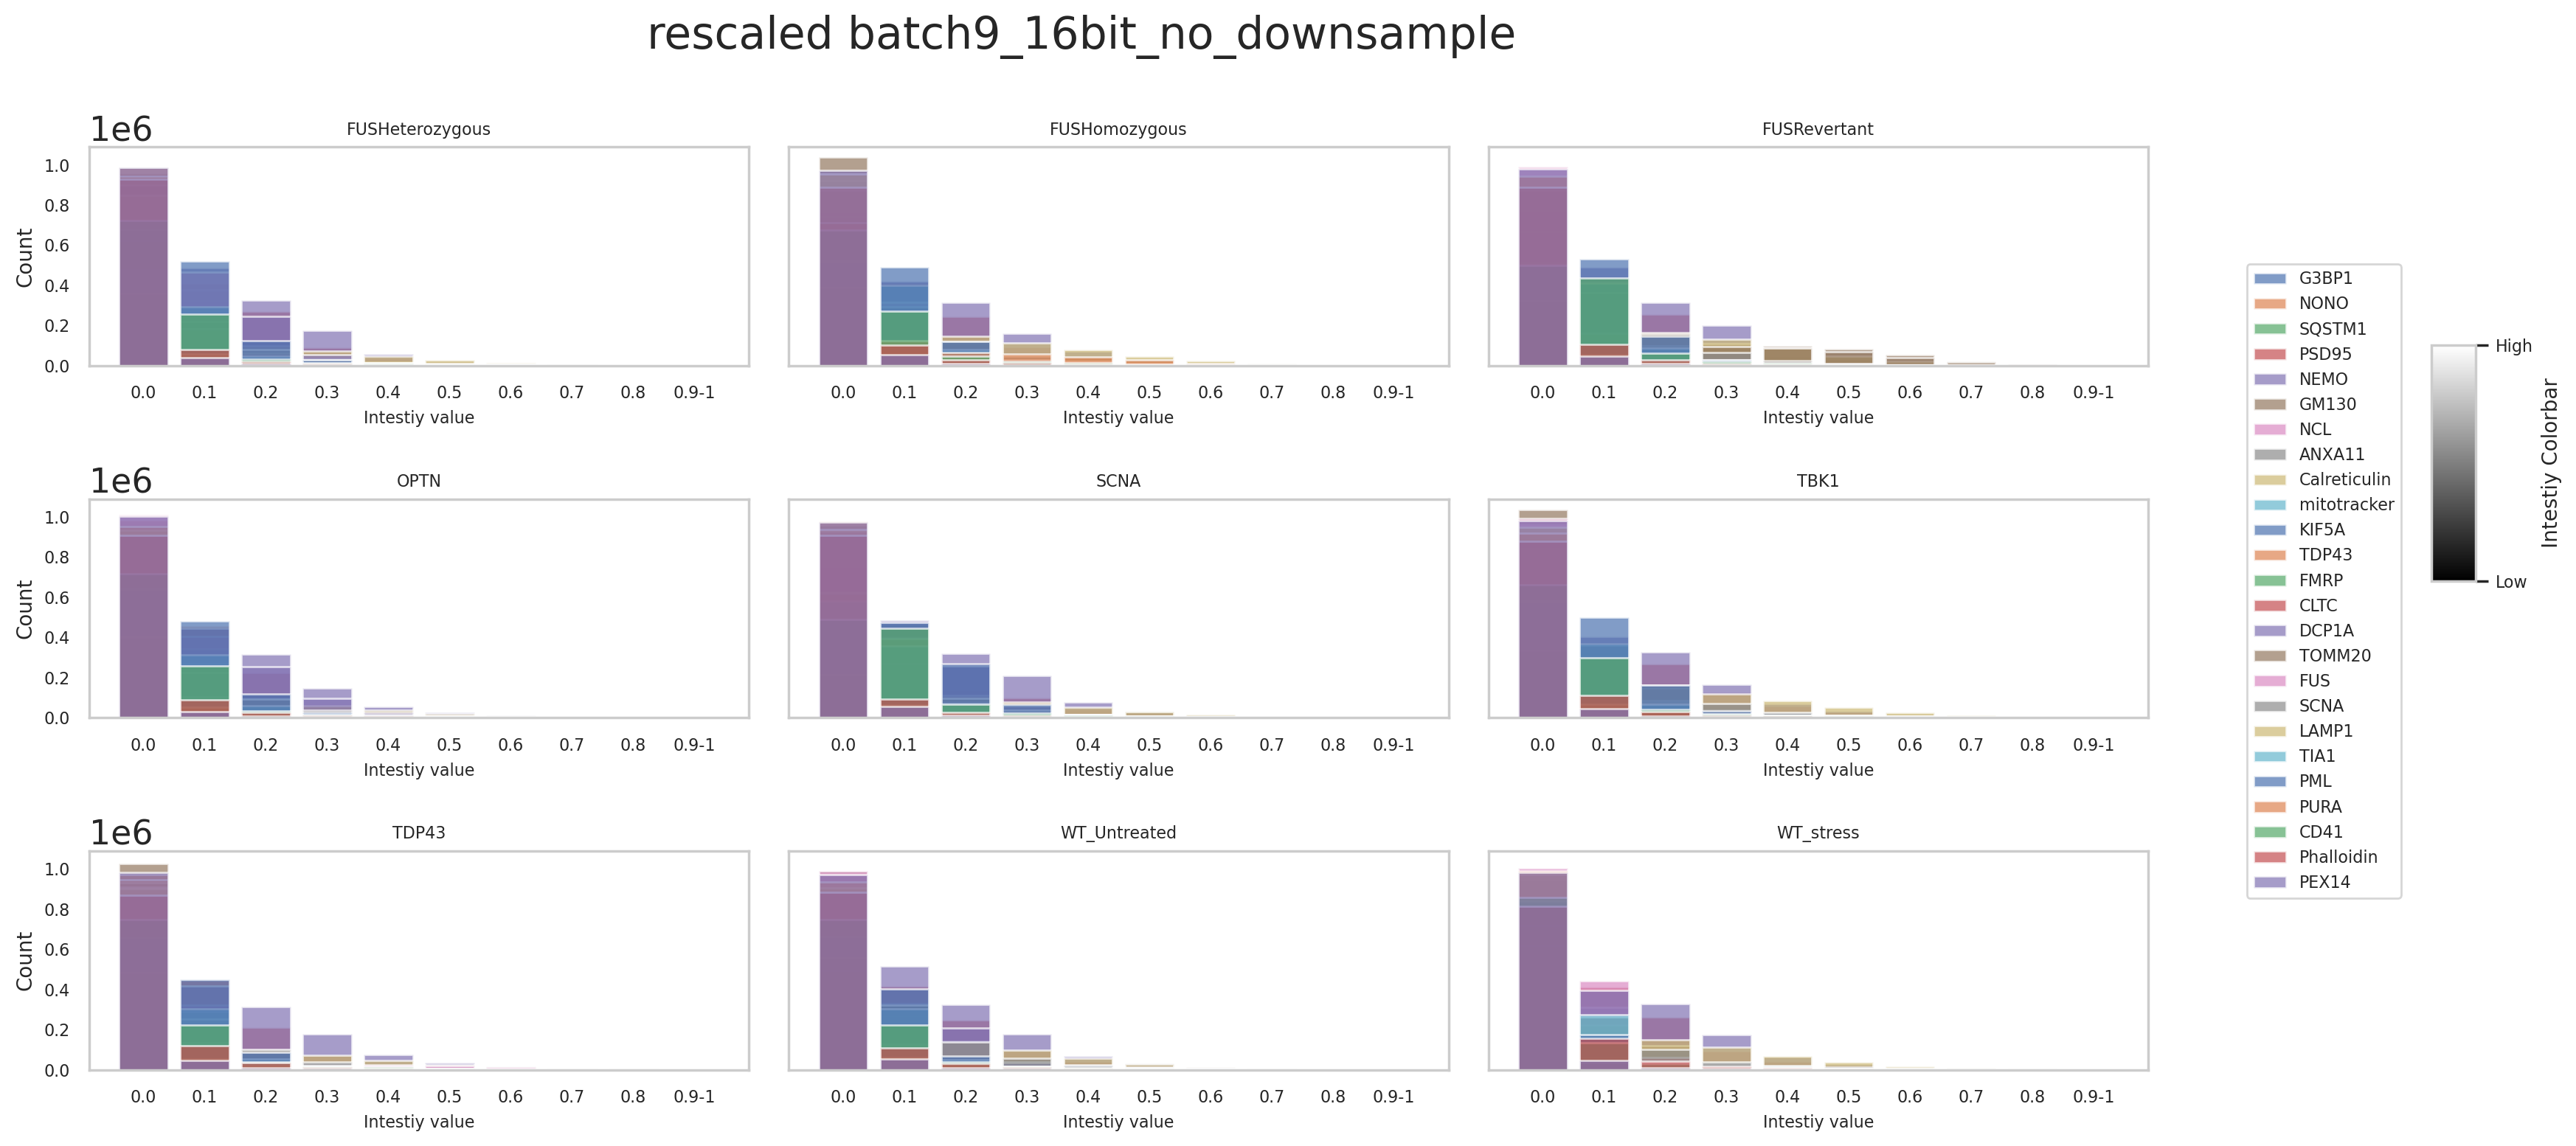

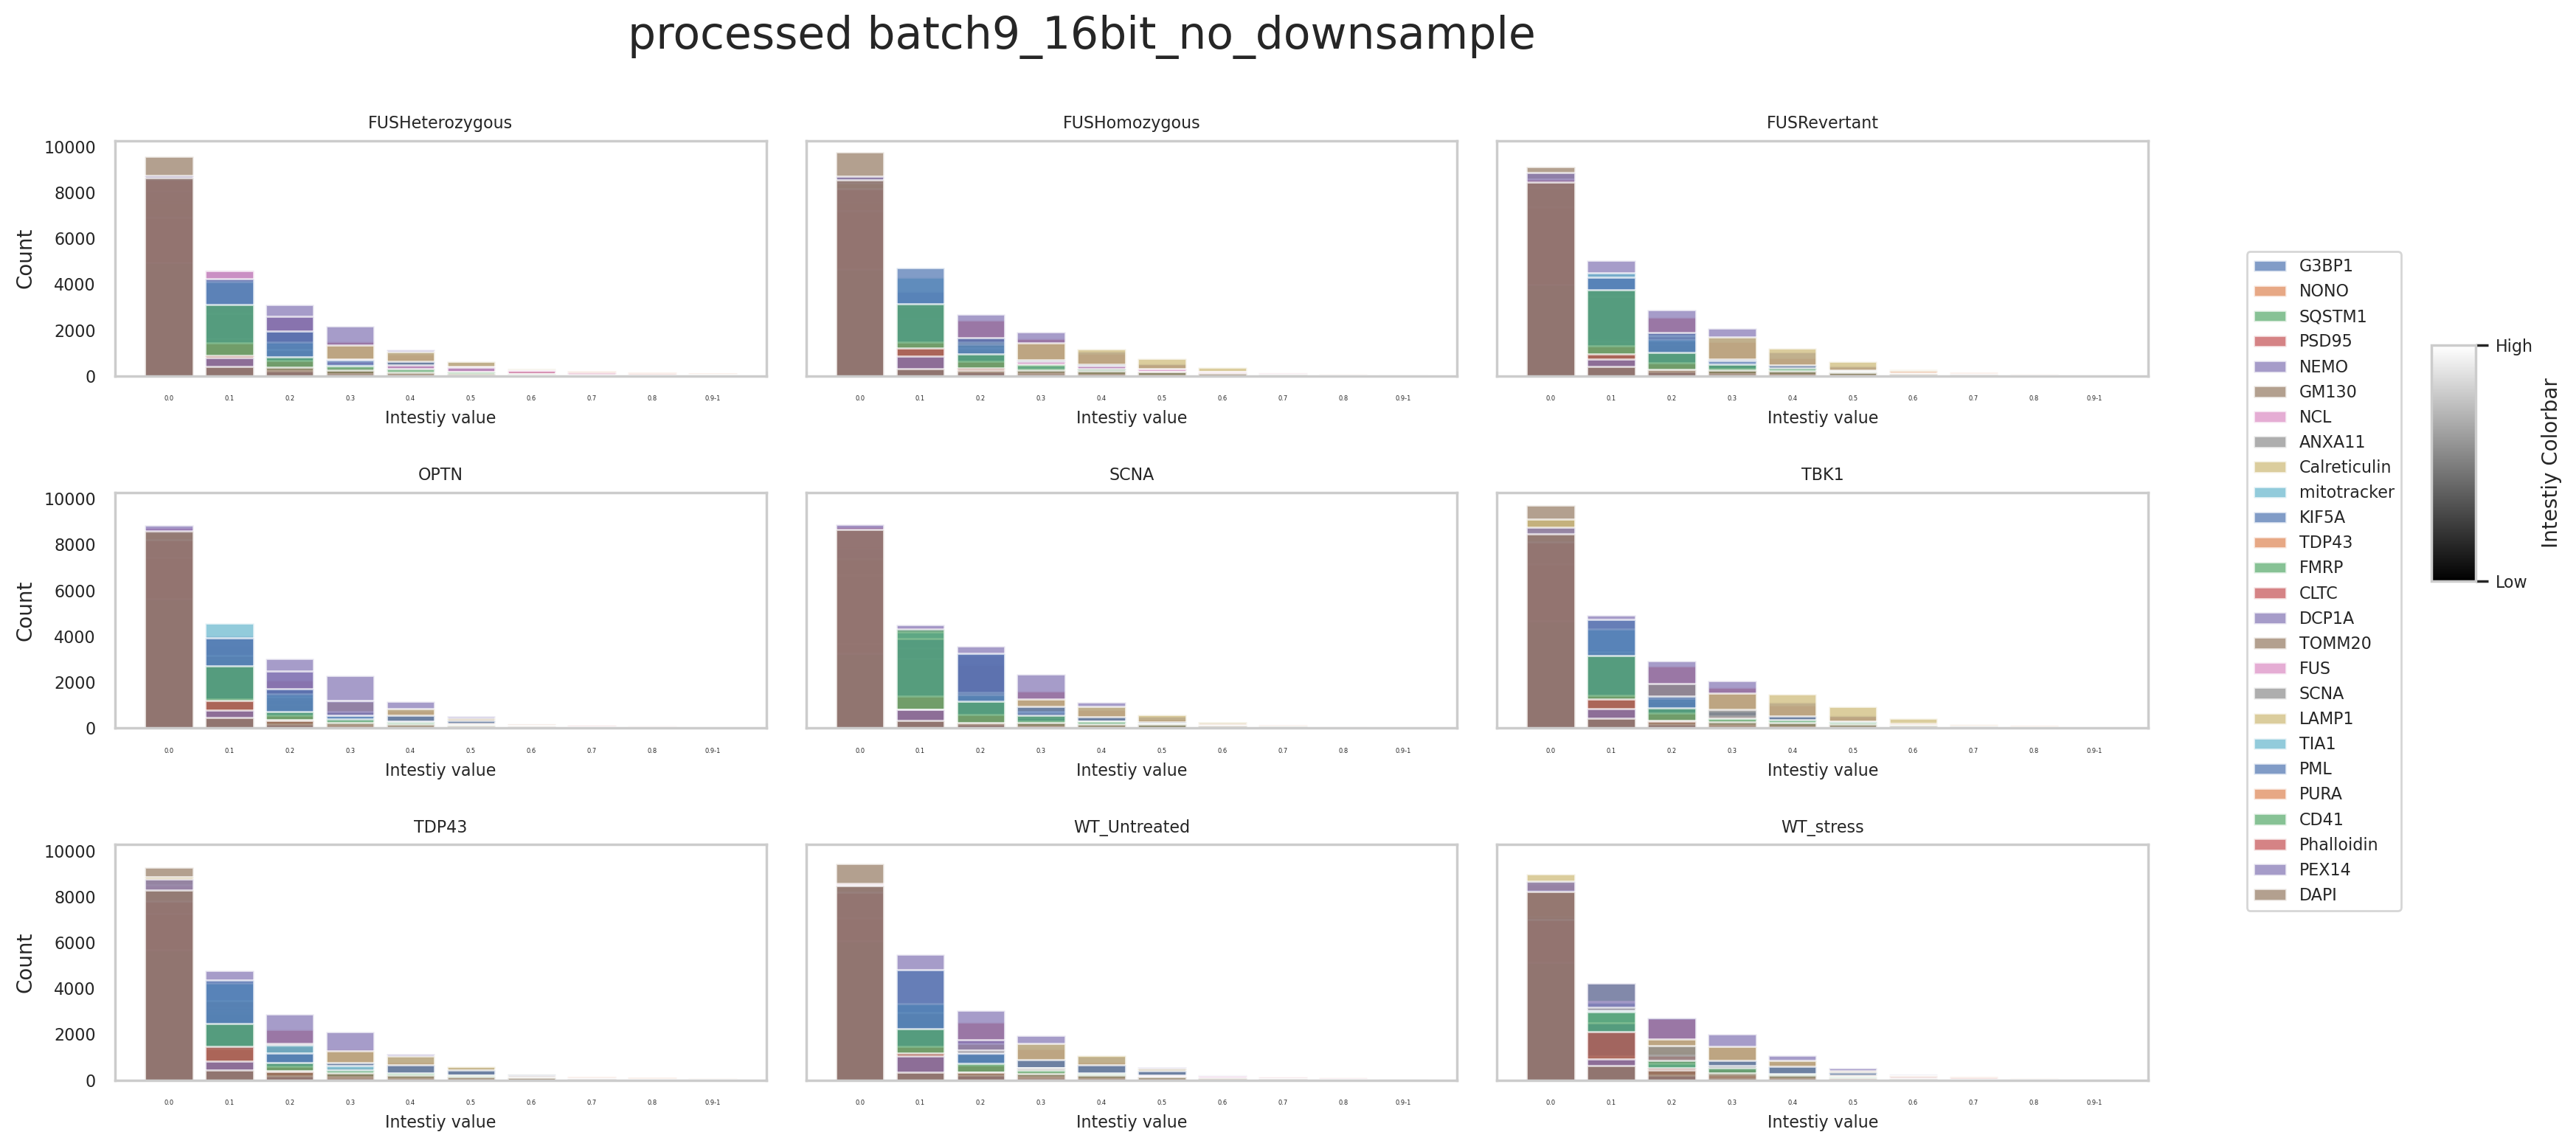

In [142]:
for batch in batches:
    print(batch)
    if 'batch7' in batch:
        continue
    #batch_num = batch.replace('batch',"")
    run_calc_hist_new(batch,cell_lines_for_disp, markers, 
                           hist_sample=10,sample_size_per_markers=200)
    print("="*30)

In [28]:
# save notebook as HTML ( the HTML will be saved in the same folder the original script is)
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
os.system('jupyter nbconvert --to html src/preprocessing/notebooks/cell_count_stats_analysis_no_downsample.ipynb')

<IPython.core.display.Javascript object>

[NbConvertApp] Converting notebook src/preprocessing/notebooks/cell_count_stats_analysis_no_downsample.ipynb to html
[NbConvertApp] Writing 1709751 bytes to src/preprocessing/notebooks/cell_count_stats_analysis_no_downsample.html


0